# Kaggle Competition: NFL Big Data Bowl

# NFL EDA on train dataset

This is my first EDA notebook here at Kaggle and aims to explore training dataset features and some relationships

I plotted some graphs for viewing

I hope you enjoy and vote :)

In [1]:
# Loading packages
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistic lib packages
from scipy import stats
from scipy.stats import skew, norm


# Utils packages
import pandasql as ps
import re 
import math, string, os
import datetime
from IPython.display import Image

# Options
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000
pd.set_option('display.max_columns', None)
import gc
gc.enable()

In [2]:
# Loading train data
train = pd.read_csv('../data/train.csv')
print ("Data is loaded !!")

Data is loaded !!


# Image about NFL

In [3]:
Image(url = 'https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F3258%2F820e86013d48faacf33b7a32a15e814c%2FIncreasing%20Dir%20and%20O.png?generation=1572285857588233&alt=media')

# 1. GENERAL ANALYSIS

In [4]:
# Viewing first dataset rows
train.head()

GameId          PlayId  Team      X      Y     S     A   Dis  \
0  2017090700  20170907000118  away  73.91  34.84  1.69  1.13  0.40   
1  2017090700  20170907000118  away  74.67  32.64  0.42  1.35  0.01   
2  2017090700  20170907000118  away  74.00  33.20  1.22  0.59  0.31   
3  2017090700  20170907000118  away  71.46  27.70  0.42  0.54  0.02   
4  2017090700  20170907000118  away  69.32  35.42  1.82  2.43  0.16   

   Orientation     Dir    NflId      DisplayName  JerseyNumber  Season  \
0        81.99  177.18   496723       Eric Berry            29    2017   
1        27.61  198.70  2495116     Allen Bailey            97    2017   
2         3.01  202.73  2495493   Justin Houston            50    2017   
3       359.77  105.64  2506353  Derrick Johnson            56    2017   
4        12.63  164.31  2530794       Ron Parker            38    2017   

   YardLine  Quarter GameClock PossessionTeam  Down  Distance FieldPosition  \
0        35        1  14:14:00             NE     3         2            NE   
1        35        1  14:14:00             NE     3         2            NE   
2        35        1  14:14:00             NE     3         2            NE   
3        35        1  14:14:00             NE     3         2            NE   
4        35        1  14:14:00             NE     3         2            NE   

   HomeScoreBeforePlay  VisitorScoreBeforePlay  NflIdRusher OffenseFormation  \
0                    0                       0      2543773          SHOTGUN   
1                    0                       0      2543773          SHOTGUN   
2                    0                       0      2543773          SHOTGUN   
3                    0                       0      2543773          SHOTGUN   
4                    0                       0      2543773          SHOTGUN   

   OffensePersonnel  DefendersInTheBox  DefensePersonnel PlayDirection  \
0  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
1  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
2  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
3  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
4  1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   

                TimeHandoff                  TimeSnap  Yards PlayerHeight  \
0  2017-09-08T00:44:06.000Z  2017-09-08T00:44:05.000Z      8          6-0   
1  2017-09-08T00:44:06.000Z  2017-09-08T00:44:05.000Z      8          6-3   
2  2017-09-08T00:44:06.000Z  2017-09-08T00:44:05.000Z      8          6-3   
3  2017-09-08T00:44:06.000Z  2017-09-08T00:44:05.000Z      8          6-3   
4  2017-09-08T00:44:06.000Z  2017-09-08T00:44:05.000Z      8          6-0   

   PlayerWeight PlayerBirthDate PlayerCollegeName Position HomeTeamAbbr  \
0           212      12/29/1988         Tennessee       SS           NE   
1           288      03/25/1989             Miami       DE           NE   
2           270      01/21/1989           Georgia       DE           NE   
3           245      11/22/1982             Texas      ILB           NE   
4           206      08/17/1987          Newberry       FS           NE   

  VisitorTeamAbbr  Week           Stadium        Location StadiumType  \
0              KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
1              KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
2              KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
3              KC     1  Gillette Stadium  Foxborough, MA     Outdoor   
4              KC     1  Gillette Stadium  Foxborough, MA     Outdoor   

         Turf     GameWeather  Temperature  Humidity WindSpeed WindDirection  
0  Field Turf  Clear and warm         63.0      77.0         8            SW  
1  Field Turf  Clear and warm         63.0      77.0         8            SW  
2  Field Turf  Clear and warm         63.0      77.0         8            SW  
3  Field Turf  Clear and warm         63.0      77.0         8   

In [5]:
# Viewing feature types
train.dtypes

GameId                      int64
PlayId                      int64
Team                       object
X                         float64
Y                         float64
S                         float64
A                         float64
Dis                       float64
Orientation               float64
Dir                       float64
NflId                       int64
DisplayName                object
JerseyNumber                int64
Season                      int64
YardLine                    int64
Quarter                     int64
GameClock                  object
PossessionTeam             object
Down                        int64
Distance                    int64
FieldPosition              object
HomeScoreBeforePlay         int64
VisitorScoreBeforePlay      int64
NflIdRusher                 int64
OffenseFormation           object
OffensePersonnel           object
DefendersInTheBox         float64
DefensePersonnel           object
PlayDirection              object
TimeHandoff   

In [6]:
# Viewing statistical data of numerical variables
train.describe().T

count          mean           std           min  \
GameId                  509762.0  2.017594e+09  4.997098e+05  2.017091e+09   
PlayId                  509762.0  2.017594e+13  4.997098e+09  2.017091e+13   
X                       509762.0  6.004030e+01  2.543526e+01  6.600000e-01   
Y                       509762.0  2.678354e+01  7.238206e+00  1.850000e+00   
S                       509762.0  2.591912e+00  1.383601e+00  0.000000e+00   
A                       509762.0  1.683176e+00  9.764122e-01  0.000000e+00   
Dis                     509762.0  2.794058e-01  1.454822e-01  0.000000e+00   
Orientation             509744.0  1.802478e+02  1.042983e+02  0.000000e+00   
Dir                     509748.0  1.799339e+02  1.063195e+02  0.000000e+00   
NflId                   509762.0  2.344703e+06  6.418871e+05  2.220000e+02   
JerseyNumber            509762.0  5.418798e+01  2.837936e+01  1.000000e+00   
Season                  509762.0  2.017486e+03  4.998162e-01  2.017000e+03   
YardLine                509762.0  2.836874e+01  1.301092e+01  1.000000e+00   
Quarter                 509762.0  2.504639e+00  1.144105e+00  1.000000e+00   
Down                    509762.0  1.520651e+00  6.749873e-01  1.000000e+00   
Distance                509762.0  8.329248e+00  3.795208e+00  1.000000e+00   
HomeScoreBeforePlay     509762.0  1.114807e+01  1.027710e+01  0.000000e+00   
VisitorScoreBeforePlay  509762.0  9.501057e+00  9.366413e+00  0.000000e+00   
NflIdRusher             509762.0  2.419204e+06  5.357783e+05  2.340000e+02   
DefendersInTheBox       509696.0  6.943025e+00  9.911303e-01  1.000000e+00   
Yards                   509762.0  4.212334e+00  6.436167e+00 -1.400000e+01   
PlayerWeight            509762.0  2.535544e+02  4.836739e+01  1.530000e+02   
Week                    509762.0  9.096370e+00  5.000984e+00  1.000000e+00   
Temperature             461230.0  6.043644e+01  1.757029e+01  9.000000e+00   
Humidity                503602.0  5.564606e+01  2.543098e+01  0.000000e+00   

                                 25%           50%           75%           max  
GameId                  2.017111e+09  2.017123e+09  2.018110e+09  2.018123e+09  
PlayId                  2.017111e+13  2.017123e+13  2.018110e+13  2.018123e+13  
X                       3.909000e+01  6.029000e+01  8.097000e+01  1.168400e+02  
Y                       2.273000e+01  2.679000e+01  3.086000e+01  5.645000e+01  
S                       1.500000e+00  2.470000e+00  3.560000e+00  9.410000e+00  
A                       9.400000e-01  1.540000e+00  2.290000e+00  1.471000e+01  
Dis                     1.700000e-01  2.700000e-01  3.900000e-01  1.390000e+00  
Orientation             9.063000e+01  1.797000e+02  2.704000e+02  3.600000e+02  
Dir                     8.983000e+01  1.800900e+02  2.701900e+02  3.600000e+02  
NflId                   2.532865e+06  2.543765e+06  2.555343e+06  2.561671e+06  
JerseyNumber            2.600000e+01  5.600000e+01  7.800000e+01  9.900000e+01  
Season                  2.017000e+03  2.017000e+03  2.018000e+03  2.018000e+03  
YardLine                2.000000e+01  2.900000e+01  3.900000e+01  5.000000e+01  
Quarter                 1.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
Down                    1.000000e+00  1.000000e+00  2.000000e+00  4.000000e+00  
Distance                6.000000e+00  1.000000e+01  1.000000e+01  4.000000e+01  
HomeScoreBeforePlay     3.000000e+00  9.000000e+00  1.700000e+01  5.700000e+01  
VisitorScoreBeforePlay  0.000000e+00  7.000000e+00  1.400000e+01  5.100000e+01  
NflIdRusher             2.540011e+06  2.552582e+06  2.557976e+06  2.561468e+06  
DefendersInTheBox       6.000000e+00  7.000000e+00  8.000000e+00  1.100000e+01  
Yards                   1.000000e+00  3.000000e+00  6.000000e+00  9.900000e+01  
PlayerWeight            2.100000e+02  2.450000e+02  3.050000e+02  3.800000e+02  
Week                    5.000000e+00  9.000000e+00  1.400000e+01  1.700000e+01  
Temperature             4.800000e+01  6.200000e+01  7.

### 1. General observations
- 1. The dataset contain observations that repeat over 22 rows group by GameId and PlayId.
- 2. There are many categorical features in the dataset.
- 3. There are 509.762 rows in total
- 4. Yards is the variable to be predicted.

# 2. DATA MISSING

In [7]:
# Function to create missing feature dataset
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

In [8]:
# Checking columns with missing data
missing = percent_missing(train)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:50]

Percent of missing data


[('WindDirection', 15.74),
 ('WindSpeed', 13.23),
 ('Temperature', 9.52),
 ('GameWeather', 8.56),
 ('StadiumType', 6.46),
 ('FieldPosition', 1.26),
 ('Humidity', 1.21),
 ('OffenseFormation', 0.02),
 ('DefendersInTheBox', 0.01),
 ('GameId', 0.0),
 ('PlayId', 0.0),
 ('Team', 0.0),
 ('X', 0.0),
 ('Y', 0.0),
 ('S', 0.0),
 ('A', 0.0),
 ('Dis', 0.0),
 ('Orientation', 0.0),
 ('Dir', 0.0),
 ('NflId', 0.0),
 ('DisplayName', 0.0),
 ('JerseyNumber', 0.0),
 ('Season', 0.0),
 ('YardLine', 0.0),
 ('Quarter', 0.0),
 ('GameClock', 0.0),
 ('PossessionTeam', 0.0),
 ('Down', 0.0),
 ('Distance', 0.0),
 ('HomeScoreBeforePlay', 0.0),
 ('VisitorScoreBeforePlay', 0.0),
 ('NflIdRusher', 0.0),
 ('OffensePersonnel', 0.0),
 ('DefensePersonnel', 0.0),
 ('PlayDirection', 0.0),
 ('TimeHandoff', 0.0),
 ('TimeSnap', 0.0),
 ('Yards', 0.0),
 ('PlayerHeight', 0.0),
 ('PlayerWeight', 0.0),
 ('PlayerBirthDate', 0.0),
 ('PlayerCollegeName', 0.0),
 ('Position', 0.0),
 ('HomeTeamAbbr', 0.0),
 ('VisitorTeamAbbr', 0.0),
 ('Week

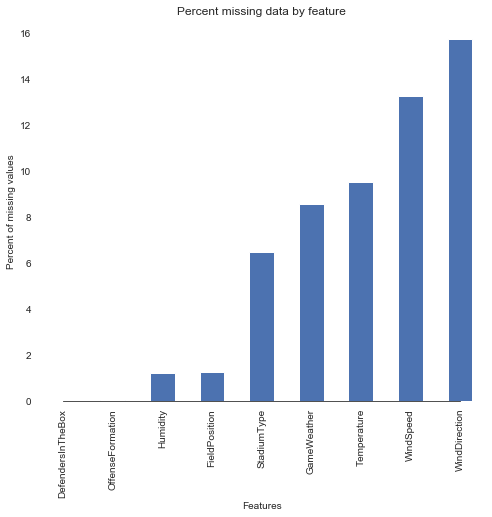

In [9]:
# Plot setup
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
sns.set_color_codes(palette='deep')

# Identifying missing values
missing = round(train.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")

# Visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

### 2. General observations
- 1. The dataset contains nine features with missing data.
- 2. The largest amount of missing data is in the features: WindDirection, WindSpeed
- 3. For numerical features, let's fill with the mean value
- 4. For categorical features, let's fix with 'unknown' values

# 3. CLEANING AND CONVERSION FUNCTIONS

In [10]:
# Function to handle missing data of each feature
def fill_na(data):
    data['WindDirection'].fillna('unknown',inplace=True)
    data['OffenseFormation'].fillna('unknown',inplace=True)
    data['StadiumType'].fillna('unknown',inplace=True)
    data['GameWeather'].fillna('unknown',inplace=True)
    data['FieldPosition'].fillna('NA',inplace=True)
    data['Temperature'].fillna(data['Temperature'].mean(), inplace=True)
    data['Humidity'].fillna(data['Humidity'].mean(), inplace=True)
    data['DefendersInTheBox'].fillna(math.ceil(data['DefendersInTheBox'].mean()),inplace=True)
    
# Function to group descriptions of stadium types
def agrupar_tipo_estadio(StadiumType):
    outdoor       = ['Outdoor', 'Outdoors', 'Cloudy', 'Heinz Field', 'Outdor', 'Ourdoor', 'Outside', 'Outddors', 'Outdoor Retr Roof-Open', 'Oudoor', 'Bowl']
    indoor_closed = ['Indoors', 'Indoor', 'Indoor, Roof Closed', 'Indoor, Roof Closed', 'Retractable Roof', 'Retr. Roof-Closed', 'Retr. Roof - Closed', 'Retr. Roof Closed']
    indoor_open   = ['Indoor, Open Roof', 'Open', 'Retr. Roof-Open', 'Retr. Roof - Open']
    dome_closed   = ['Dome', 'Domed, closed', 'Closed Dome', 'Domed', 'Dome, closed']
    dome_open     = ['Domed, Open', 'Domed, open']
    
    if StadiumType in outdoor:
        return 'outdoor'
    elif StadiumType in indoor_closed:
        return 'indoor_closed'
    elif StadiumType in indoor_open:
        return 'indoor_open'
    elif StadiumType in dome_closed:
        return 'dome_closed'
    elif StadiumType in dome_open:
        return 'dome_open'
    else:
        return 'unknown'
    
# Function to group stadium descriptions
def agrupar_estadio(Stadium):
    if Stadium == 'Broncos Stadium at Mile High':
        return 'Broncos Stadium At Mile High'
    elif Stadium in ('CenturyField', 'CenturyLink'):
        return 'CenturyLink Field'
    elif Stadium == 'EverBank Field':
        return 'Everbank Field'
    elif Stadium in ('FirstEnergy', 'FirstEnergy Stadium', 'FirstEnergyStadium'):
        return 'First Energy Stadium'
    elif Stadium == 'Lambeau field':
        return 'Lambeau Field'
    elif Stadium == 'Los Angeles Memorial Coliesum':
        return 'Los Angeles Memorial Coliseum'
    elif Stadium in ('M & T Bank Stadium', 'M&T Stadium'):
        return 'M&T Bank Stadium'
    elif Stadium in ('Mercedes-Benz Dome', 'Mercedes-Benz Superdome'):
        return 'Mercedes-Benz SuperDome'
    elif Stadium in ('MetLife Stadium', 'Metlife Stadium', 'MetLife'):
        return 'MetLife Stadium' 
    elif Stadium == 'NRG':
        return 'NRG Stadium' 
    elif Stadium == 'Oakland-Alameda County Coliseum':
        return 'Oakland Alameda-County Coliseum' 
    elif Stadium == 'Paul Brown Stdium':
        return 'Paul Brown Stadium' 
    elif Stadium == 'Twickenham':
        return 'Twickenham Stadium' 
    else:
        return Stadium
    
# Function to group stadium and game location
def agrupar_local(Location):
    if Location == "Arlington, Texas":
        return "Arlington, TX"
    elif Location in ("Baltimore, Maryland","Baltimore, Md."):
        return "Baltimore, MD"
    elif Location == "Charlotte, North Carolina":
        return "Charlotte, NC"
    elif Location == "Chicago. IL":
        return "Chicago, IL"
    elif Location == "Cincinnati, Ohio":
        return "Cincinnati, OH"
    elif Location in ("Cleveland","Cleveland Ohio","Cleveland, Ohio","Cleveland,Ohio"):
        return "Cleveland, OH"
    elif Location == "Detroit":
        return "Detroit, MI"
    elif Location == "E. Rutherford, NJ" or Location == "East Rutherford, N.J.":
        return "East Rutherford, NJ"
    elif Location == "Foxborough, Ma":
        return "Foxborough, MA"
    elif Location == "Houston, Texas":
        return "Houston, TX"
    elif Location in ("Jacksonville Florida","Jacksonville, Fl","Jacksonville, Florida"):
        return "Jacksonville, FL"
    elif Location == "London":
        return "London, England"
    elif Location == "Los Angeles, Calif.":
        return "Los Angeles, CA"
    elif Location == "Miami Gardens, Fla.":
        return "Miami Gardens, FLA"
    elif Location in ("New Orleans","New Orleans, La."):
        return "New Orleans, LA"
    elif Location == "Orchard Park NY":
        return "Orchard Park, NY"
    elif Location == "Philadelphia, Pa.":
        return "Philadelphia, PA"
    elif Location == "Pittsburgh":
        return "Pittsburgh, PA"
    elif Location == "Seattle":
        return "Seattle, WA"
    else:
        return Location
    
# Function to group the stadium turf
def agrupar_gramado(Turf):
    if Turf == 'Artifical':
        return 'Artificial'
    
    elif Turf in ('FieldTurf', 'Field turf'):
        return 'Field Turf'

    elif Turf in ('FieldTurf360', 'FieldTurf 360'):
        return 'Field Turf 360'

    elif Turf in ('Natural', 'Natural grass', 'Naturall Grass', 'grass', 'natural grass', 'SISGrass', 'Natural Grass'):
        return "Grass"

    elif Turf == "UBU Sports Speed S5-M":
        return "UBU Speed Series-S5-M"

    else:
        return Turf

# Function to group wind direction
def agrupa_wind_direction(WindDirection):
    wd = str(WindDirection).upper()
    
    if wd == 'N' or 'FROM N' in wd:
        return 'north'
    if wd == 'S' or 'FROM S' in wd:
        return 'south'
    if wd == 'W' or 'FROM W' in wd:
        return 'west'
    if wd == 'E' or 'FROM E' in wd:
        return 'east'
    
    if 'FROM SW' in wd or 'FROM SSW' in wd or 'FROM WSW' in wd:
        return 'south west'
    if 'FROM SE' in wd or 'FROM SSE' in wd or 'FROM ESE' in wd:
        return 'south east'
    if 'FROM NW' in wd or 'FROM NNW' in wd or 'FROM WNW' in wd:
        return 'north west'
    if 'FROM NE' in wd or 'FROM NNE' in wd or 'FROM ENE' in wd:
        return 'north east'
    
    if 'NW' in wd or 'NORTHWEST' in wd:
        return 'north west'
    if 'NE' in wd or 'NORTH EAST' in wd:
        return 'north east'
    if 'SW' in wd or 'SOUTHWEST' in wd:
        return 'south west'
    if 'SE' in wd or 'SOUTHEAST' in wd:
        return 'south east'

    return 'unknown'

# Function to group climate descriptions
def agrupar_clima(GameWeather):
    chuva   = ['Rainy', 'Rain Chance 40%', 'Showers',
               'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.',
               'Scattered Showers', 'Cloudy, Rain', 'Rain shower', 'Light Rain', 'Rain']
    nublado = ['Cloudy, light snow accumulating 1-3"', 'Party Cloudy', 'Cloudy, chance of rain',
               'Coudy', 'Cloudy, 50% change of rain', 'Rain likely, temps in low 40s.',
               'Cloudy and cold', 'Cloudy, fog started developing in 2nd quarter',
               'Partly Clouidy', '30% Chance of Rain', 'Mostly Coudy', 'Cloudy and Cool',
               'cloudy', 'Partly cloudy', 'Overcast', 'Hazy', 'Mostly cloudy', 'Mostly Cloudy',
               'Partly Cloudy', 'Cloudy']
    limpo   = ['Partly clear', 'Sunny and clear', 'Sun & clouds', 'Clear and Sunny',
               'Sunny and cold', 'Sunny Skies', 'Clear and Cool', 'Clear and sunny',
               'Sunny, highs to upper 80s', 'Mostly Sunny Skies', 'Cold',
               'Clear and warm', 'Sunny and warm', 'Clear and cold', 'Mostly sunny',
               'T: 51; H: 55; W: NW 10 mph', 'Clear Skies', 'Clear skies', 'Partly sunny',
               'Fair', 'Partly Sunny', 'Mostly Sunny', 'Clear', 'Sunny']
    neve    = ['Heavy lake effect snow', 'Snow']
    none    = ['N/A Indoor', 'Indoors', 'Indoor', 'N/A (Indoors)', 'Controlled Climate']

    if GameWeather in chuva:
        return 'chuva'
    elif GameWeather in nublado:
        return 'nublado'
    elif GameWeather in limpo:
        return 'limpo'
    elif GameWeather in neve:
        return 'neve'
    elif GameWeather in none:
        return 'none'
    else:
        return 'none'
    
# Function to convert wind speed
def convert_wind_speed(WindSpeed):
    ws = str(WindSpeed)
    if ws.isdigit():
        return int(ws)
    if '-' in ws:
        return int(ws.split('-')[0])
    if ws.split(' ')[0].isdigit():
        return int(ws.split(' ')[0])
    if 'mph' in ws.lower():
        return int(ws.lower().split('mph')[0])
    else:
        return 0
    
# Function to convert height from feet-inches to centimeters
def convert_to_cm(ft_in):
    h_ft   = int(ft_in.split('-')[0])
    h_inch = int(ft_in.split('-')[1])
    h_inch += h_ft * 12
    h_cm = round(h_inch * 2.54, 1)   
    return h_cm

# Function to convert weight in lbs to kg
def convert_to_kg(lbs):
    kg = lbs * 0.45359237
    return kg

# Function to convert temperature Fahrenheit to Celsius
def convert_to_celsius(fah):
    celsius = (fah - 32) * 5.0/9.0
    return celsius

# Function to convert date features and extract day, month, year, hour, minute, second
def convert_data(data):
    data['PlayerBirthDate'] = data['PlayerBirthDate'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y"))
    data['PlayerBirthDate_day'] = data['PlayerBirthDate'].dt.day.astype(int)
    data['PlayerBirthDate_month'] = data['PlayerBirthDate'].dt.month.astype(int)
    data['PlayerBirthDate_year'] = data['PlayerBirthDate'].dt.year.astype(int)

    data['TimeSnap'] = data['TimeSnap'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ"))
    data['TimeSnap_min'] = data['TimeSnap'].dt.minute.astype(int)
    data['TimeSnap_seg'] = data['TimeSnap'].dt.second.astype(int)
    
    data['TimeHandoff'] = data['TimeHandoff'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ"))
    data['TimeHandoff_min'] = data['TimeHandoff'].dt.minute.astype(int)
    data['TimeHandoff_seg'] = data['TimeHandoff'].dt.second.astype(int)
    
    
# Function to convert a time string in seconds
def str_to_seconds(time):
    time = time.split(':')
    sec = int(time[0])*60 + int(time[1]) + int(time[2])/60
    return sec
    
# Function to create a distribution plot for each feature
def plot_distribution(dataset, cols=5, width=20, height=25, hspace=0.4, wspace=0.5):
    """
    Plot distributions for each column in a dataset.
    Seaborn countplots are used for categorical data and distplots for numerical data

    args:
    ----
    dataset {dataframe} - the data that will be plotted
    cols {int} - how many distributions to plot for each row
    width {int} - how wide each plot should be
    height {int} - how tall each plot should be
    hspace {float} - horizontal space between plots
    wspace {float} - vertical space between plots 
    """
    # plot styling
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    # calculate rows needed
    rows = math.ceil(float(dataset.shape[1]) / cols)
    # create a countplot for top 20 categorical values
    # and a distplot for all numerical values
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            # grab the top 10 for each countplot
            g = sns.countplot(y=column, 
                              data=dataset,
                              order=dataset[column].value_counts().index[:10])
            # make labels only 20 characters long and rotate x labels for nicer displays
            substrings = [s.get_text()[:20] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)

# 4. RESOLVING MISSING VALUES AND CLEANING

In [11]:
# Fix missing values
fill_na(train)

# Convert date features
convert_data(train)

# Convert player height to cm
train['PlayerHeight'] = train['PlayerHeight'].apply(convert_to_cm)

# Convert player height to cm
train['PlayerWeight'] = train['PlayerWeight'].apply(convert_to_kg)

# Convert temperature to Celsius
train['Temperature'] = train['Temperature'].apply(convert_to_celsius)

# Grouping the stadium types
train['StadiumType'] = train['StadiumType'].apply(agrupar_tipo_estadio)

# Grouping the stadium
train['Stadium'] = train['Stadium'].apply(agrupar_estadio)

# Grouping locations
train['Location'] = train['Location'].apply(agrupar_local)

# Grouping turf
train['Turf'] = train['Turf'].apply(agrupar_gramado)

# Grouping wind direction
train['WindDirection'] = train['WindDirection'].apply(agrupa_wind_direction)

# Converting wind speed to numeric
train['WindSpeed'] = train['WindSpeed'].apply(convert_wind_speed)

# grouping game weather
train['GameWeather'] = train['GameWeather'].apply(agrupar_clima)

# Convert game time to seconds
train['GameClock'] = train['GameClock'].apply(str_to_seconds)

# 5. ANALYZING CORRELATIONS

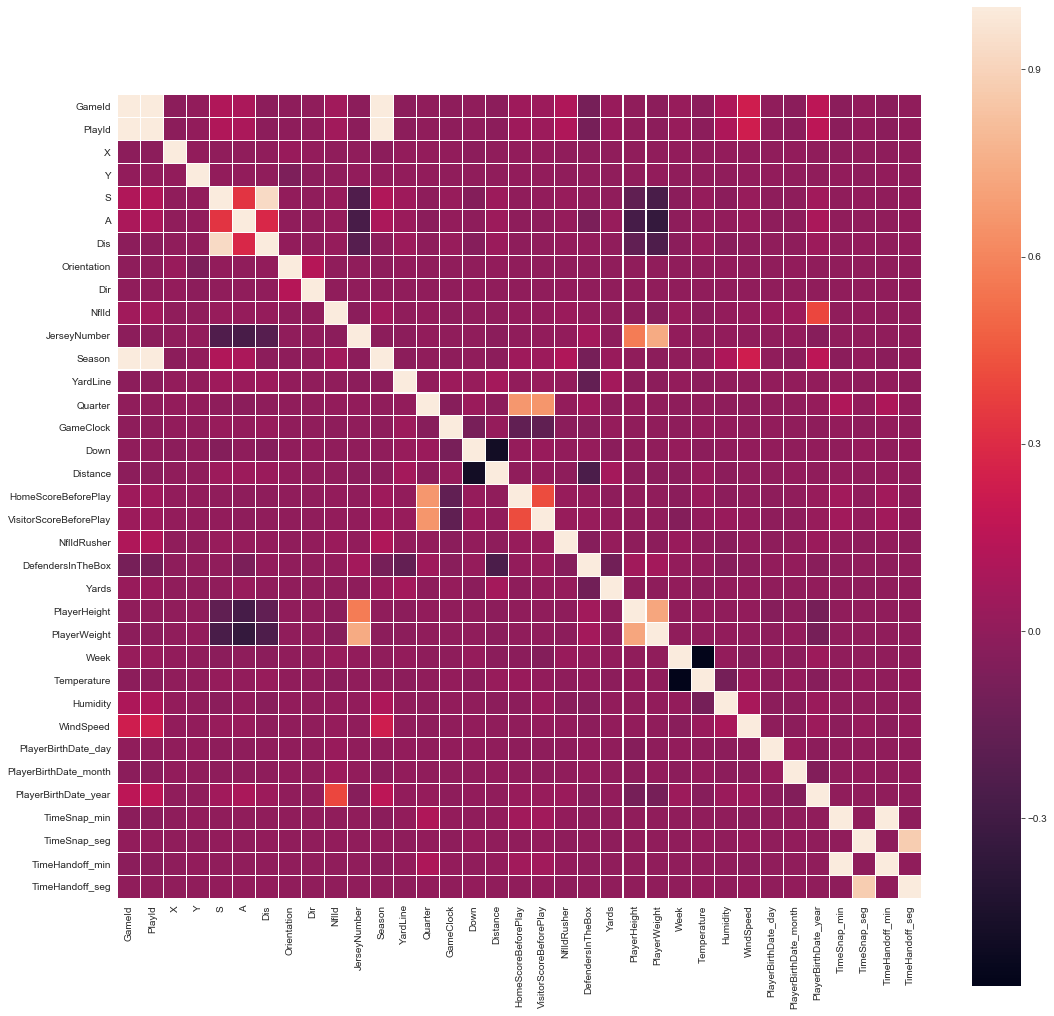

In [12]:
# Pearson Correlations
cor_mat = train.corr(method = 'pearson')

# Heatmap plot
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(cor_mat,linewidths=.1,fmt= '.3f',ax=ax,square=True,cbar=True,annot=False)

### 5. General observations
- 1. It's possible to observe strong positive correlation between Dis and S
- 2. Strong negative correlation can be observed between Distance and Down, Temperature and Week
- 3. Let's check all these correlations below

# 6. ANALYZING ALL DATASET FEATURES
- At this time the analyzes will be based on a new dataset.
- This dataset will be based on the PLAYID
- This analysis has been identified after checking the NflId and NflIdRusher features.
- These two features are linked, where it is possible to get the player participating in the play and get the amount of yards won or lost.

In [13]:
# Definition: A unique play identifier
# There are 22 records by PlayId
# So there are 11 home team players and 11 home team players
train['PlayId'].value_counts().head()

20181007011551    22
20181007090207    22
20171112053416    22
20170918003383    22
20181230140128    22
Name: PlayId, dtype: int64

In [14]:
# Linking NFLid and NFLidRusher
train_jog = train[train['NflId'] == train['NflIdRusher']]
print(train_jog.shape)

(23171, 56)


In [15]:
# When connecting NflId and NflIdRusher it's possible see that every play now has a unique record
train_jog['PlayId'].value_counts().head()

20171022003923    1
20181111042906    1
20181104042178    1
20181118100433    1
20170924073808    1
Name: PlayId, dtype: int64

In [16]:
# Example the sequence of moves of a game that counted yard change (+ or -)
# It is possible to identify that this sequence is increasing, and registered in PlayId
# Using the 2017 GameId filter
train_jog[train_jog['GameId'] == 2017090700].head(10)

GameId          PlayId  Team      X      Y     S     A   Dis  \
18   2017090700  20170907000118  home  78.75  30.53  3.63  3.35  0.38   
40   2017090700  20170907000139  home  71.07  27.16  3.06  2.41  0.34   
62   2017090700  20170907000189  home  48.66  19.11  5.77  2.42  0.60   
84   2017090700  20170907000345  home  15.53  25.36  4.45  3.20  0.46   
98   2017090700  20170907000395  away  29.99  27.12  3.90  2.53  0.44   
128  2017090700  20170907000473  home  42.88  22.73  3.32  2.76  0.44   
149  2017090700  20170907000516  home  35.28  24.98  4.80  2.02  0.54   
172  2017090700  20170907000653  home  22.74  25.43  3.65  1.18  0.51   
186  2017090700  20170907000680  away  14.57  22.25  4.77  3.10  0.51   
208  2017090700  20170907000801  away  53.64  27.84  3.64  2.63  0.38   

     Orientation     Dir    NflId     DisplayName  JerseyNumber  Season  \
18        161.98  245.74  2543773     James White            28    2017   
40        210.70  312.20  2543773     James White            28    2017   
62        140.82  221.96  2543773     James White            28    2017   
84        186.22  275.44  2539663  Mike Gillislee            35    2017   
98         34.27  157.92  2557917     Kareem Hunt            27    2017   
128       189.77  319.67  2543773     James White            28    2017   
149       149.73  203.83  2539265    Rex Burkhead            34    2017   
172       205.60  282.12  2539663  Mike Gillislee            35    2017   
186        16.13  129.93  2557917     Kareem Hunt            27    2017   
208        21.53  141.28  2557917     Kareem Hunt            27    2017   

     YardLine  Quarter  GameClock PossessionTeam  Down  Distance  \
18         35        1      854.0             NE     3         2   
40         43        1      832.0             NE     1        10   
62         35        1      782.0             NE     1        10   
84          2        1      732.0             NE     2         2   
98         25        1      728.0             KC     1        10   
128        29        1      681.0             NE     3         7   
149        19        1      634.0             NE     2        10   
172        10        1      574.0             NE     4         1   
186        10        1      565.0             KC     1        10   
208        50        1      394.0             KC     1        10   

    FieldPosition  HomeScoreBeforePlay  VisitorScoreBeforePlay  NflIdRusher  \
18             NE                    0                       0      2543773   
40             NE                    0                       0      2543773   
62             KC                    0                       0      2543773   
84             KC                    0                       0      2539663   
98             KC                    7                       0      2557917   
128            KC                    7                       0      2543773   
149            KC                    7                       0      2539265   
172            KC                    7                       0      2539663   
186            KC                    7                       0      2557917   
208            NA                    7                       0      2557917   

    OffenseFormation        OffensePersonnel  DefendersInTheBox  \
18           SHOTGUN        1 RB, 1 TE, 3 WR                6.0   
40           SHOTGUN        1 RB, 1 TE, 3 WR                6.0   
62        SINGLEBACK        1 RB, 1 TE, 3 WR                7.0   
84             JUMBO  6 OL, 2 RB, 2 TE, 0 WR                9.0   
98           SHOTGUN        1 RB, 3 TE, 1 WR                7.0   
128          SHOTGUN        1 RB, 1 TE, 3 WR                5.0   
149       SINGLEBACK        1 RB, 2 TE, 2 WR                8.0   
172       SINGLEBACK  6 OL, 1 RB, 2 TE, 1 WR                9.0   
186       SINGLEBACK        2 RB, 1 TE, 2 WR                7.0   
208           PISTOL        1 RB, 2 TE, 2 WR                7.0   

     DefensePersonnel 

### 6.1. Analyzing the target variable 'Yards'
- Extracting the statistical data, checks the distribution is between -14 to 99
- This means that in some moves there is a gain in yards and in other lost yards
- Half of the records are in 3 yards won.

In [17]:
# Description: The number of yards won in play (variable to be predicted)
train_jog['Yards'].describe()

count    23171.000000
mean         4.212334
std          6.436300
min        -14.000000
25%          1.000000
50%          3.000000
75%          6.000000
max         99.000000
Name: Yards, dtype: float64

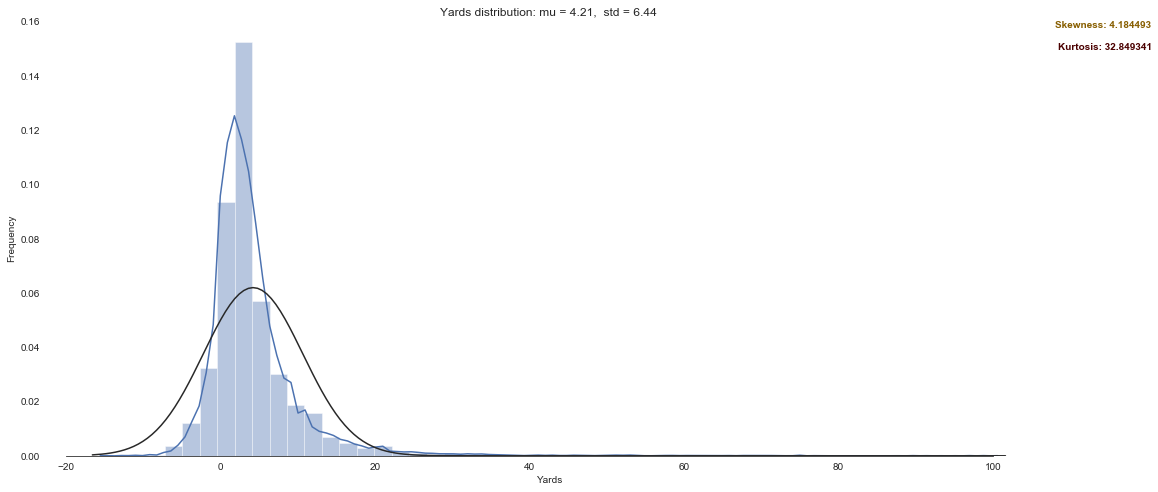

In [18]:
# Analyzing the target variable 'Yards'
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(18, 8))

# Fit a Normal Distribution
mu, std = norm.fit(train_jog["Yards"])

# Checking the frequency distribution of the variable Yards
sns.distplot(train_jog["Yards"], color="b", fit = stats.norm)
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Yards")
ax.set(title="Yards distribution: mu = %.2f,  std = %.2f" % (mu, std))
sns.despine(trim=True, left=True)

# Adding Skewness and Kurtosis
ax.text(x=1.1, y=1, transform=ax.transAxes, s="Skewness: %f" % train_jog["Yards"].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
ax.text(x=1.1, y=0.95, transform=ax.transAxes, s="Kurtosis: %f" % train_jog["Yards"].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')

plt.show()

### 6. General observations
- 1. It is possible to observe that the mean is 4.21 and the standard deviation is 6.44
- 2. Skewness = 4.18
- 3. Kurtosis = 32.84
- 4. The min value is -14 and the max value is 99

- ***Skewness*** is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean
- ***Kurtosis*** is a measure of the "tailedness" of the probability distribution of a real-valued random variable

### 6.2 Analyzing PLAYER Variables
- ***PlayerHeight:*** player height in feet-inches
- ***PlayerWeight:*** player weight in lbs
- ***PlayerBirthDate:*** Player's date of birth
- ***PlayerCollegeName:*** college the player attended
- ***Position:*** Player's main position
- ***JerseyNumber:***
   - Refers to players' uniform numbers ranging from 1 to 99. Attackers use 50 to 79 and are not allowed to handle a scrimmage play unless they report to the referee that they are playing out of position.

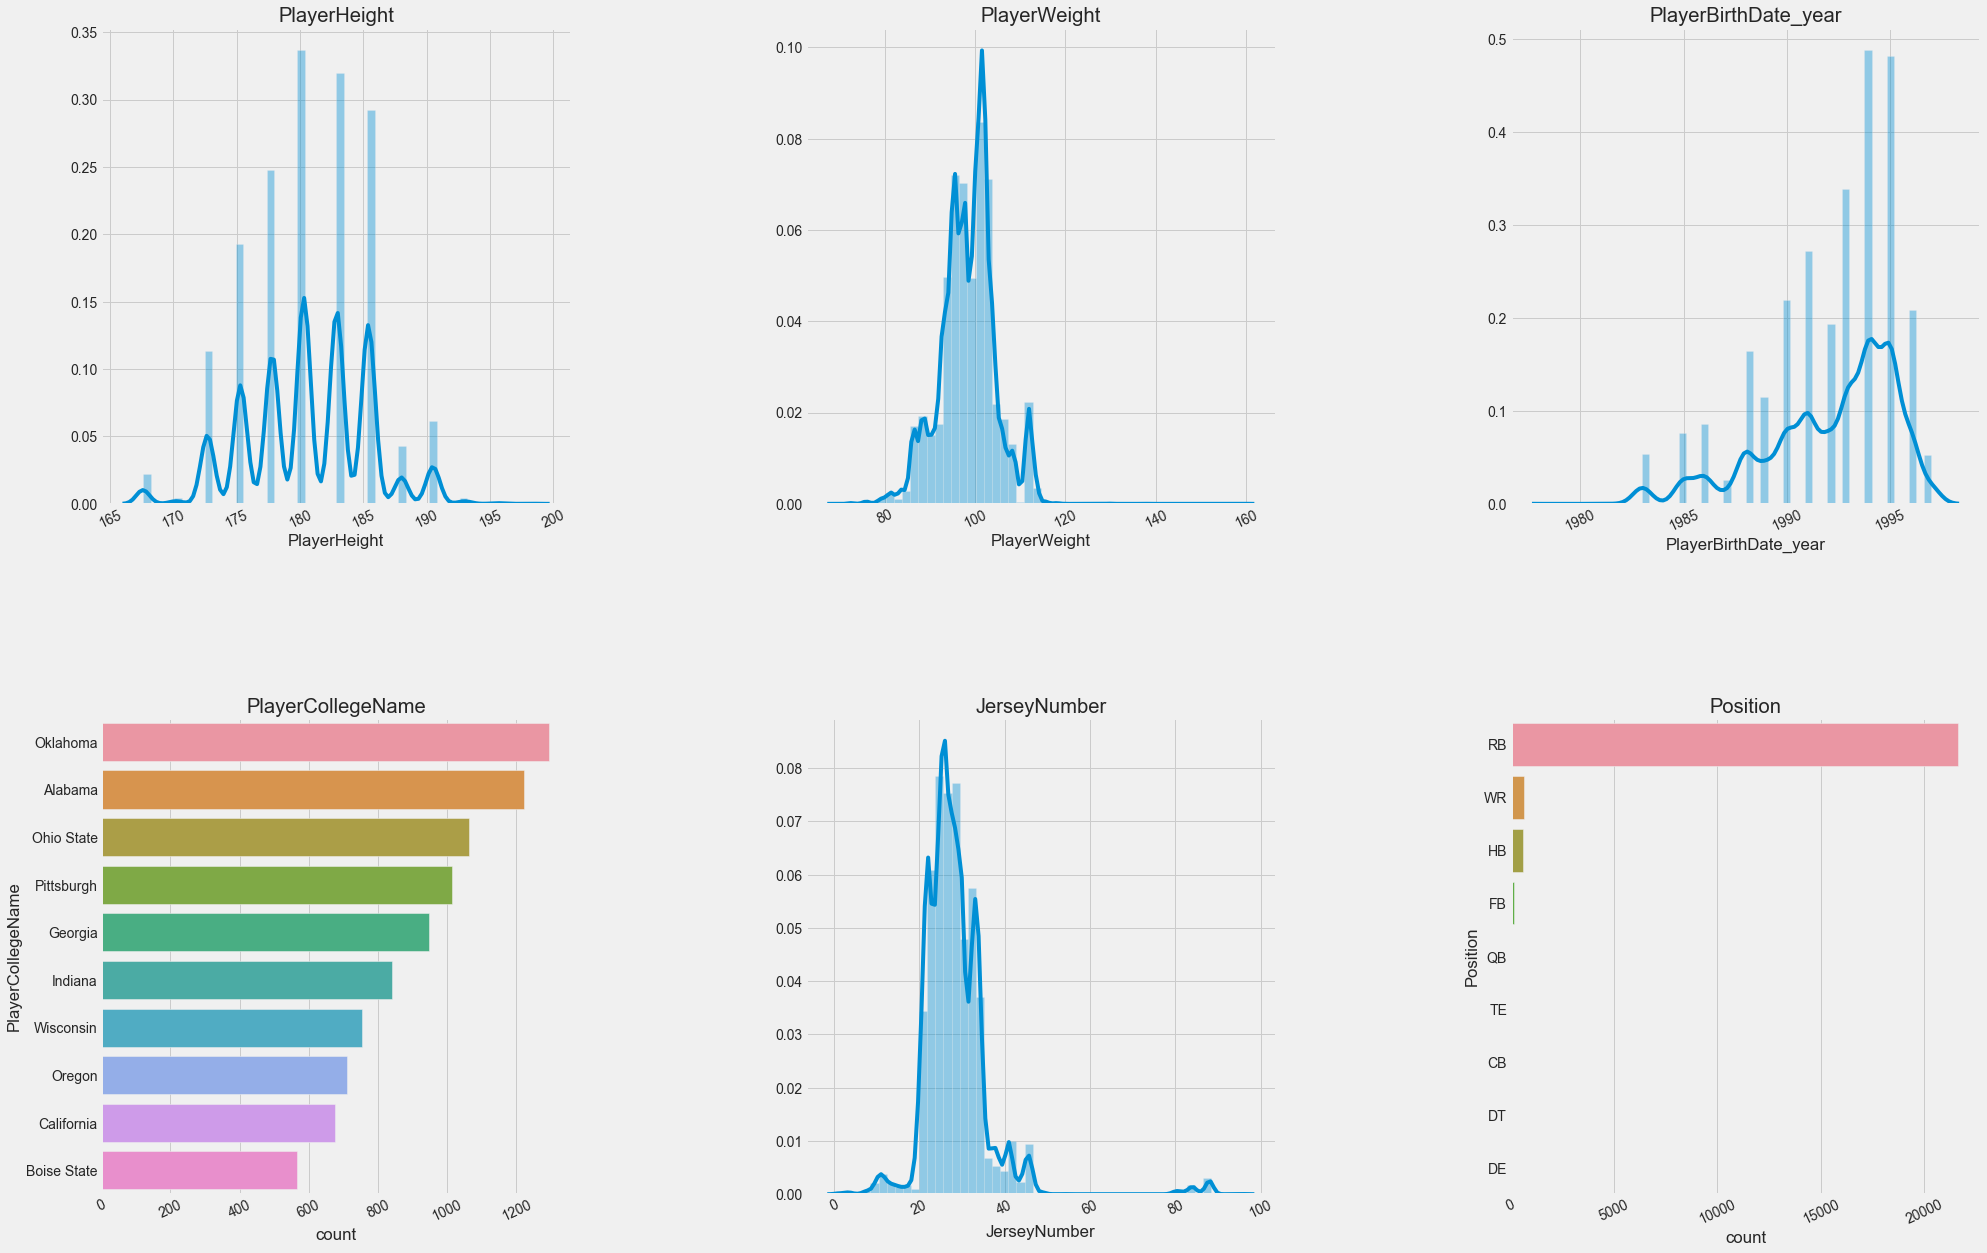

In [19]:
# Distribution plot for each player feature
columns_to_plot = ['PlayerHeight', 'PlayerWeight', 'PlayerBirthDate_year', 'PlayerCollegeName', 'JerseyNumber', 'Position']
plot_distribution(train_jog[columns_to_plot], cols=3, width=30, height=20, hspace=0.45, wspace=0.5)

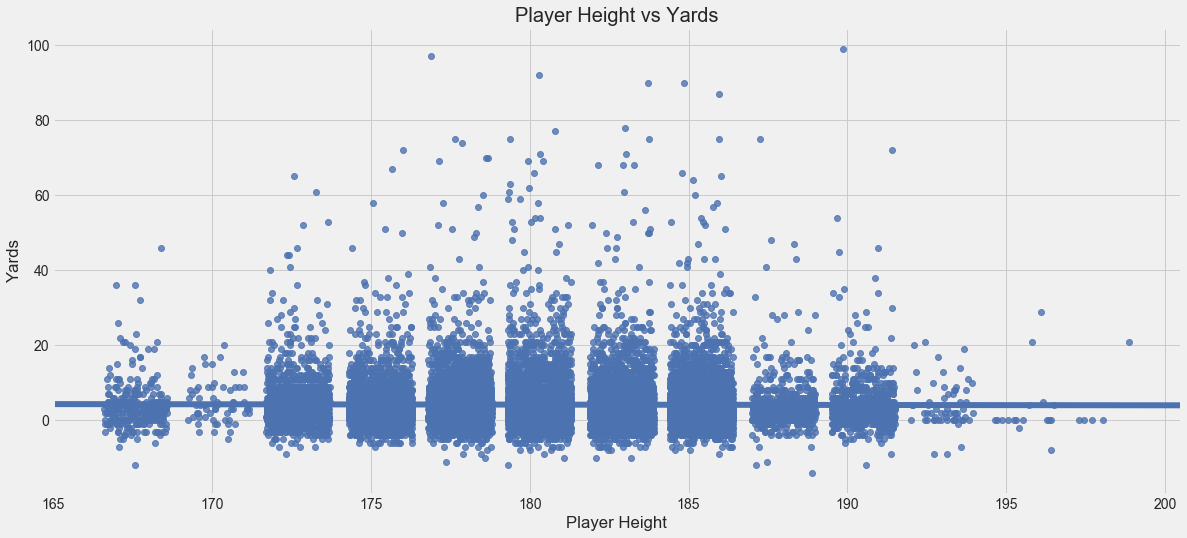

In [20]:
# Display scatterPlot between Player Height to Yards
plt.figure(figsize=(18, 8))
sns.regplot(x='PlayerHeight', y='Yards', data=train_jog, color='b', x_jitter=1)
plt.xlabel('Player Height')
plt.ylabel('Yards')
plt.title('Player Height vs Yards', fontsize=20)
plt.show()

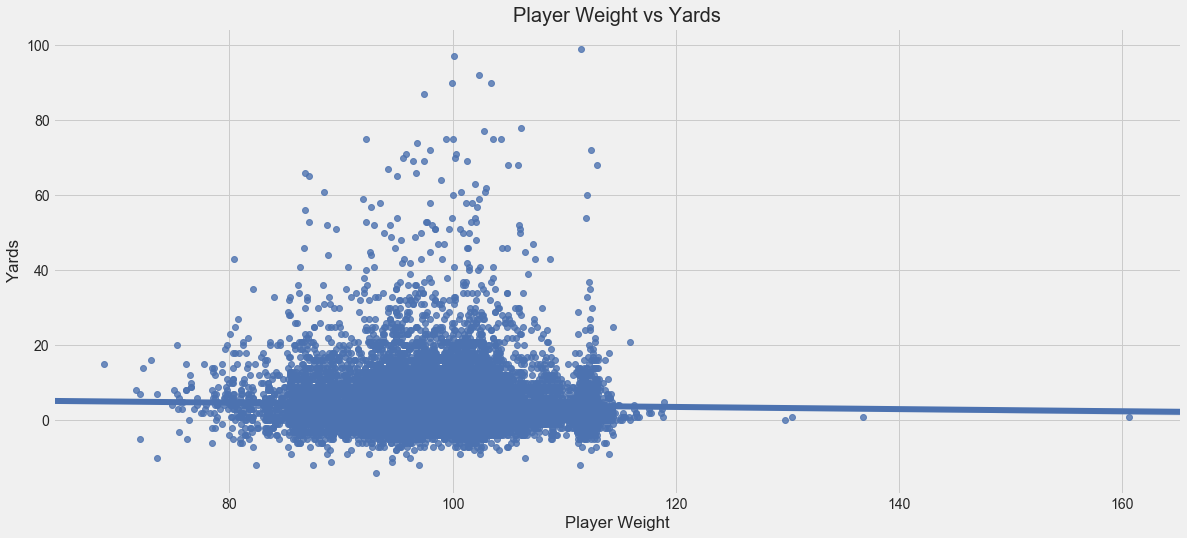

In [21]:
# Display scatterPlot between Player Weight to Yards
plt.figure(figsize=(18, 8))
sns.regplot(x='PlayerWeight', y='Yards', data=train_jog, color='b', x_jitter=1)
plt.xlabel('Player Weight')
plt.ylabel('Yards')
plt.title('Player Weight vs Yards', fontsize=20)
plt.show()

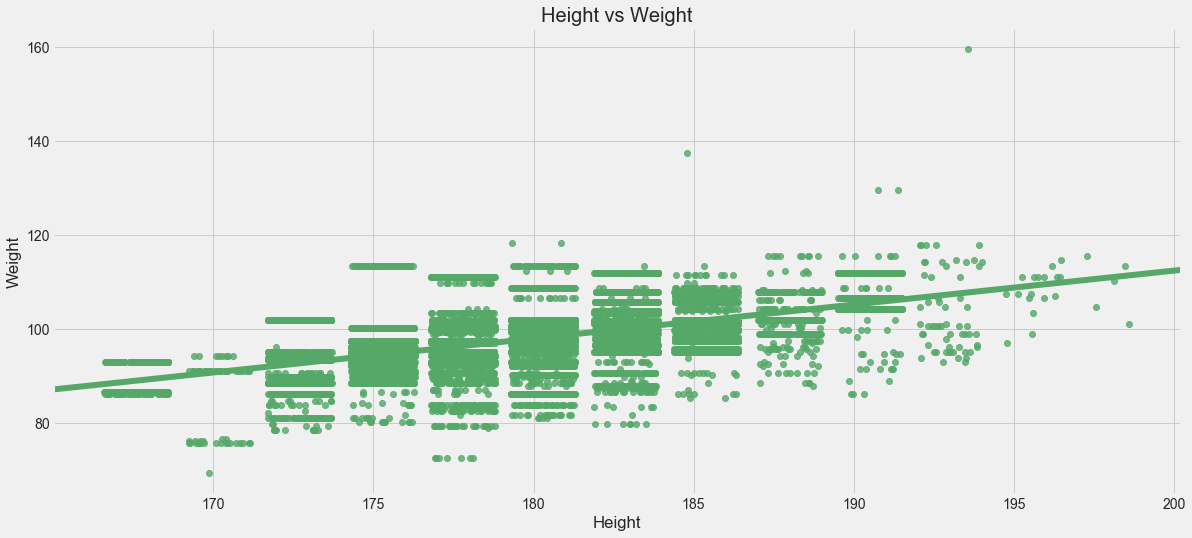

In [22]:
# Display scatterPlot between Player Height to Player Weight
# It's a positive regression relationship where the taller the player, the heavier the player
plt.figure(figsize=(18, 8))
sns.regplot(x='PlayerHeight', y='PlayerWeight', data=train_jog, color='g', x_jitter=1)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight', fontsize=20)
plt.show()

In [23]:
# Checking players over 140kg
# Found only 1 player: Akiem Hicks
# The image below shows this player
train_jog[train_jog['PlayerWeight'] >= 140.00].head()

GameId          PlayId  Team      X      Y     S     A   Dis  \
439473  2018120207  20181202071749  away  108.4  28.91  3.41  0.23  0.36   

        Orientation     Dir    NflId  DisplayName  JerseyNumber  Season  \
439473       133.32  105.63  2533433  Akiem Hicks            96    2018   

        YardLine  Quarter  GameClock PossessionTeam  Down  Distance  \
439473         1        2      223.0            CHI     4         1   

       FieldPosition  HomeScoreBeforePlay  VisitorScoreBeforePlay  \
439473           NYG                    7                       7   

        NflIdRusher OffenseFormation             OffensePersonnel  \
439473      2533433            JUMBO  6 OL, 1 RB, 1 TE, 0 WR,2 DL   

        DefendersInTheBox  DefensePersonnel PlayDirection         TimeHandoff  \
439473               10.0  5 DL, 3 LB, 3 DB         right 2018-12-02 19:10:15   

                  TimeSnap  Yards  PlayerHeight  PlayerWeight PlayerBirthDate  \
439473 2018-12-02 19:10:14      1         193.0    159.664514      1989-11-16   

       PlayerCollegeName Position HomeTeamAbbr VisitorTeamAbbr  Week  \
439473      Regina, Can.       DT          NYG             CHI    13   

                Stadium             Location StadiumType  \
439473  MetLife Stadium  East Rutherford, NJ     unknown   

                         Turf GameWeather  Temperature  Humidity  WindSpeed  \
439473  UBU Speed Series-S5-M     nublado    11.111111      92.0          3   

       WindDirection  PlayerBirthDate_day  PlayerBirthDate_month  \
439473    north west                   16                     11   

        PlayerBirthDate_year  TimeSnap_min  TimeSnap_seg  TimeHandoff_min  \
439473                  1989            10            14               10   

        TimeHandoff_seg  
439473               15

In [24]:
# Yeah, this guy is big
Image(url = 'https://radioimg.s3.amazonaws.com/wscram/styles/nts_image_cover_tall_775x425/s3/Akiem_Hicks_6.jpg?BOAlCf3Wc4ySX4yP9hqxL4r3e6OIKdL_&itok=-QTENpoi&c=ae8001fe2a7c6e1ccd639801892a4486',width=400,height=400)

In [25]:
# Checking players under 70kg
# Found only 1 player: JoJo Natson
# The image below shows this player
train_jog[train_jog['PlayerWeight'] <= 70.00].head()

GameId          PlayId  Team      X      Y     S     A   Dis  \
220780  2017121705  20171217052256  away  21.63  34.17  7.22  3.57  0.76   

        Orientation     Dir    NflId  DisplayName  JerseyNumber  Season  \
220780        107.8  200.16  2558905  JoJo Natson            87    2017   

        YardLine  Quarter  GameClock PossessionTeam  Down  Distance  \
220780        18        3      890.0            NYJ     2        10   

       FieldPosition  HomeScoreBeforePlay  VisitorScoreBeforePlay  \
220780           NYJ                   17                      10   

        NflIdRusher OffenseFormation  OffensePersonnel  DefendersInTheBox  \
220780      2558905       SINGLEBACK  1 RB, 2 TE, 2 WR                8.0   

        DefensePersonnel PlayDirection         TimeHandoff  \
220780  4 DL, 2 LB, 5 DB         right 2017-12-17 19:47:45   

                  TimeSnap  Yards  PlayerHeight  PlayerWeight PlayerBirthDate  \
220780 2017-12-17 19:47:43     15         170.2     69.399633      1994-02-01   

       PlayerCollegeName Position HomeTeamAbbr VisitorTeamAbbr  Week  \
220780             Akron       WR           NO             NYJ    15   

                        Stadium         Location    StadiumType  \
220780  Mercedes-Benz SuperDome  New Orleans, LA  indoor_closed   

                         Turf GameWeather  Temperature  Humidity  WindSpeed  \
220780  UBU Speed Series-S5-M       chuva    19.444444      97.0          4   

       WindDirection  PlayerBirthDate_day  PlayerBirthDate_month  \
220780    south west                    1                      2   

        PlayerBirthDate_year  TimeSnap_min  TimeSnap_seg  TimeHandoff_min  \
220780                  1994            47            43               47   

        TimeHandoff_seg  
220780               45

In [26]:
Image(url = 'https://ssl.c.photoshelter.com/img-get2/I0000ajxYOXxxUQg/fit=1000x750/g=G0000TtQ9QQoRy9c/RAMS-CHARGERS-0923-0791.jpg',width=200,height=200)

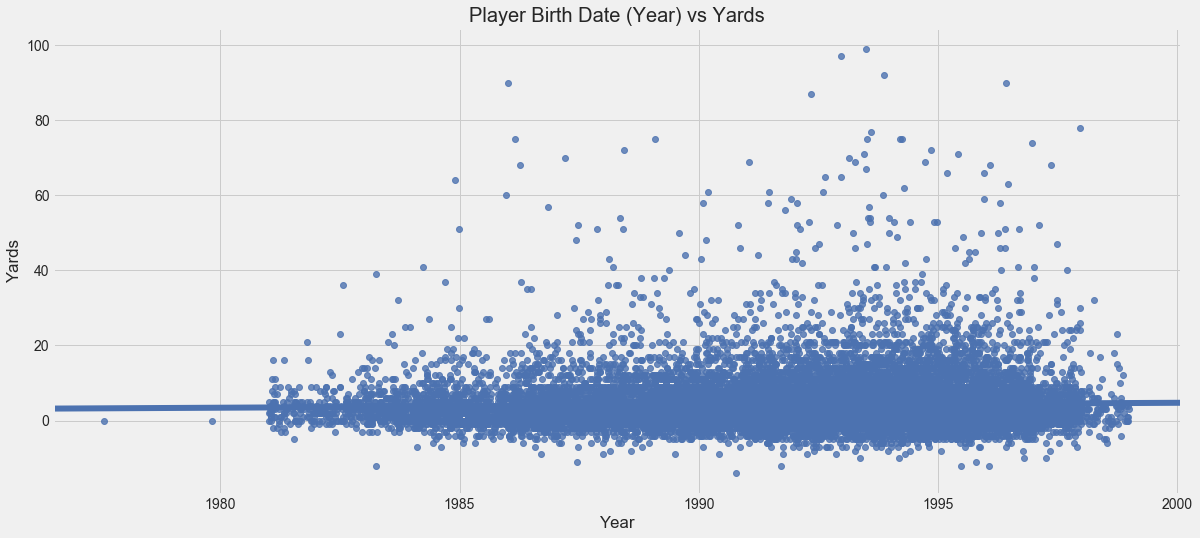

In [27]:
# Display scatterPlot between Player Birth Date Year to Yards
plt.figure(figsize=(18, 8))
sns.regplot(x='PlayerBirthDate_year', y='Yards', data=train_jog, color='b', x_jitter=2)
plt.xlabel('Year')
plt.ylabel('Yards')
plt.title('Player Birth Date (Year) vs Yards', fontsize=20)
plt.show()

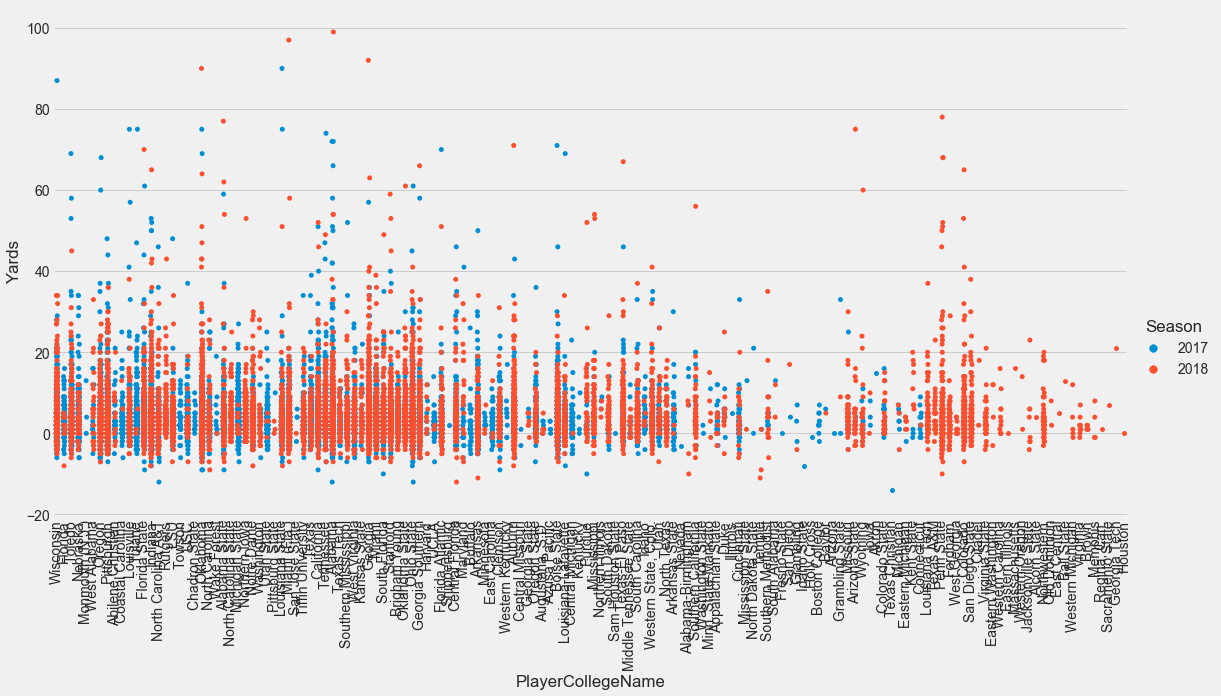

In [28]:
# Display catPlot between Season to Yards
g = sns.catplot(x='PlayerCollegeName', y='Yards', hue='Season', data=train_jog, height=8, aspect=2)
g.set_xticklabels(rotation=90)

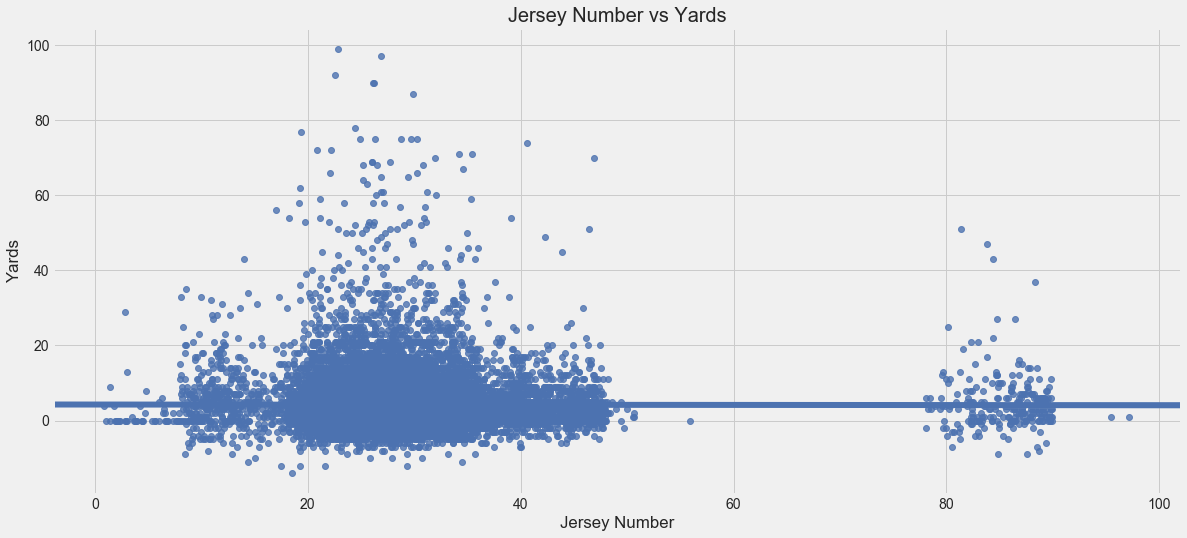

In [29]:
# Display scatterPlot between Jersey Number to Yards
plt.figure(figsize=(18, 8))
sns.regplot(x='JerseyNumber', y='Yards', data=train_jog, color='b', x_jitter=2)
plt.xlabel('Jersey Number')
plt.ylabel('Yards')
plt.title('Jersey Number vs Yards', fontsize=20)
plt.show()

In [30]:
train_jog['Position'].value_counts()

RB    21628
WR      638
HB      616
FB      169
QB       77
TE       31
CB        9
DT        2
DE        1
Name: Position, dtype: int64

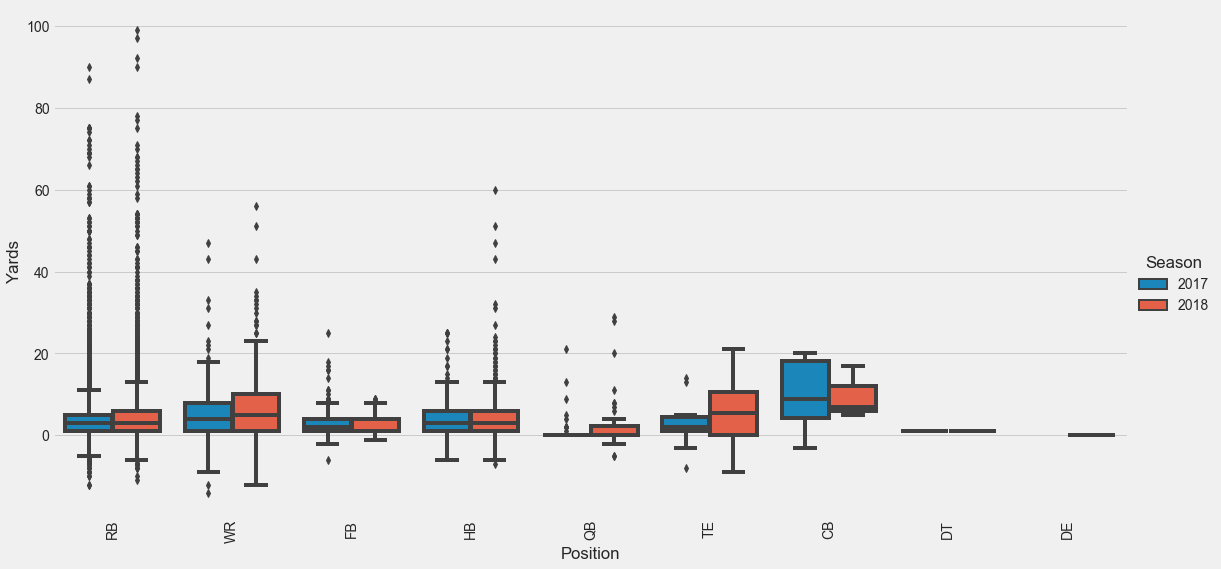

In [31]:
# Display catPlot between Position to Yards
g = sns.catplot(x='Position', y='Yards', hue='Season', data=train_jog, kind="box", height=8, aspect=2)
g.set_xticklabels(rotation=90)

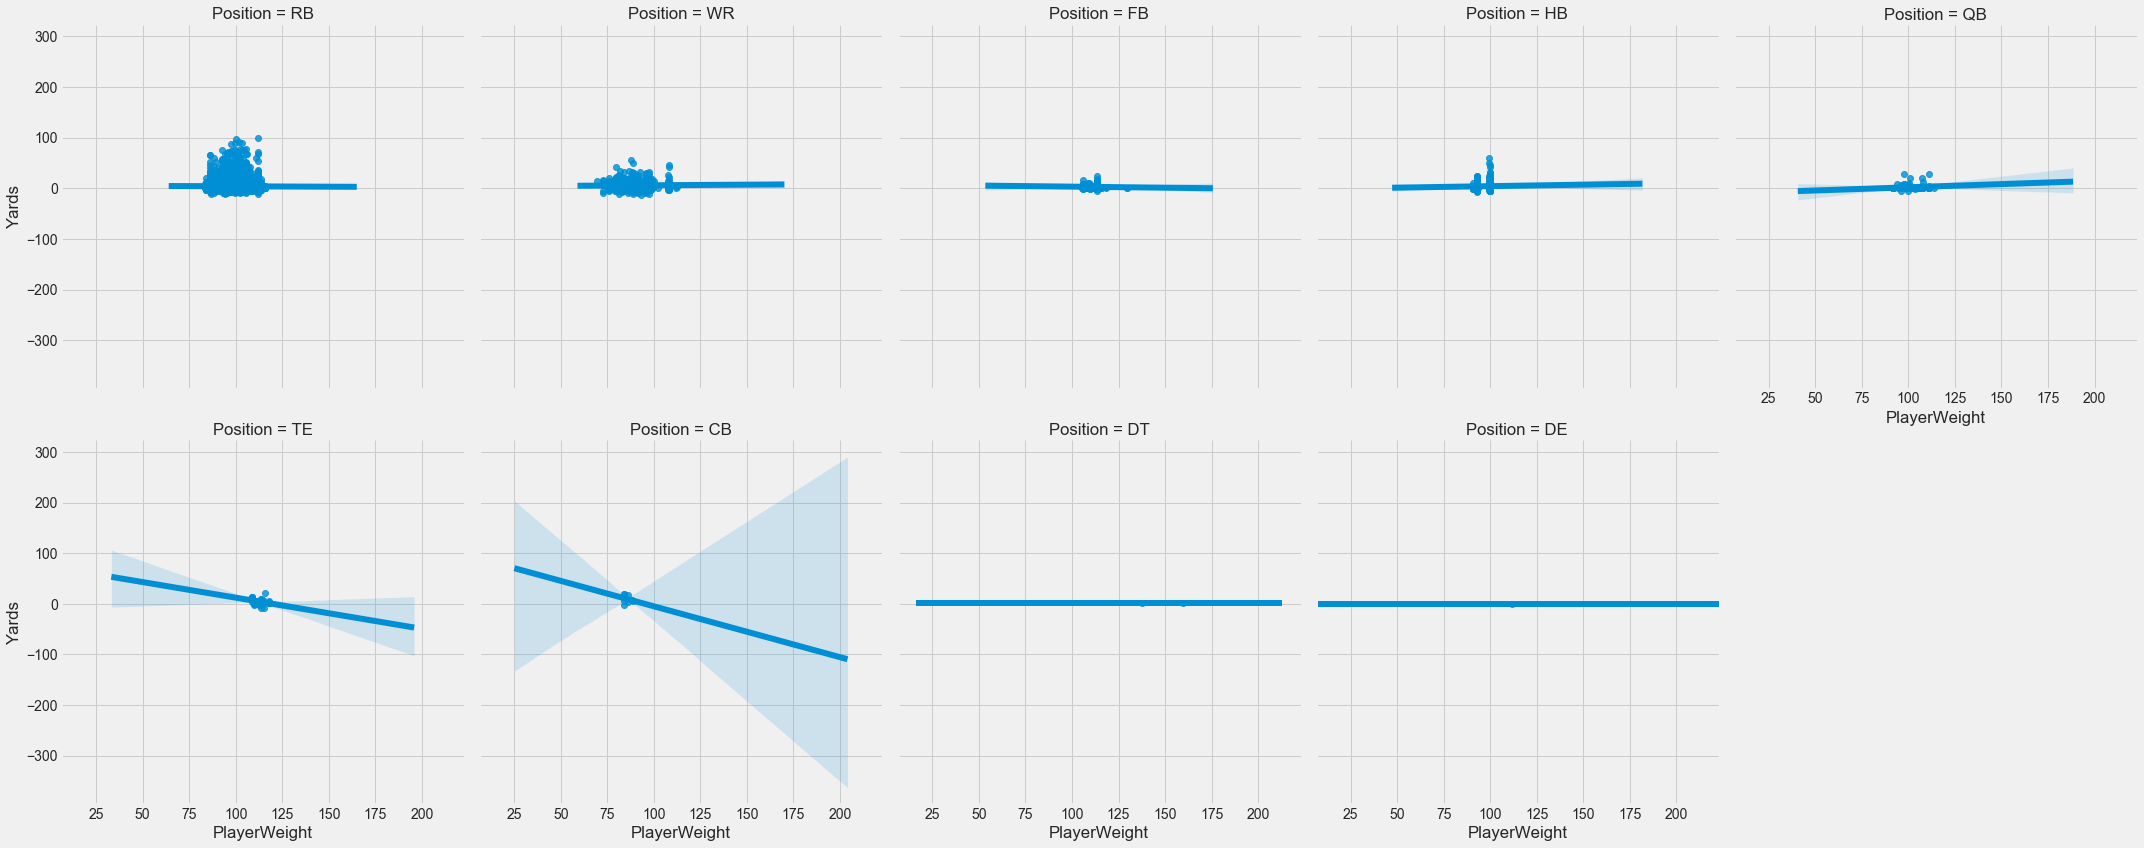

In [32]:
# Display linear plot between Player Weight, Position and Yards
g = sns.lmplot(x='PlayerWeight', y='Yards', data=train_jog, 
               x_jitter=.2, col="Position" , height=6, aspect=1, col_wrap=5)

### 6.3 Analyzing the general variables of GAME
- ***Season:*** Season Year
- ***Week:*** Game Week
- ***Team:*** Team Details: Home Owners or Visitor (home or away)
- ***StadiumType:*** Stadium type name
- ***Stadium:*** Stadium brand name
- ***Location:*** Stadium location
- ***Turf:*** Stadium Turf Surface
- ***GameClock:*** Game time
- ***HomeTeamAbbr:*** Home Team Abbreviation
- ***VisitorTeamAbbr:*** short for visiting team

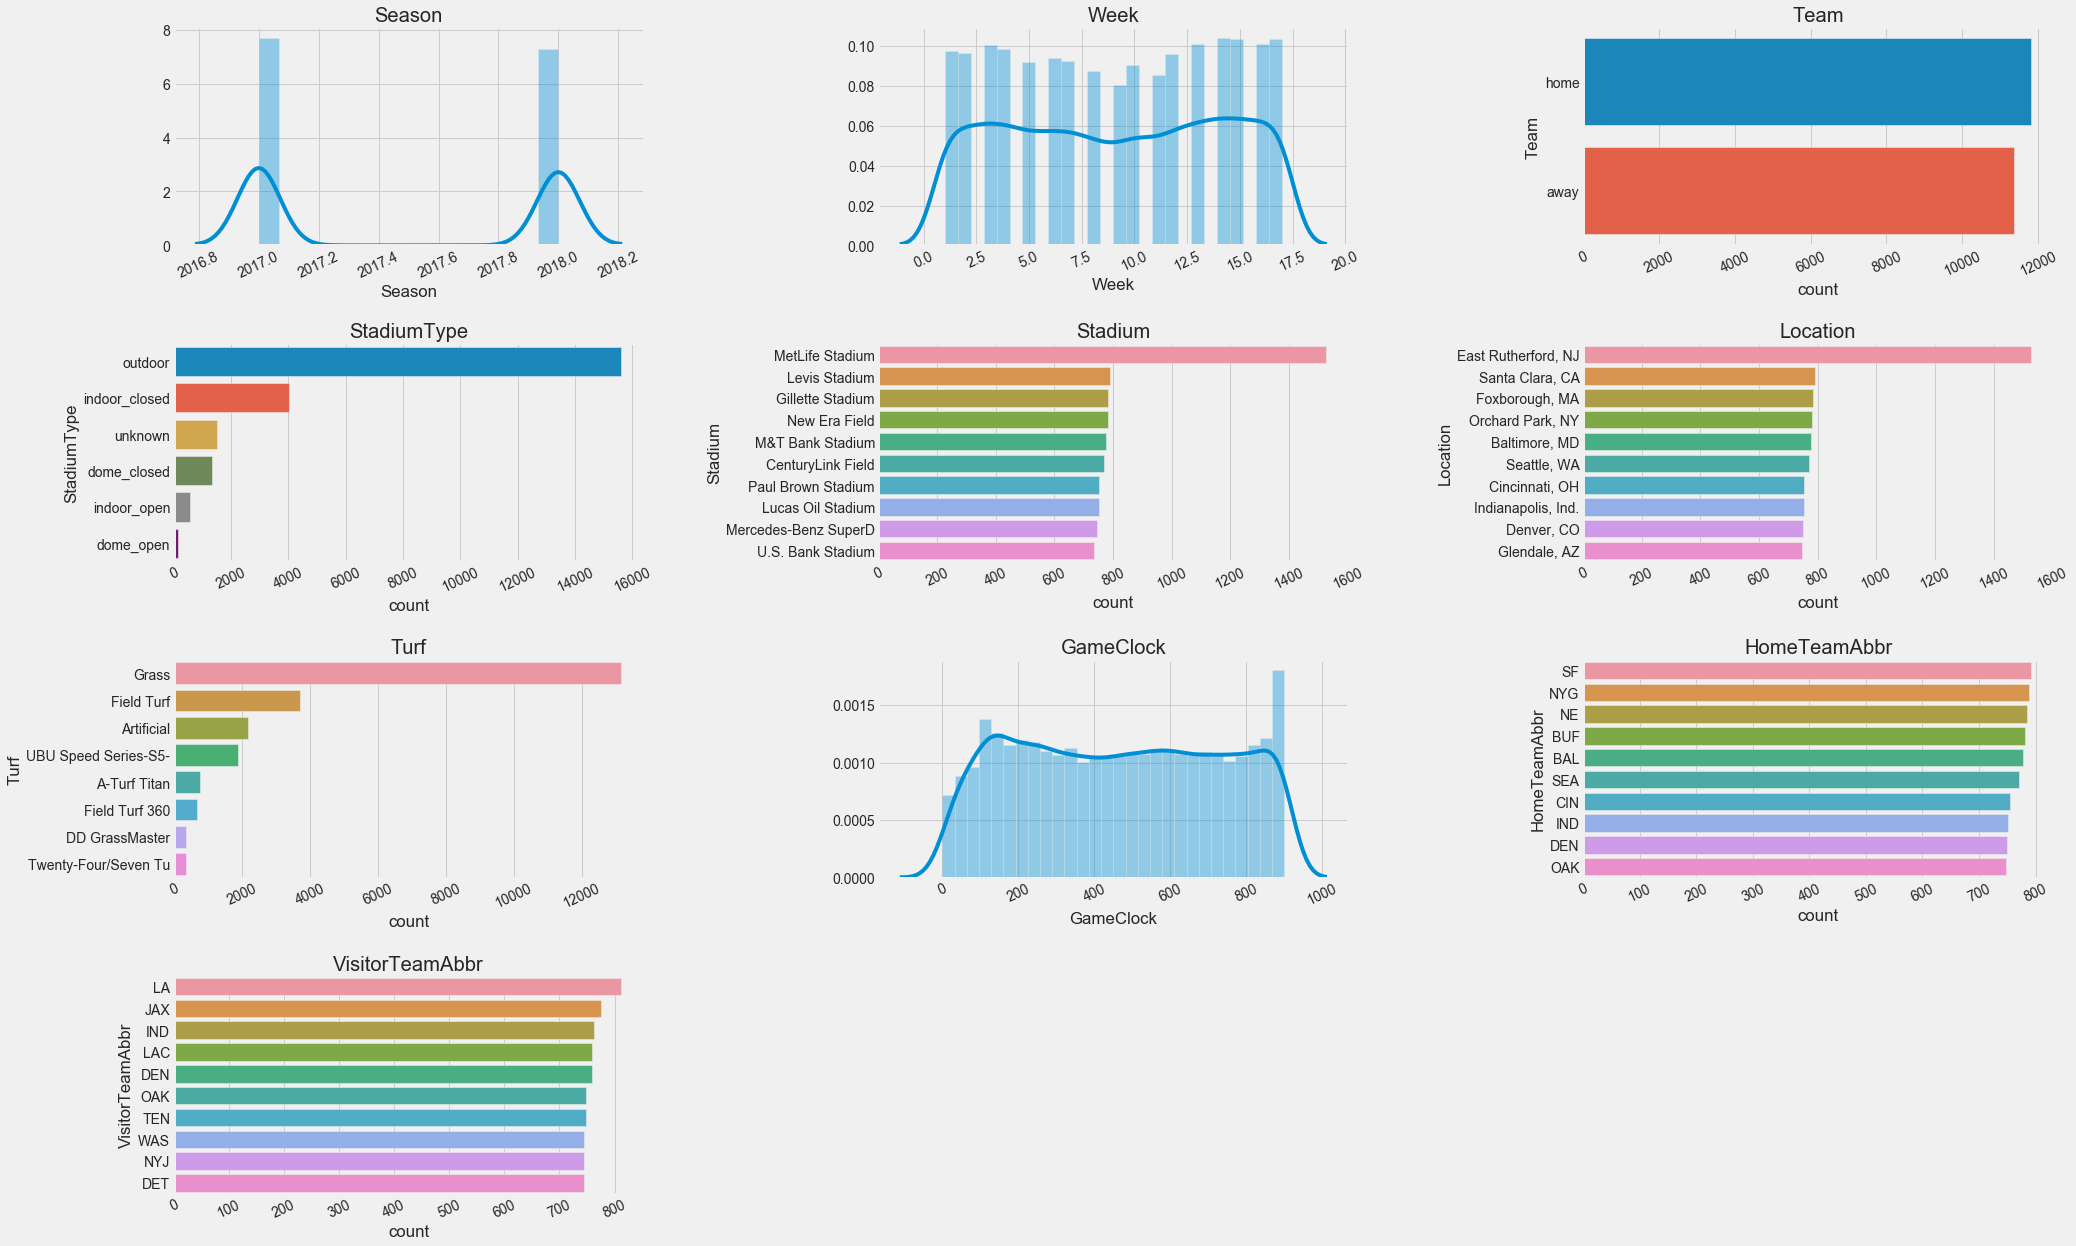

In [33]:
# Distribution plot for each game feature
columns_to_plot = ['Season', 'Week', 'Team', 'StadiumType', 'Stadium', 
                   'Location', 'Turf', 'GameClock', 'HomeTeamAbbr', 'VisitorTeamAbbr']
plot_distribution(train_jog[columns_to_plot], cols=3, width=30, height=20, hspace=0.45, wspace=0.5)

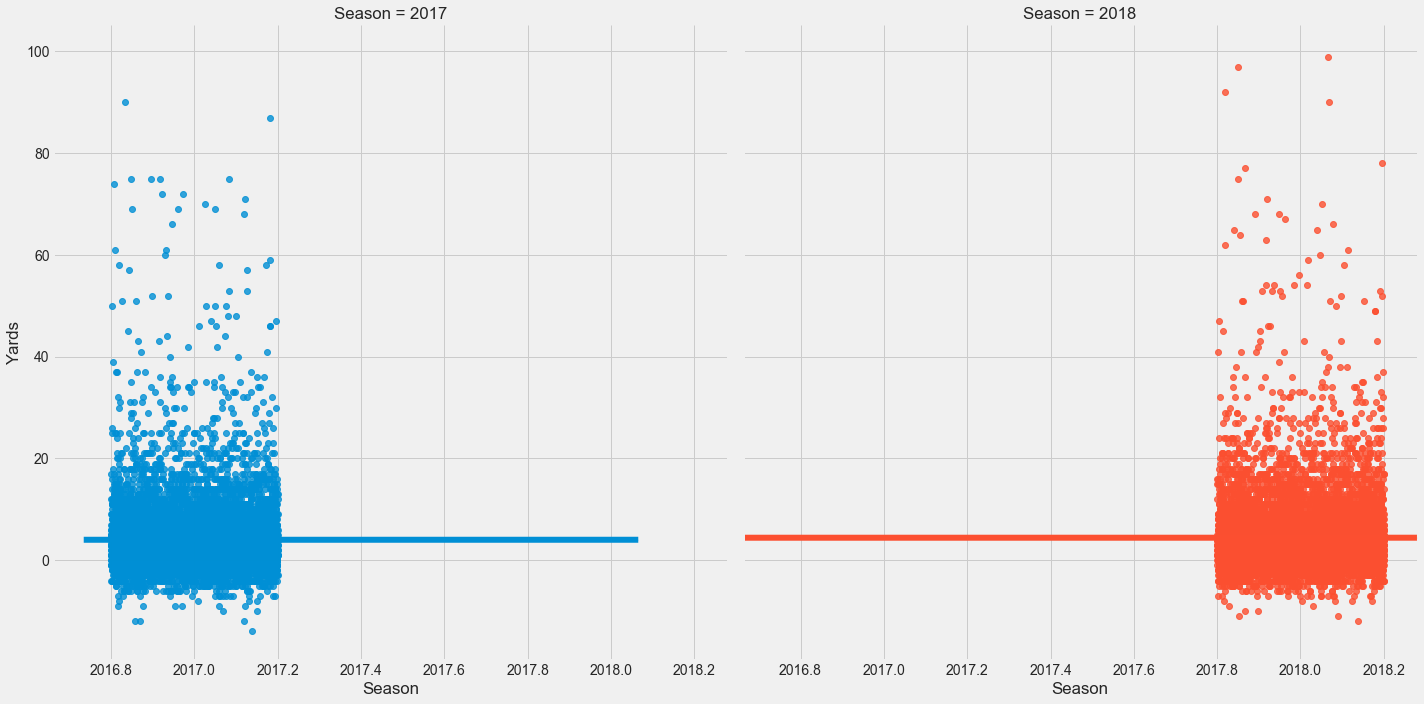

In [34]:
# Display linear plot between Season and Yards
g = sns.lmplot(x='Season', y='Yards', hue='Season', data=train_jog, x_jitter=.2, col="Season" , height=10)

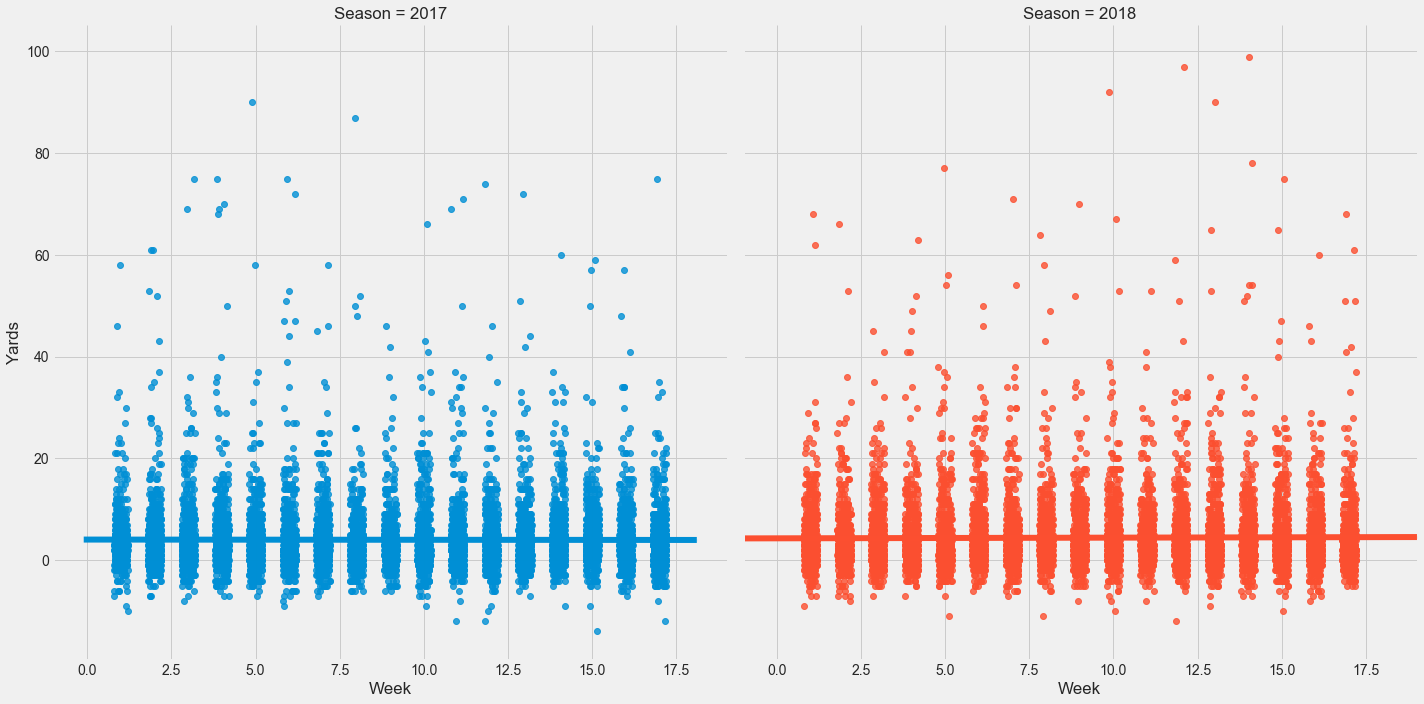

In [35]:
# Display linear plot between Season, Week and Yards
g = sns.lmplot(x='Week', y='Yards', hue='Season', data=train_jog, x_jitter=.2, col="Season" , height=10)

In [36]:
# Season has a correlation of 1.0 with GameId and PlayId. Example below with 2017 and 2018
# GameId and PlayId contain year and some more info
# Seems to be month and day plus one identifier
# You might need to leave the GameId and PlayId variables only with the individual indicator.
tmp = train_jog.set_index('Season')
print(tmp.loc[[2017], ['GameId','PlayId']].head(1))
print(tmp.loc[[2018], ['GameId','PlayId']].head(1))

            GameId          PlayId
Season                            
2017    2017090700  20170907000118
            GameId          PlayId
Season                            
2018    2018090600  20180906000104


In [37]:
# Checking which stadium are undefined type
# There are three stadium
# I'll have a look to see if you have a set type for them
q1 = """SELECT StadiumType, Stadium
          FROM train
        WHERE StadiumType = 'unknown'
        GROUP BY StadiumType, Stadium"""
ps.sqldf(q1, locals())

StadiumType          Stadium
0     unknown  MetLife Stadium
1     unknown   StubHub Center
2     unknown  TIAA Bank Field

In [38]:
# To MetLife Stadium
# I'll try to fix
q1 = """SELECT StadiumType, Stadium
          FROM train
        WHERE Stadium IN ('MetLife Stadium', 'StubHub Center', 'TIAA Bank Field')
        GROUP BY StadiumType, Stadium
        ORDER BY Stadium, StadiumType"""
ps.sqldf(q1, locals())

StadiumType          Stadium
0      outdoor  MetLife Stadium
1      unknown  MetLife Stadium
2      unknown   StubHub Center
3  indoor_open  TIAA Bank Field
4      outdoor  TIAA Bank Field
5      unknown  TIAA Bank Field

In [39]:
# MetLife Stadium only has OUTDOOR
# I'll fix this, assigning outdoor
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/0/04/Metlife_stadium_%28Aerial_view%29.jpg',width=400,height=400)

In [40]:
# StubHub Center only has OUTDOOR
# I'll fix this, assigning outdoor
Image(url = 'https://media.bizj.us/view/img/4273531/111813stubhubcenterga0014*750xx5184-2916-0-270.jpg',width=400,height=400)

In [41]:
# Fixing a feature Stadium
train_jog.loc[train_jog['Stadium'] == 'MetLife Stadium', 'StadiumType'] = 'outdoor'
train_jog.loc[train_jog['Stadium'] == 'StubHub Center', 'StadiumType'] = 'outdoor'

In [42]:
# View of Mercedes Benz stadium where there are several types of game modes
Image(url = 'https://cdn.vox-cdn.com/thumbor/FV1og2Kh9y8VwyrImv3tAM21vdM=/0x0:2740x1824/1200x800/filters:focal(1151x693:1589x1131)/cdn.vox-cdn.com/uploads/chorus_image/image/56280377/999476412.jpg.1504558796.jpg',width=400,height=400)

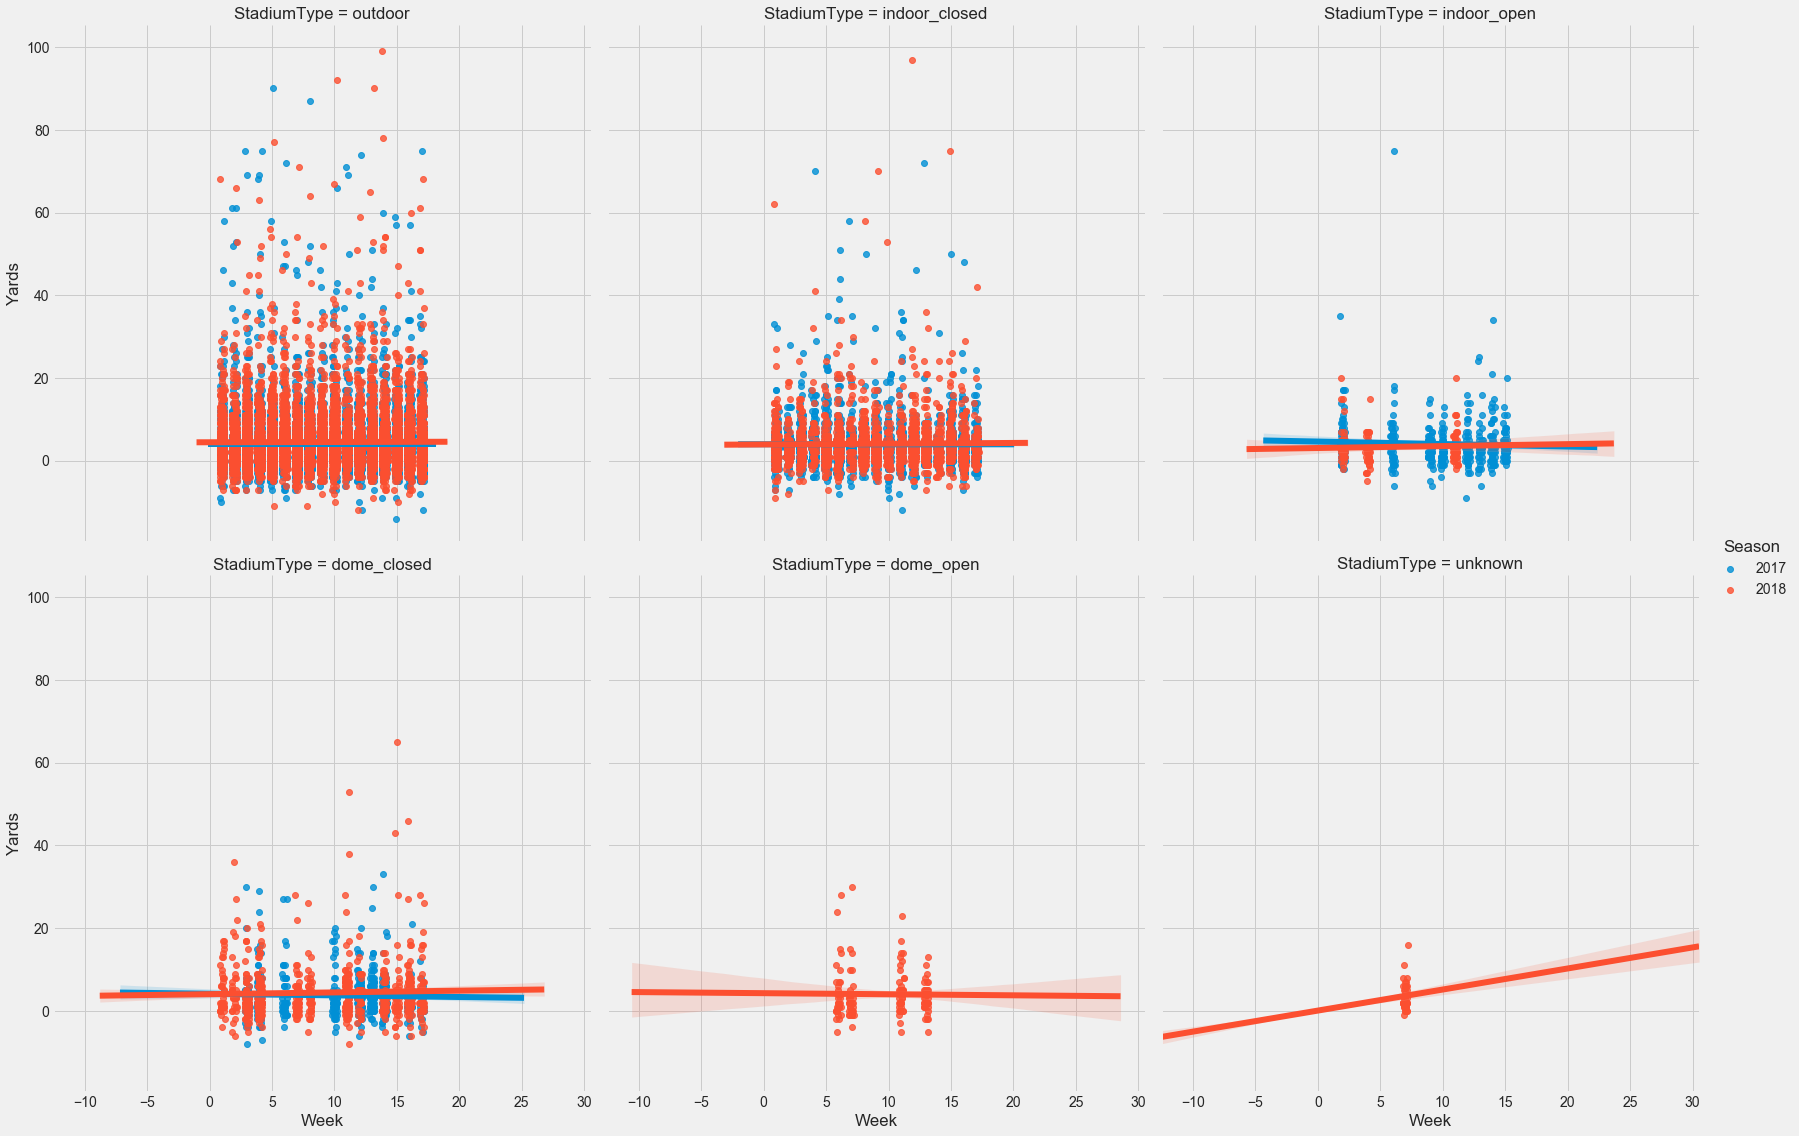

In [43]:
# Display linear plot between Season, Week and Yards
g = sns.lmplot(x='Week', y='Yards', hue='Season', data=train_jog, 
               x_jitter=.2, col="StadiumType" , height=8, col_wrap=3)

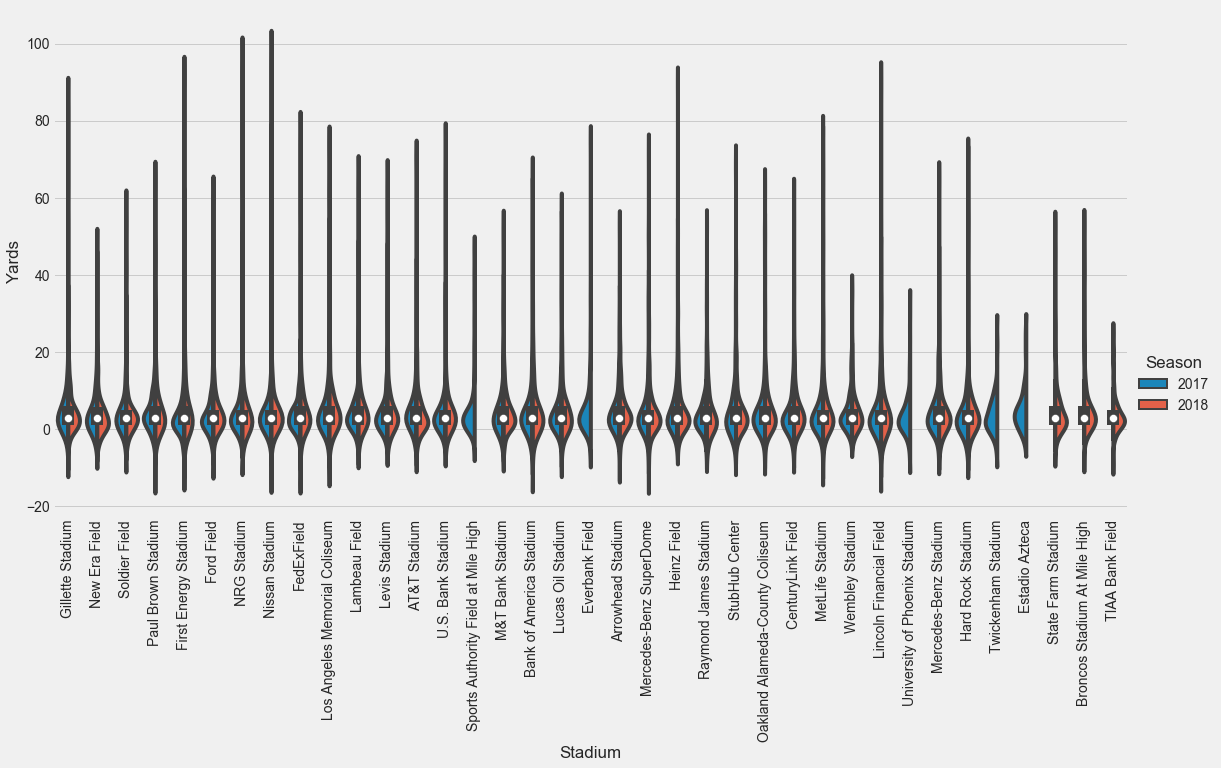

In [44]:
# Display catPlot between Stadium to Yards
g = sns.catplot(x='Stadium', y='Yards', hue='Season', data=train_jog, 
                kind="violin", split=True, height=8, aspect=2)
g.set_xticklabels(rotation=90)

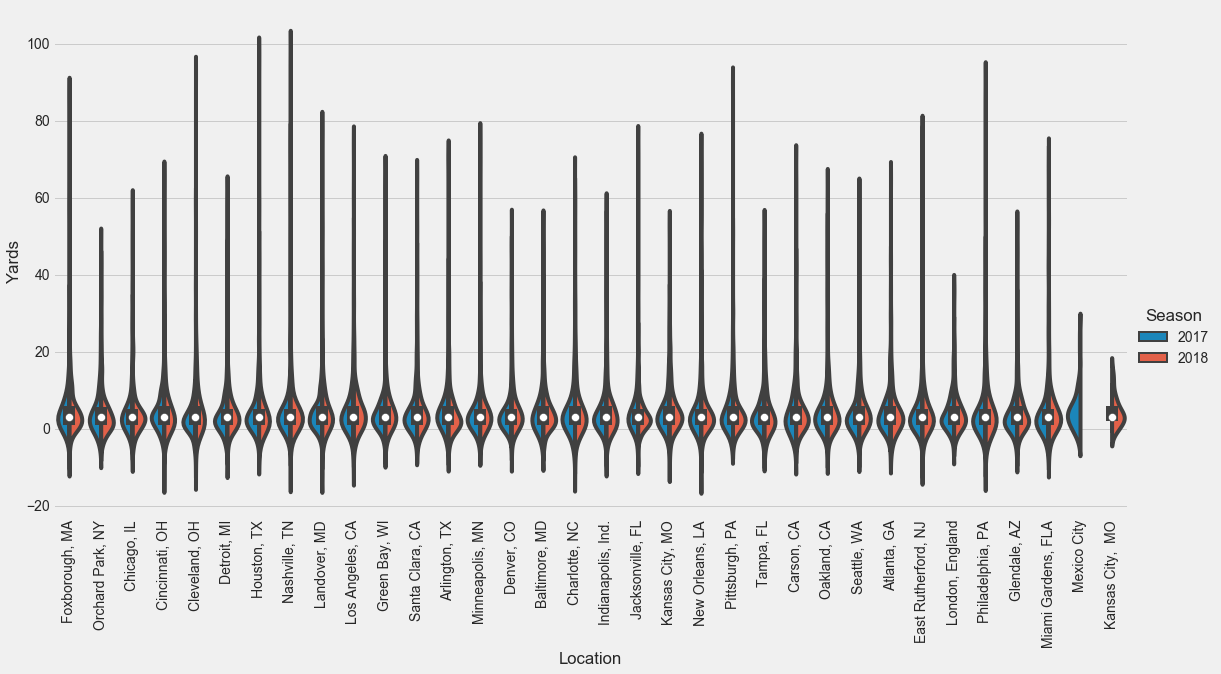

In [45]:
# Display catPlot between Location to Yards
g = sns.catplot(x='Location', y='Yards', hue='Season', data=train_jog, 
                kind="violin", split=True, height=8, aspect=2)
g.set_xticklabels(rotation=90)

In [46]:
# Description of the field surface
train_jog.groupby('Turf').size()

Turf
A-Turf Titan                782
Artificial                 2199
DD GrassMaster              367
Field Turf                 3721
Field Turf 360              693
Grass                     13160
Twenty-Four/Seven Turf      365
UBU Speed Series-S5-M      1884
dtype: int64

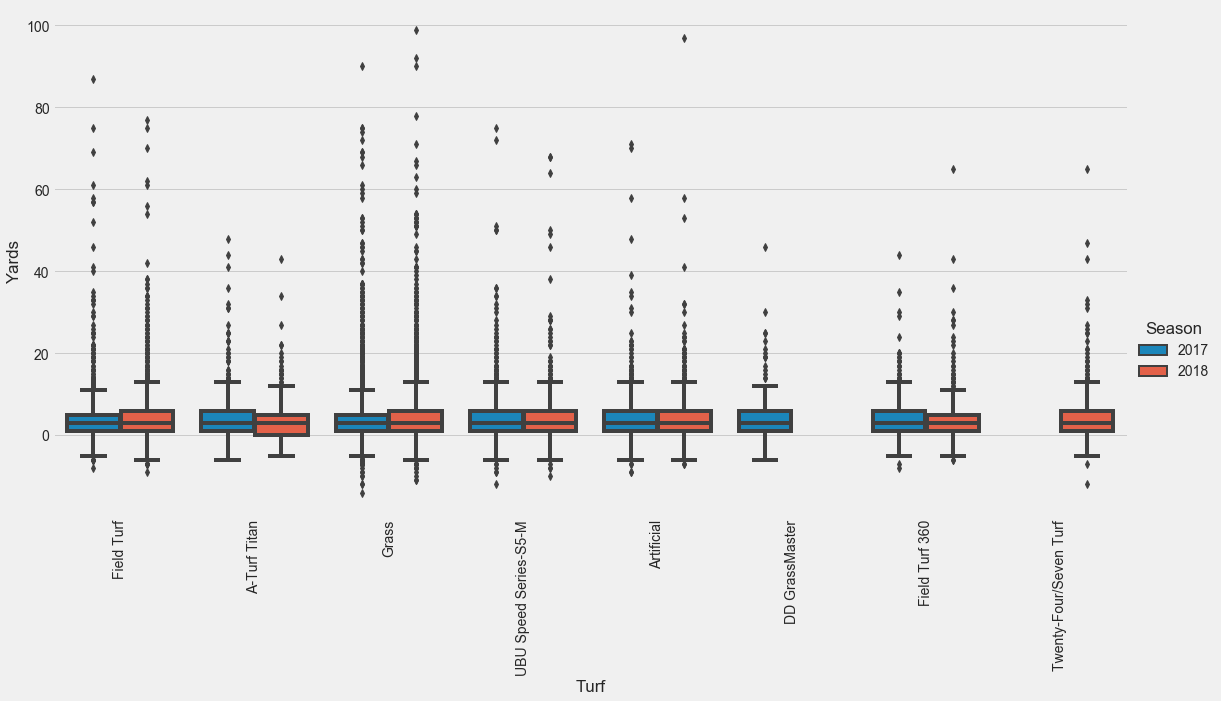

In [47]:
# Display catPlot between Turf to Yards
g = sns.catplot(x='Turf', y='Yards', hue='Season', data=train_jog, kind="box", height=8, aspect=2)
g.set_xticklabels(rotation=90)

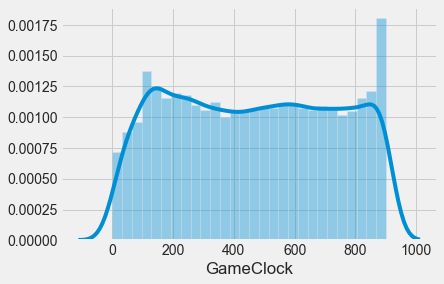

In [48]:
# Display the distribution plot of the GameClock feature.
g = sns.distplot(train_jog['GameClock'])

### 6.4 Analyzing the general variables of the ENVIRONMENT
- ***GameWeather:*** weather
- ***Temperature:*** environment temperature
- ***Humidity:*** Air Humidity
- ***WindDirection:*** Wind Direction
- ***WindSpeed:*** Wind Speed

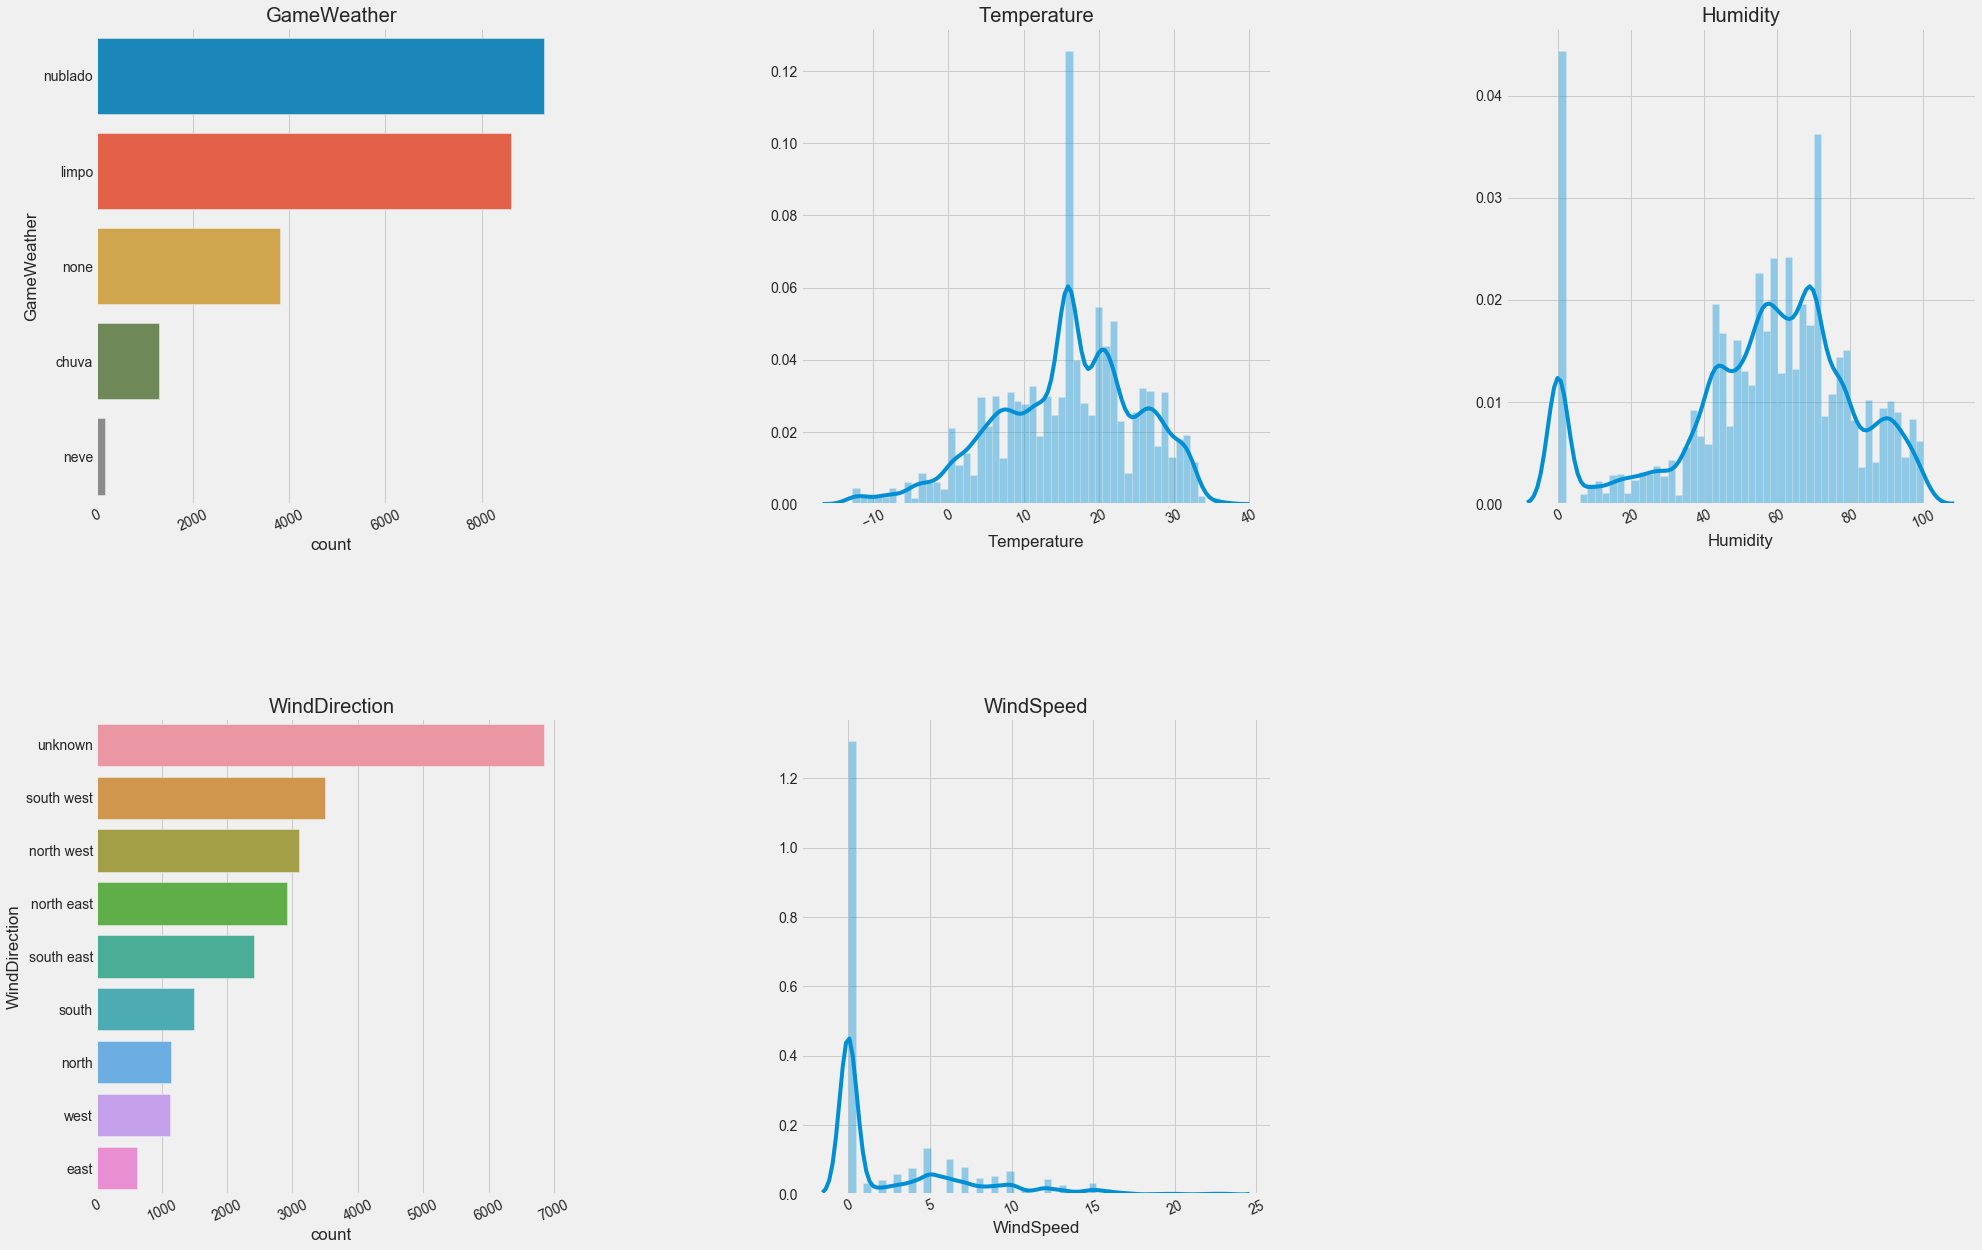

In [49]:
# Distribution plot for each Environment feature
columns_to_plot = ['GameWeather', 'Temperature', 'Humidity', 'WindDirection', 'WindSpeed']
plot_distribution(train_jog[columns_to_plot], cols=3, width=30, height=20, hspace=0.45, wspace=0.5)

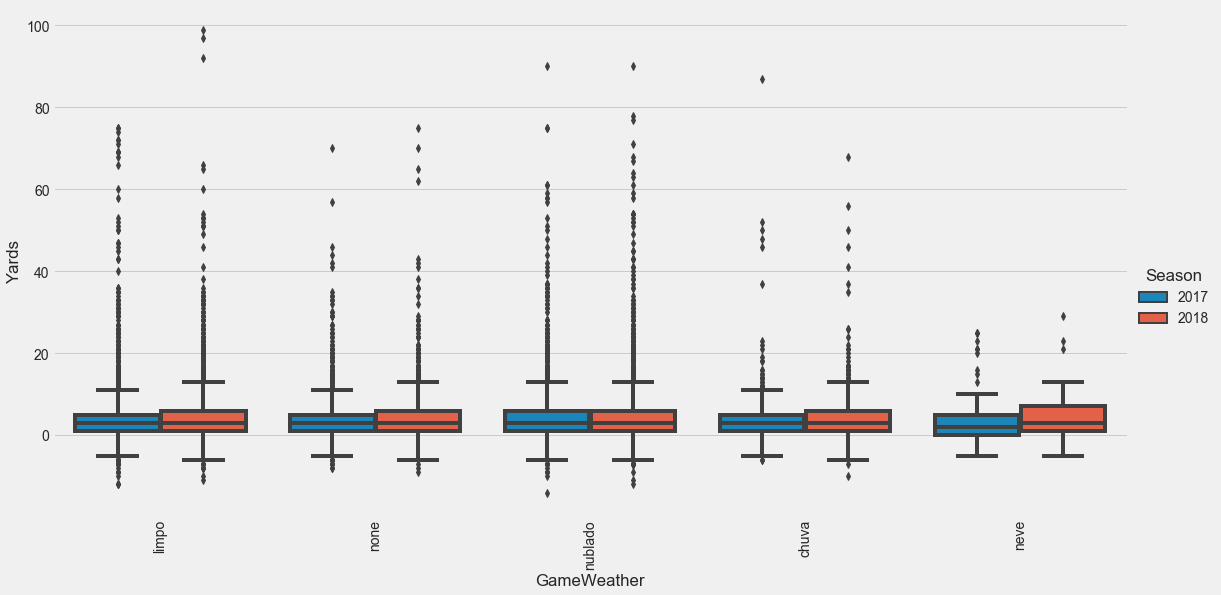

In [50]:
# Display catPlot between Weather to Yards
g = sns.catplot(x='GameWeather', y='Yards', hue='Season', data=train_jog, kind="box", height=8, aspect=2)
g.set_xticklabels(rotation=90)

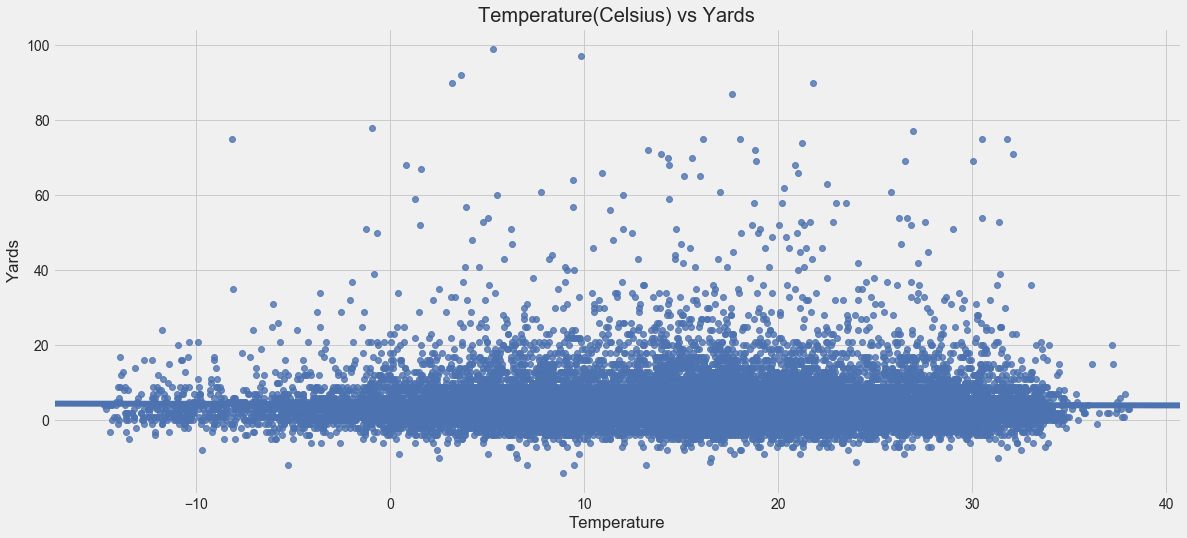

In [51]:
# Display scatterPlot between Temperature to Yards
plt.figure(figsize=(18, 8))
sns.regplot(x='Temperature', y='Yards', data=train_jog, color='b', x_jitter=2)
plt.xlabel('Temperature')
plt.ylabel('Yards')
plt.title('Temperature(Celsius) vs Yards', fontsize=20)
plt.show()

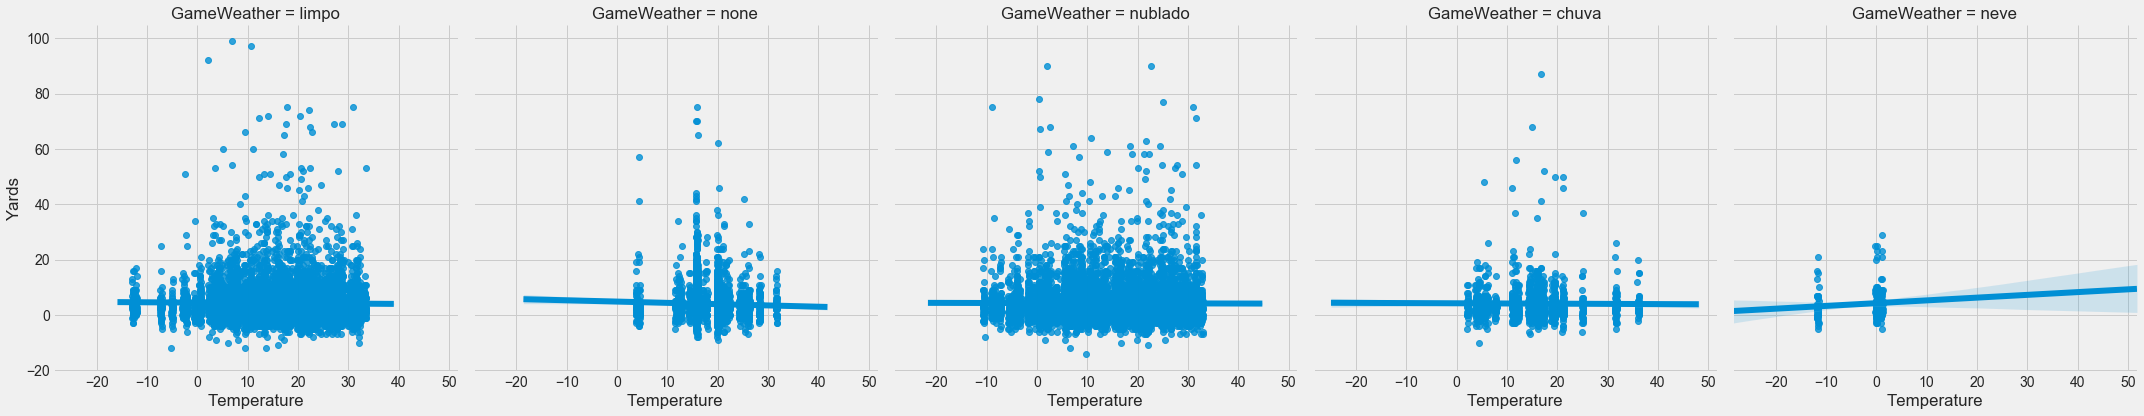

In [52]:
# Display linear plot between Temperature, Weather and Yards
g = sns.lmplot(x='Temperature', y='Yards', data=train_jog, 
               x_jitter=.2, col="GameWeather" , height=6, aspect=1)

In [53]:
# Has too many records with moisture 0
# Maybe it's better to see this
train_jog['Humidity'].value_counts().head()

0.0     2057
70.0    1314
56.0     610
67.0     604
42.0     581
Name: Humidity, dtype: int64

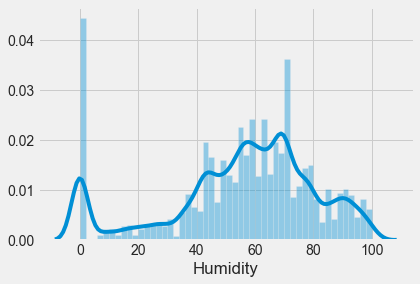

In [54]:
g = sns.distplot(train_jog['Humidity'])

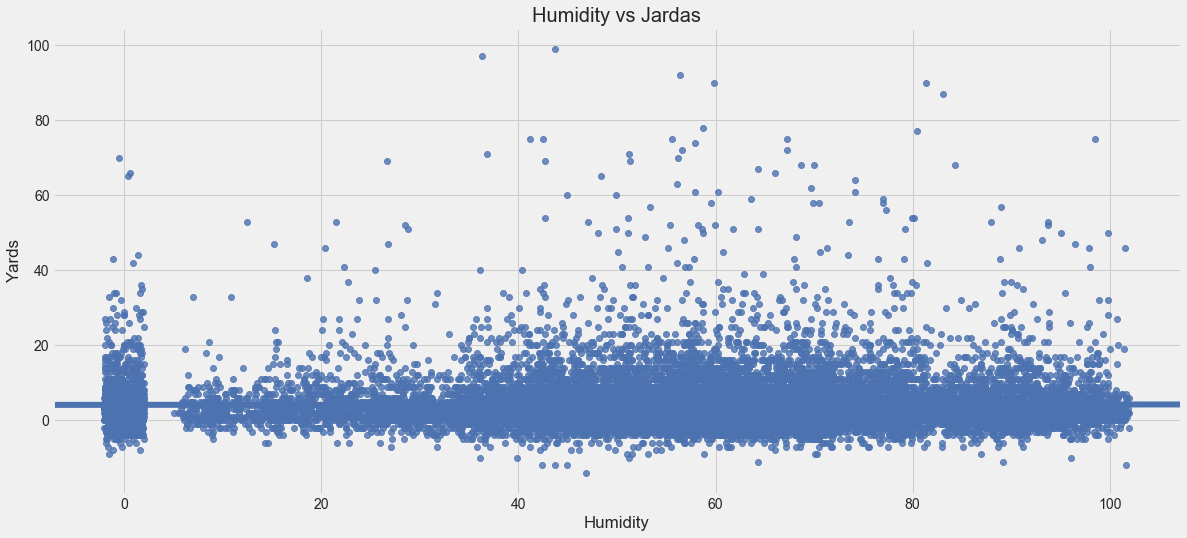

In [55]:
# Display scatterPlot between Humidity to Yards
plt.figure(figsize=(18, 8))
sns.regplot(x='Humidity', y='Yards', data=train_jog, color='b', x_jitter=2)
plt.xlabel('Humidity')
plt.ylabel('Yards')
plt.title('Humidity vs Jardas', fontsize=20)
plt.show()

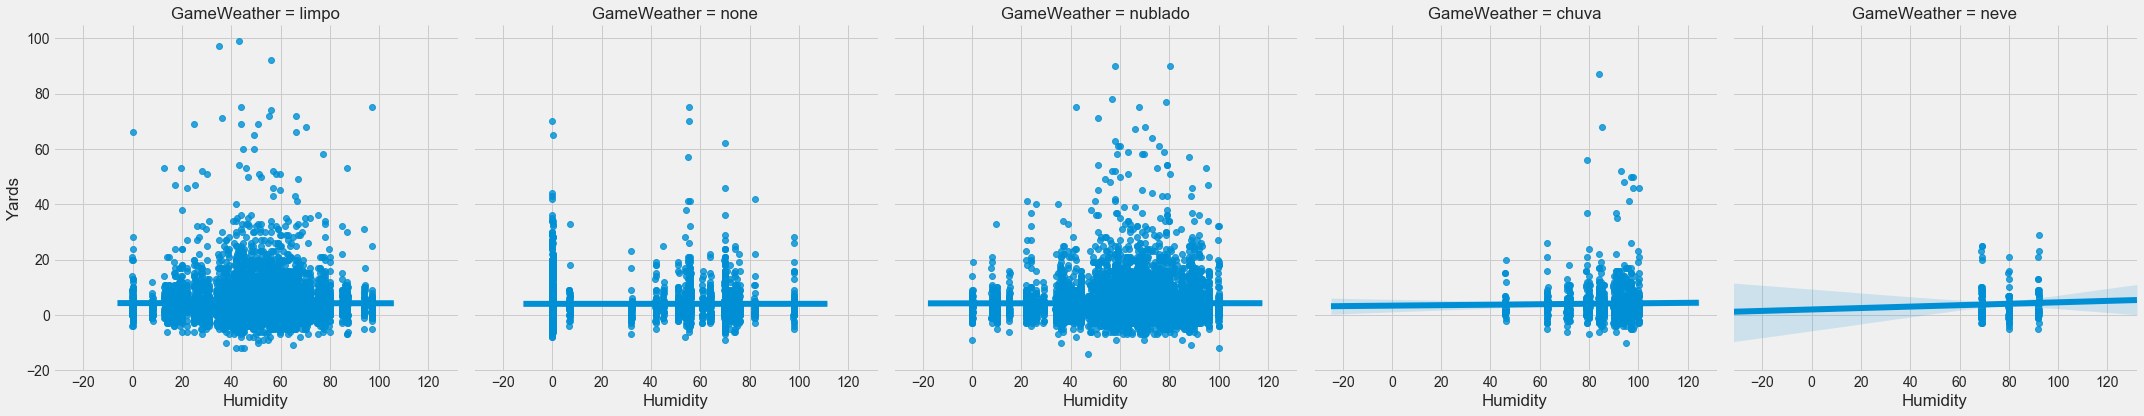

In [56]:
# Display linear graph with relationship between Humidity, Weather and Yards
# Most of humidity 0 is in NONE climate
g = sns.lmplot(x='Humidity', y='Yards', data=train_jog, 
               x_jitter=.2, col="GameWeather" , height=6, aspect=1)

In [57]:
train_jog['WindDirection'].value_counts()

unknown       6847
south west    3505
north west    3104
north east    2923
south east    2409
south         1499
north         1140
west          1130
east           614
Name: WindDirection, dtype: int64

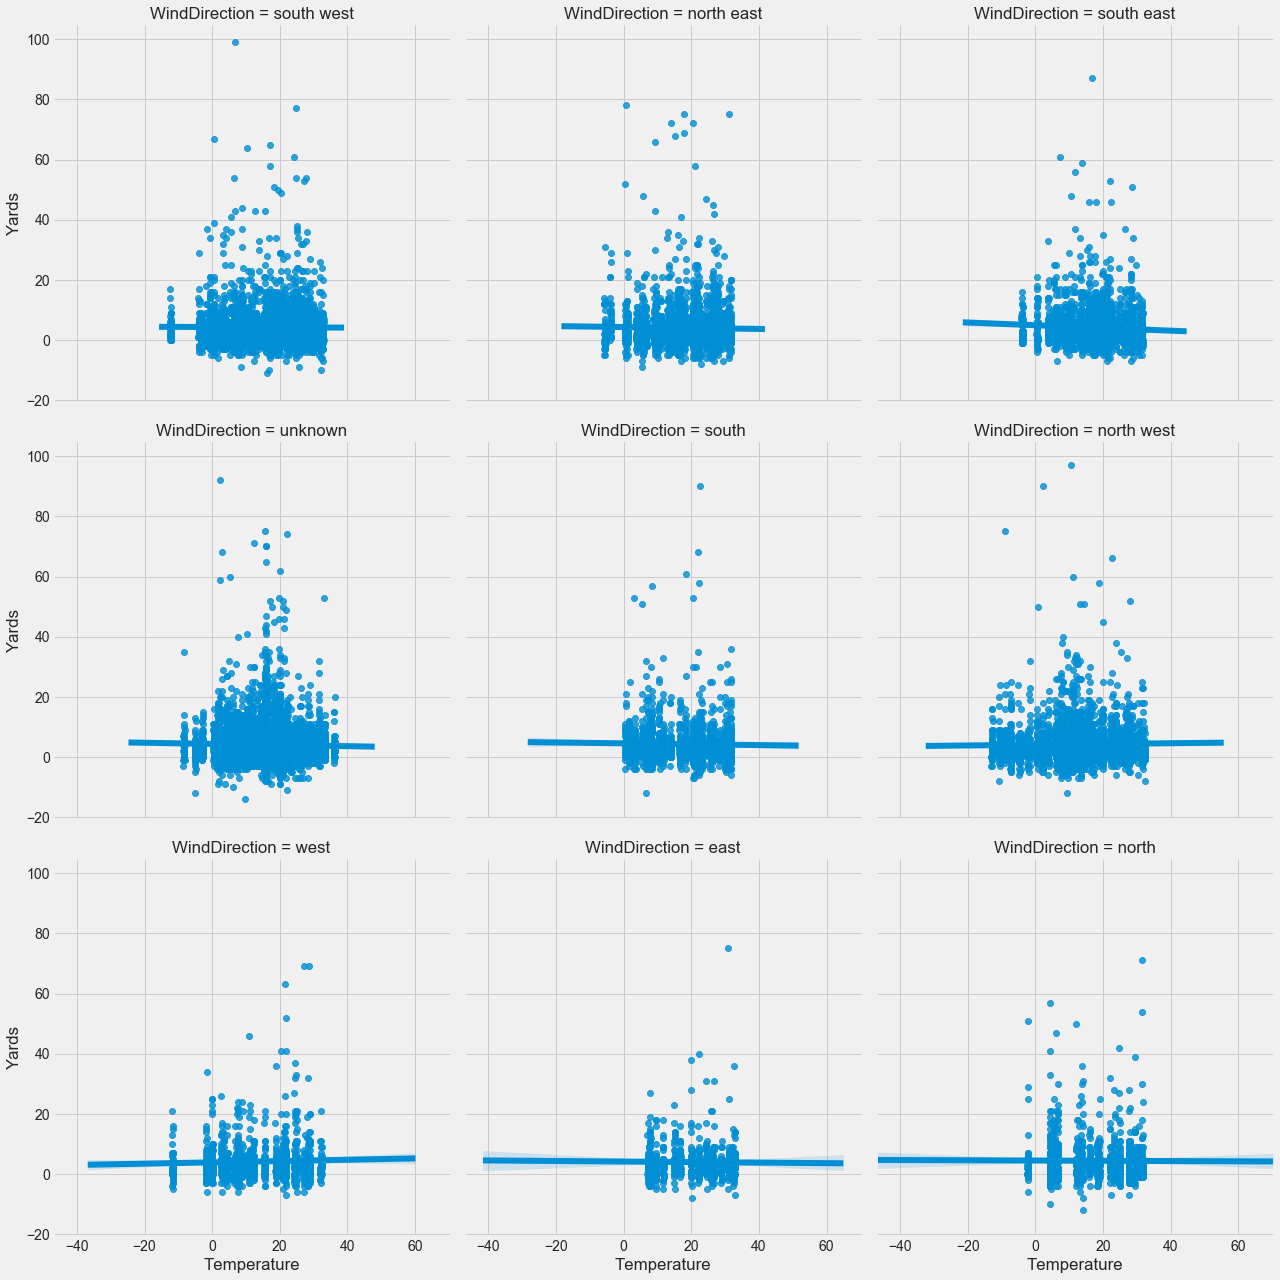

In [58]:
# Display linear plot with relationship between Temperature, WindDirection and Yards
g = sns.lmplot(x='Temperature', y='Yards', data=train_jog, 
               x_jitter=.2, col="WindDirection" , height=6, aspect=1, col_wrap=3)

In [59]:
train_jog['WindSpeed'].value_counts().head()

0    13933
5     1437
6     1103
7      846
4      828
Name: WindSpeed, dtype: int64

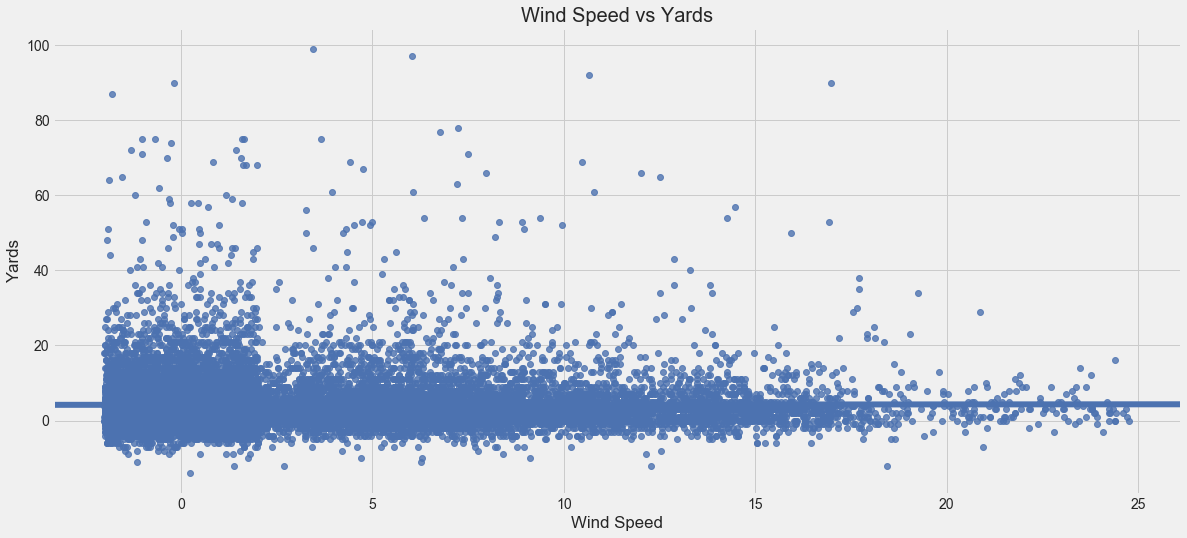

In [60]:
# Display scatterPlot between Speed to Yards
plt.figure(figsize=(18, 8))
sns.regplot(x='WindSpeed', y='Yards', data=train_jog, color='b', x_jitter=2)
plt.xlabel('Wind Speed')
plt.ylabel('Yards')
plt.title('Wind Speed vs Yards', fontsize=20)
plt.show()

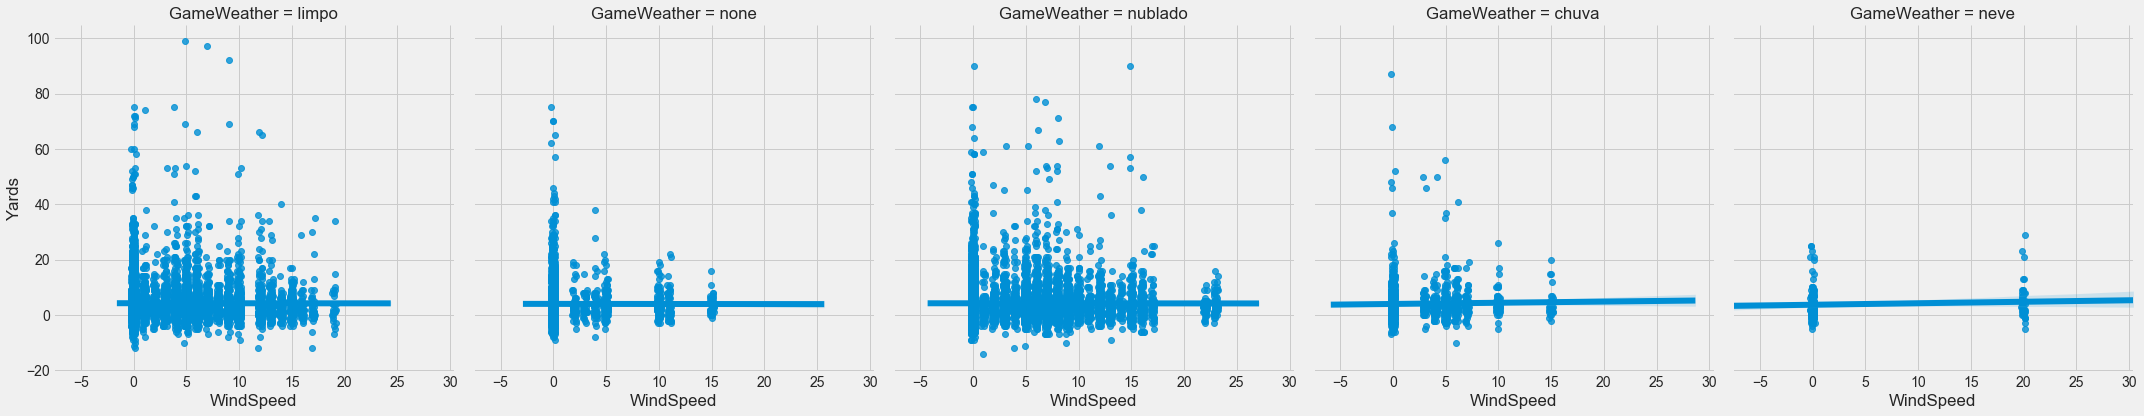

In [61]:
# Display linear plot with relationship between Wind Speed, Weather and Yards
# Most of humidity 0 is in NONE climate
g = sns.lmplot(x='WindSpeed', y='Yards', data=train_jog, 
               x_jitter=.2, col="GameWeather" , height=6, aspect=1)

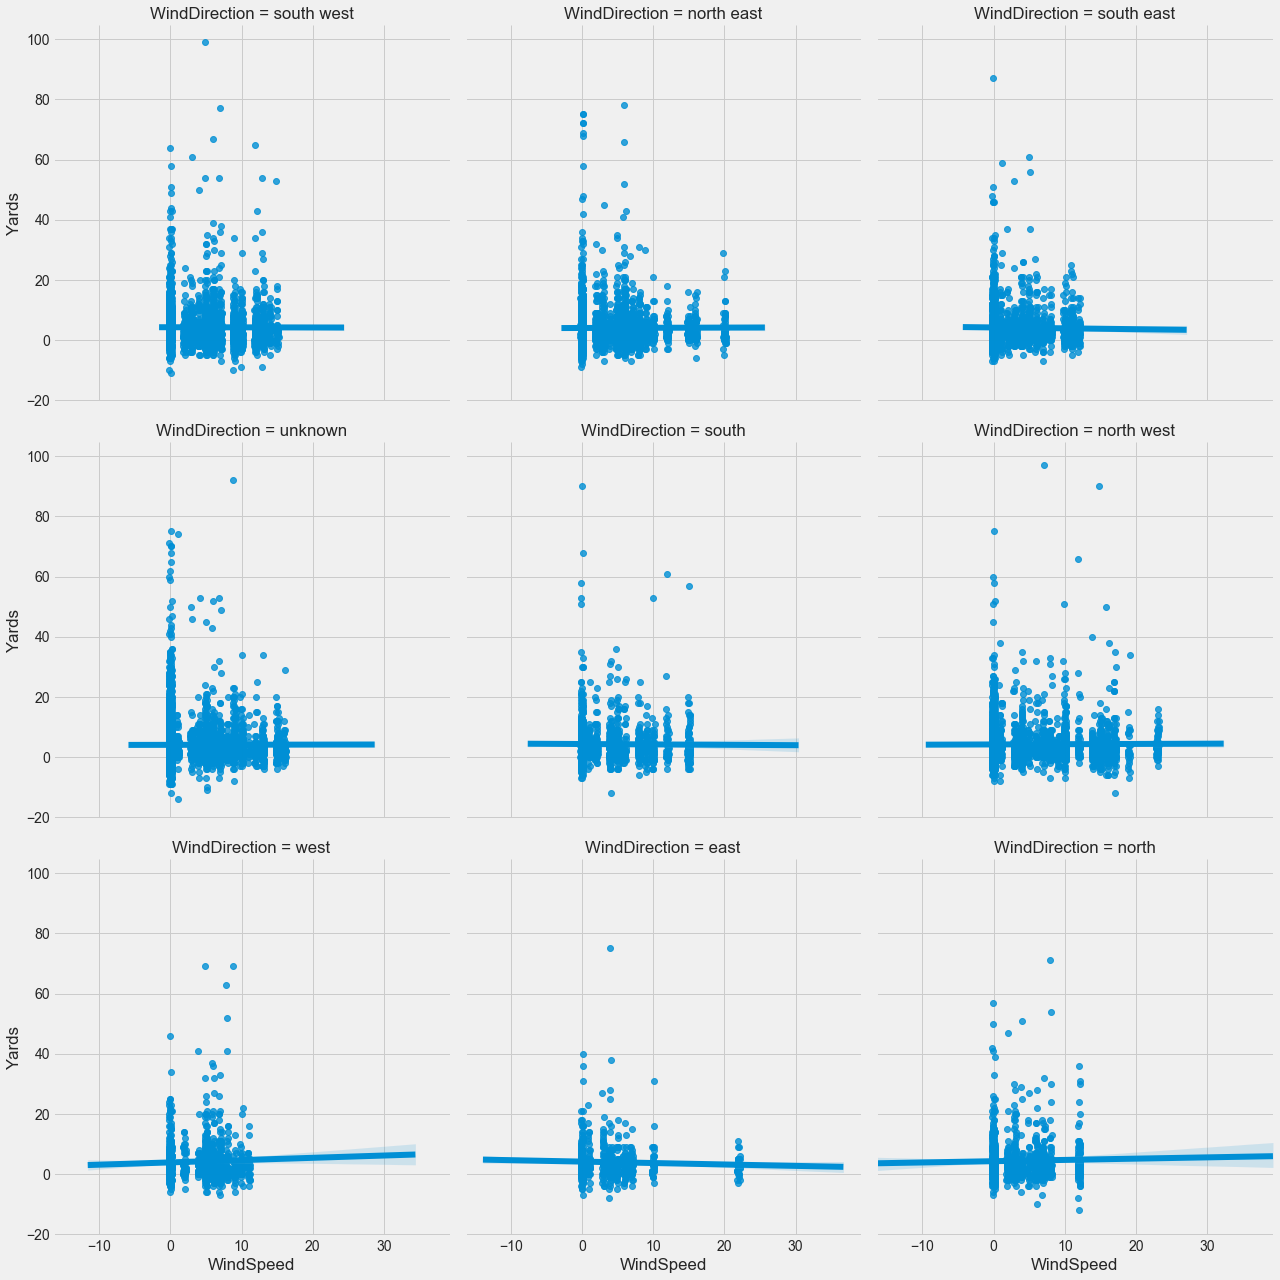

In [62]:
# Display the linear plot with the relationship between Wind Speed, Wind Direction and Yards
g = sns.lmplot(x='WindSpeed', y='Yards', data=train_jog, 
               x_jitter=.2, col="WindDirection" , height=6, aspect=1, col_wrap=3)

### 6.5 Analyzing the general variables of PLAY
- ***HomeScoreBeforePlay:*** home team score before play starts
- ***VisitorScoreBeforePlay:*** visiting team score before play starts
- ***PossessionTeam:*** team with possession
- ***FieldPosition:*** Which side of the field is the play going on
- ***Quarter:*** quarter of the game (1-5, 5 = overtime)
- ***PlayDirection:*** direction of play
- ***OffensePersonnel:*** Offensive team grouping position
- ***DefensePersonnel:*** defensive team grouping position
- ***OffenseFormation:*** Offensive formation
- ***DefendersInTheBox:*** number of defenders aligned near scrimmage line, spanning offensive line width
- ***TimeSnap:*** Time (UTC) of the moment the ball is thrown
- ***TimeHandoff:*** time (UTC) from the moment the runner catches the thrown ball
- ***Down:*** The period of action that begins when the ball is put in play and ends when the ball is declared dead.
- ***Distance:*** yards the team needs to make the first downhill
- ***Dis:***
- ***YardLine:*** the yard line of the scrimmage line
- ***X:*** speed (in yards / second)
- ***A:*** acceleration (in yards / second ^ 2)

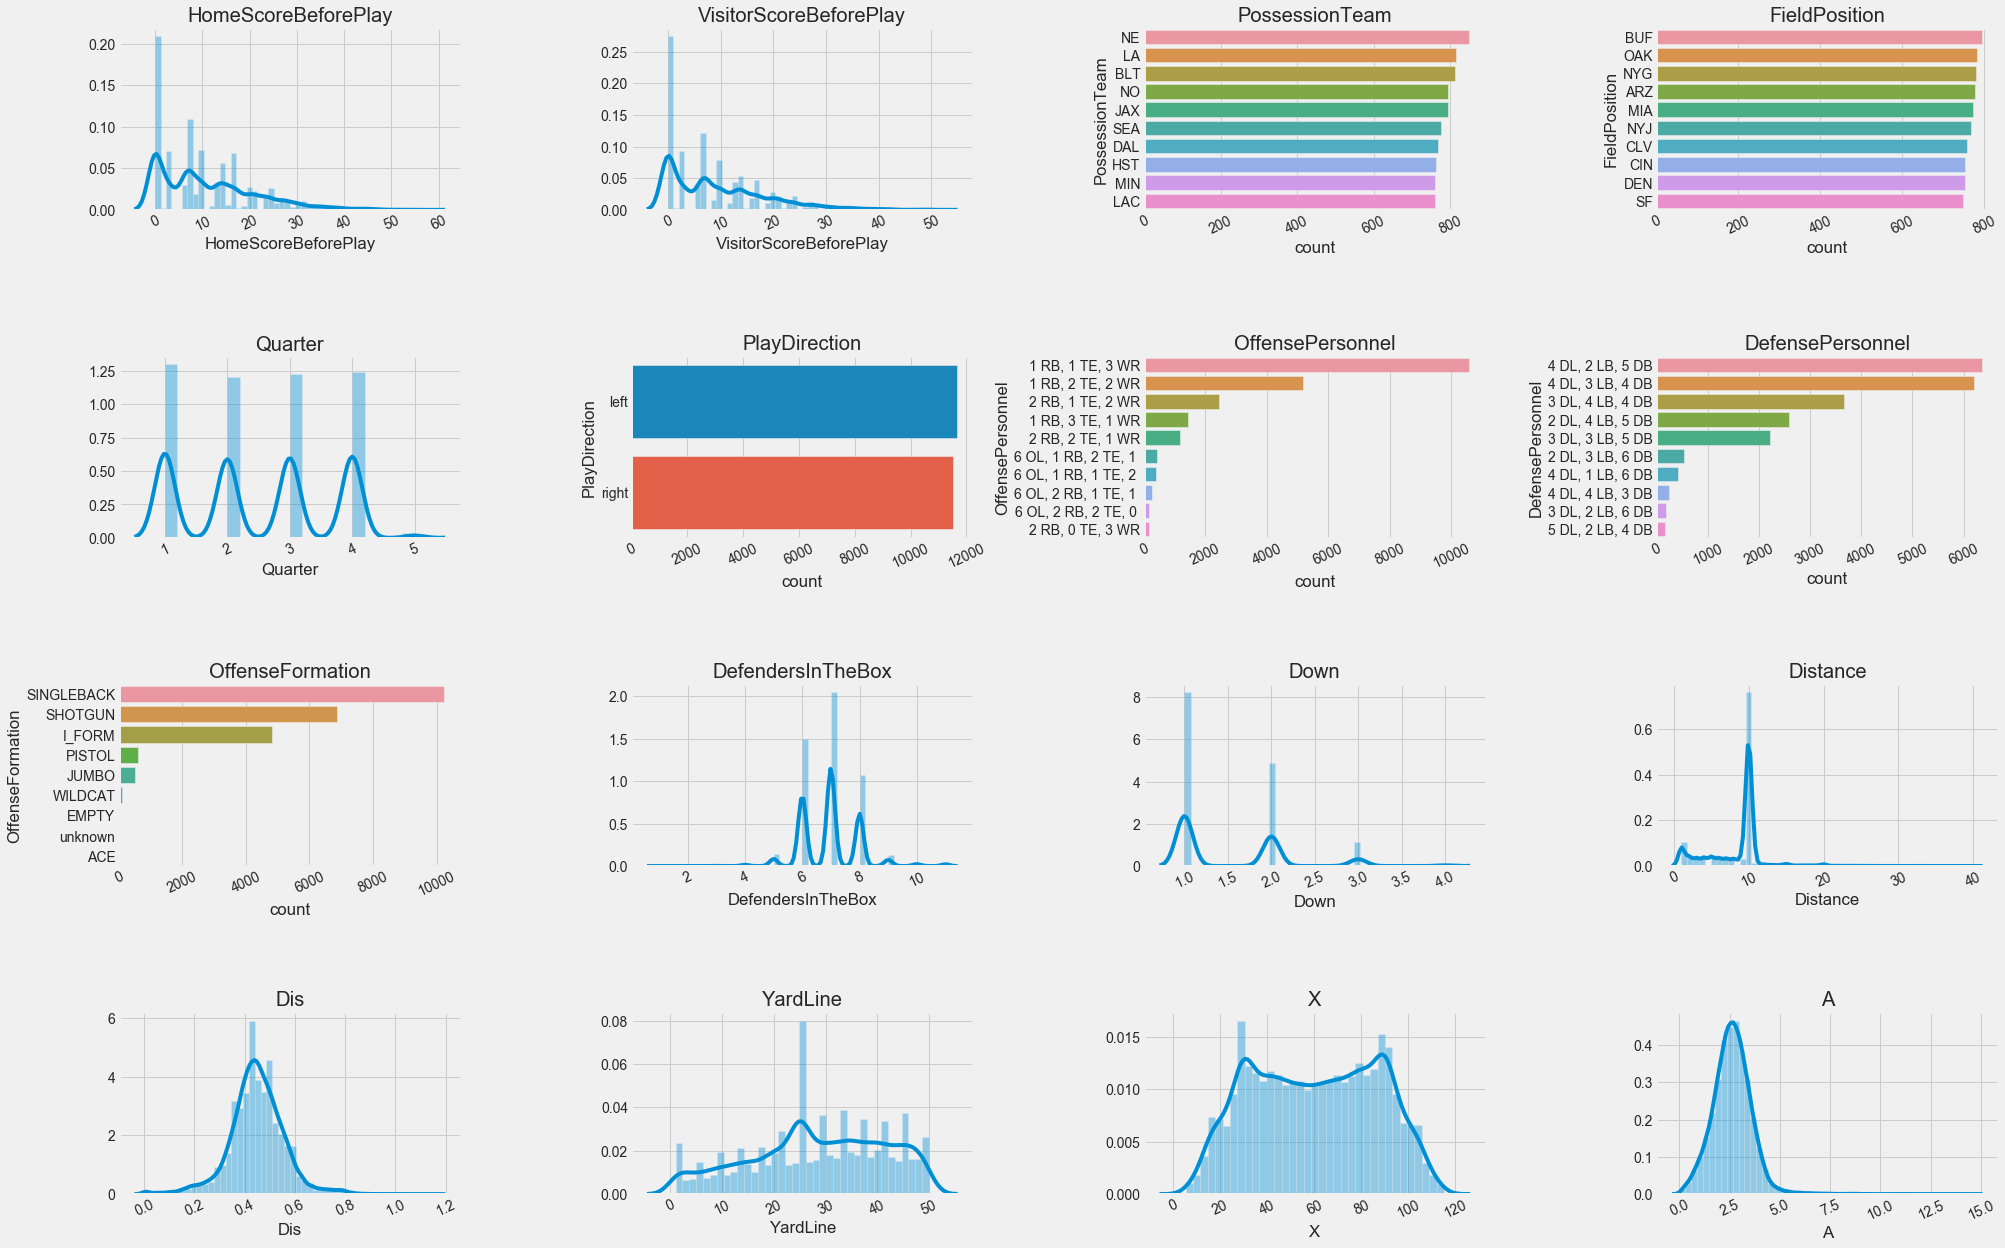

In [63]:
# Distribution plot for each Play feature
columns_to_plot = ['HomeScoreBeforePlay', 'VisitorScoreBeforePlay', 'PossessionTeam', 'FieldPosition', 'Quarter',
                   'PlayDirection','OffensePersonnel','DefensePersonnel','OffenseFormation','DefendersInTheBox',
                   'Down','Distance','Dis','YardLine','X','A']
plot_distribution(train_jog[columns_to_plot], cols=4, width=30, height=20, hspace=0.8, wspace=0.5)

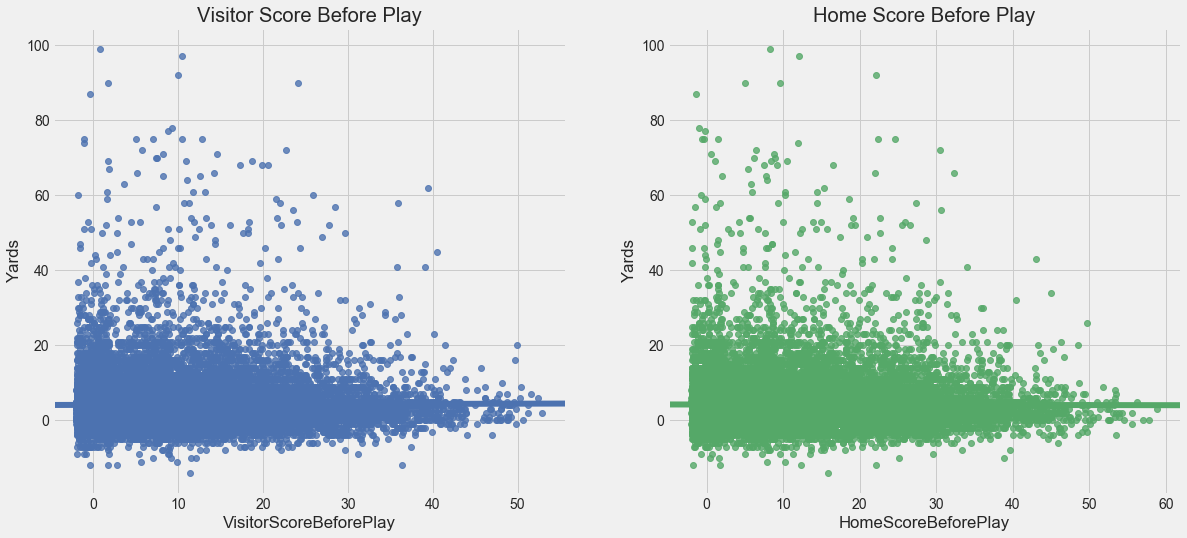

In [64]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 8))

ax1.set_title('Visitor Score Before Play')
sns.regplot(x='VisitorScoreBeforePlay', y='Yards', data=train_jog, color='b', x_jitter=2, ax=ax1)

ax2.set_title('Home Score Before Play')
sns.regplot(x='HomeScoreBeforePlay', y='Yards', data=train_jog, color='g', x_jitter=2, ax=ax2)

plt.show()

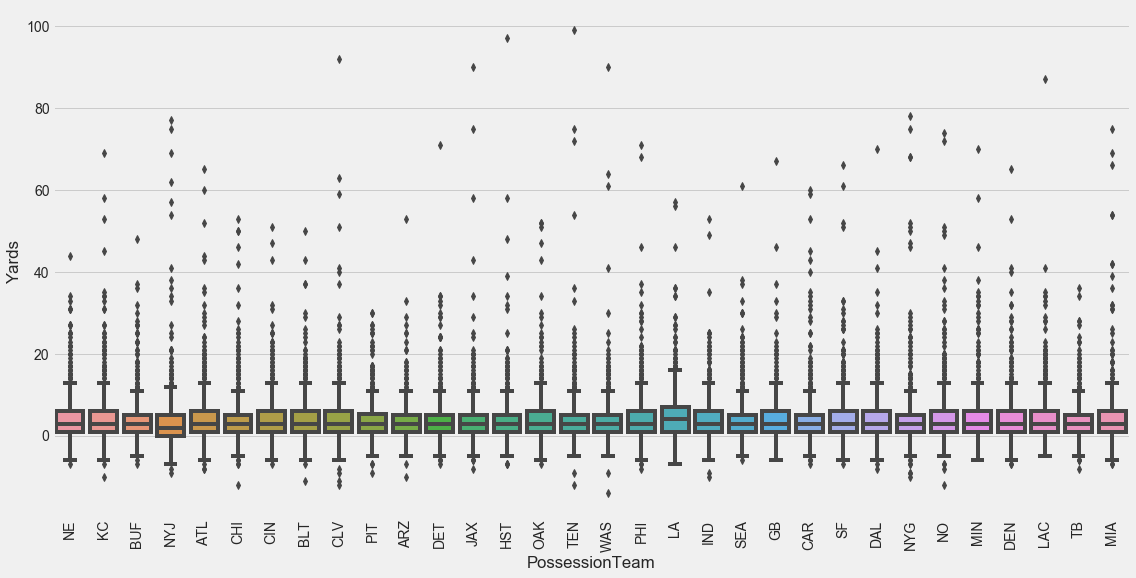

In [65]:
# Display catPlot with the relationship between PossessionTeam and Yards
g = sns.catplot(x='PossessionTeam', y='Yards', data=train_jog, kind="box", height=8, aspect=2)
g.set_xticklabels(rotation=90)

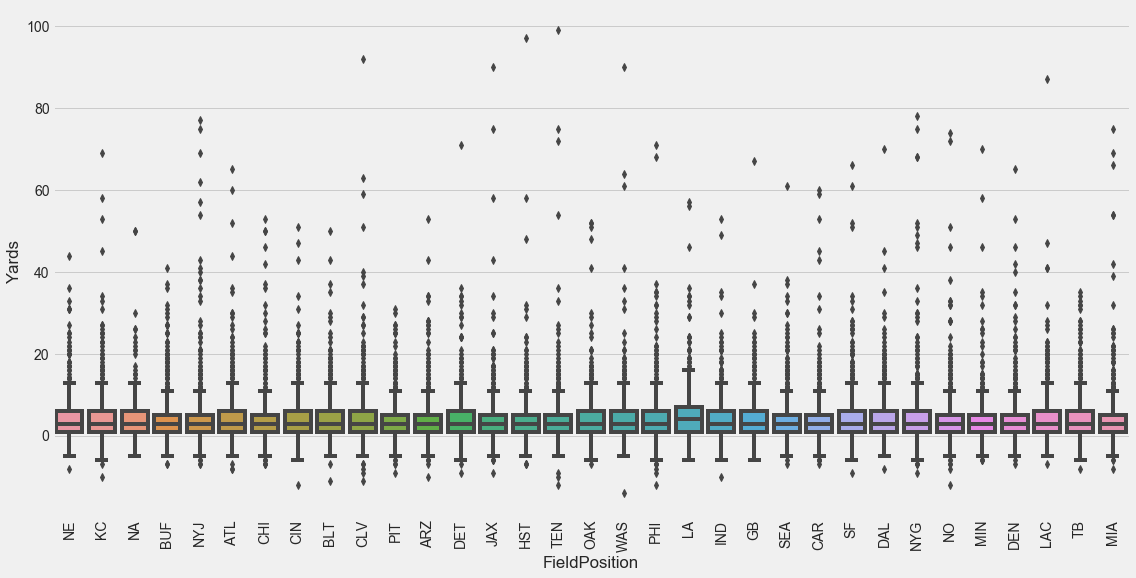

In [66]:
# Display catPlot with the relationship between FieldPosition and Yards
g = sns.catplot(x='FieldPosition', y='Yards', data=train_jog, kind="box", height=8, aspect=2)
g.set_xticklabels(rotation=90)

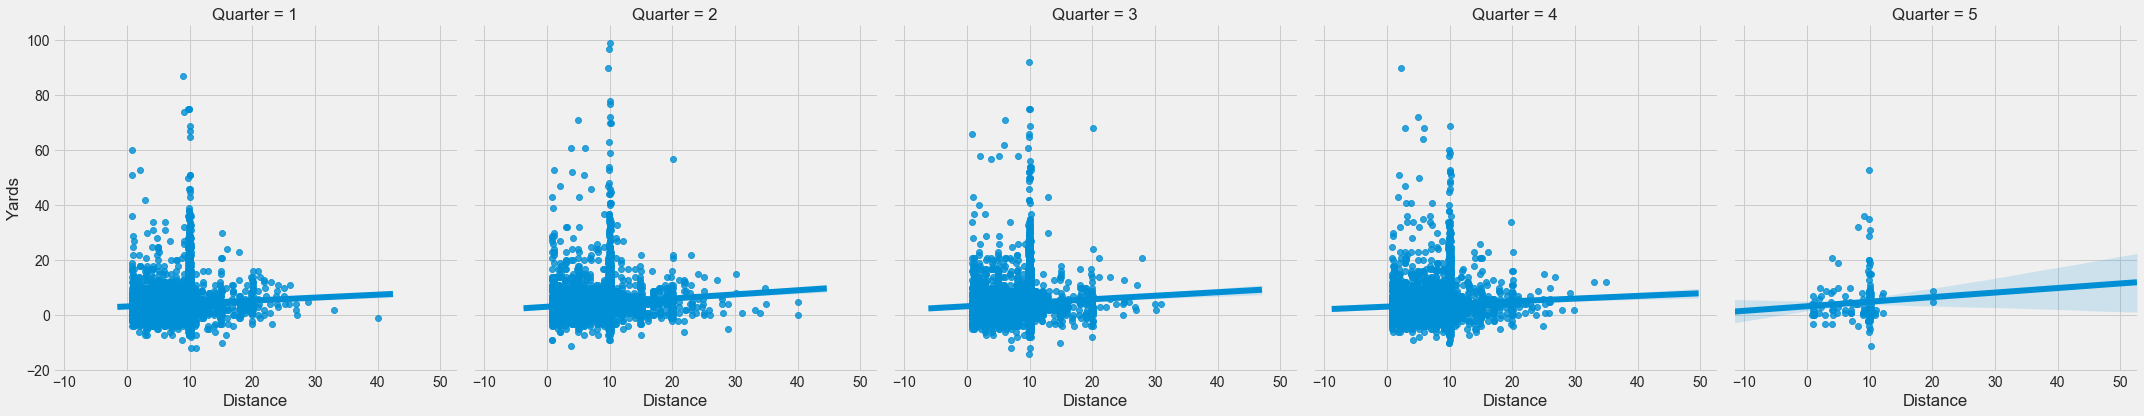

In [67]:
# Display catPlot chart with the relationship between Distance and Yards (by Quarter)
g = sns.lmplot(x='Distance', y='Yards', data=train_jog, x_jitter=.2, col="Quarter" , height=6, aspect=1)

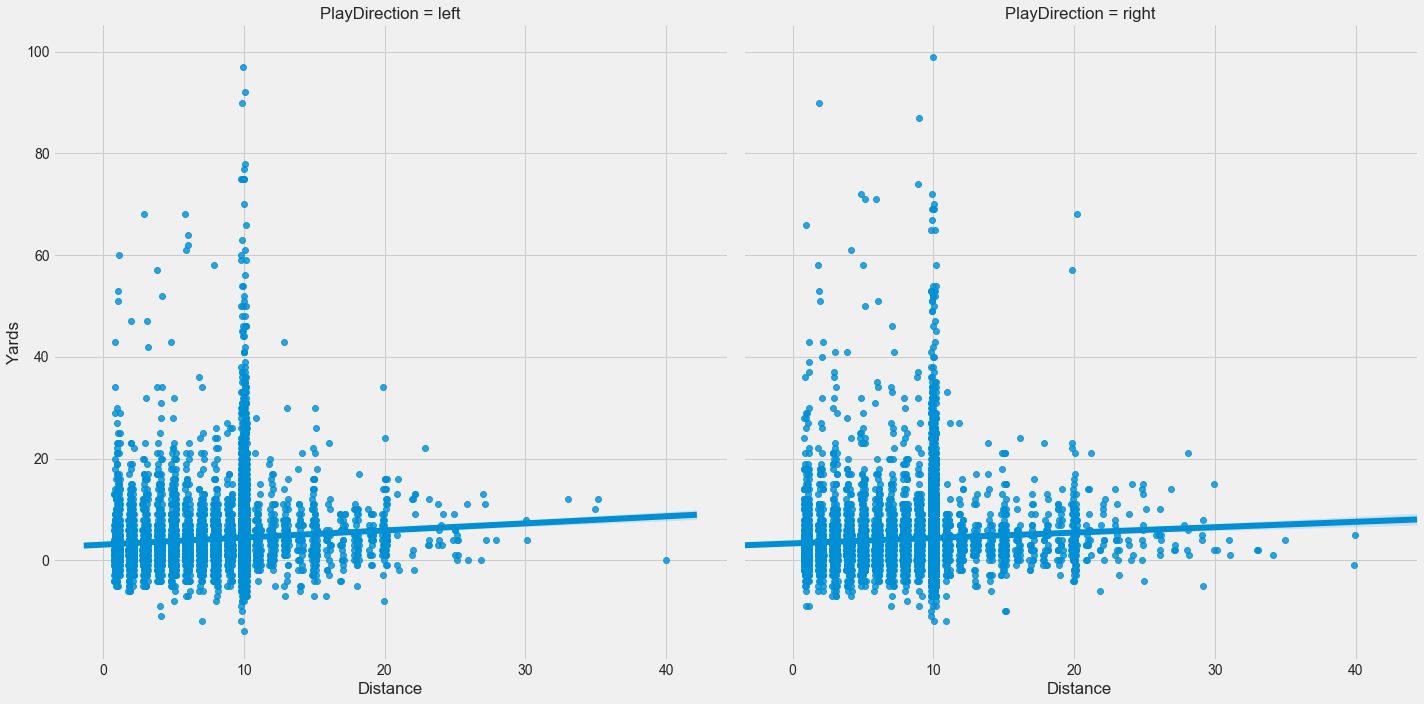

In [68]:
# Display catPlot with the relationship between Distance and Yards (by PlayDirection)
g = sns.lmplot(x='Distance', y='Yards', data=train_jog, x_jitter=.2, col="PlayDirection" , height=10)

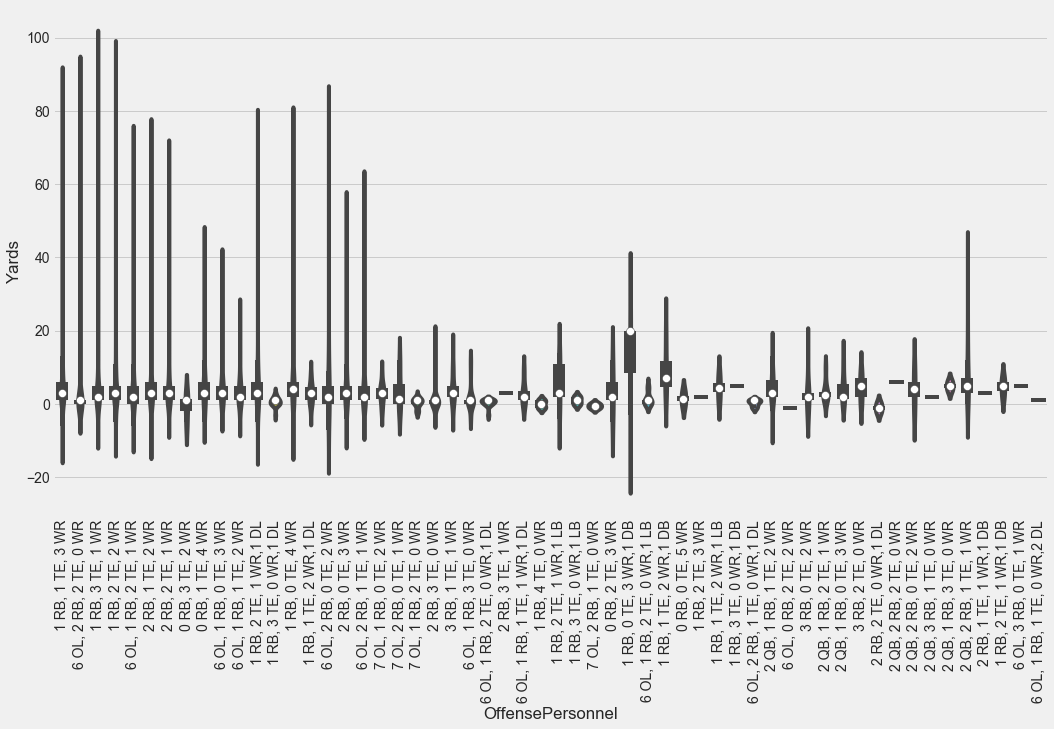

In [69]:
# Display catPlot with the relationship between OffensePersonnel and Yards
g = sns.catplot(x='OffensePersonnel', y='Yards', data=train_jog, kind="violin", height=8, aspect=2)
g.set_xticklabels(rotation=90)

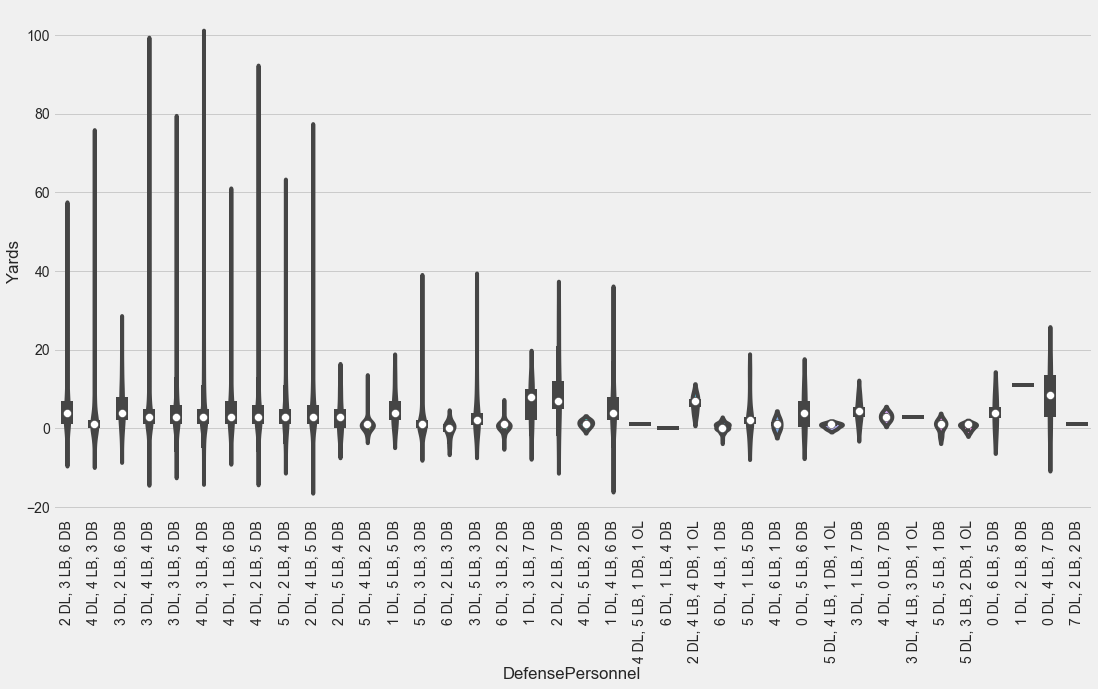

In [70]:
# Display catPlot with the relationship between DefensePersonnel and Yards
g = sns.catplot(x='DefensePersonnel', y='Yards', data=train_jog, kind="violin", height=8, aspect=2)
g.set_xticklabels(rotation=90)

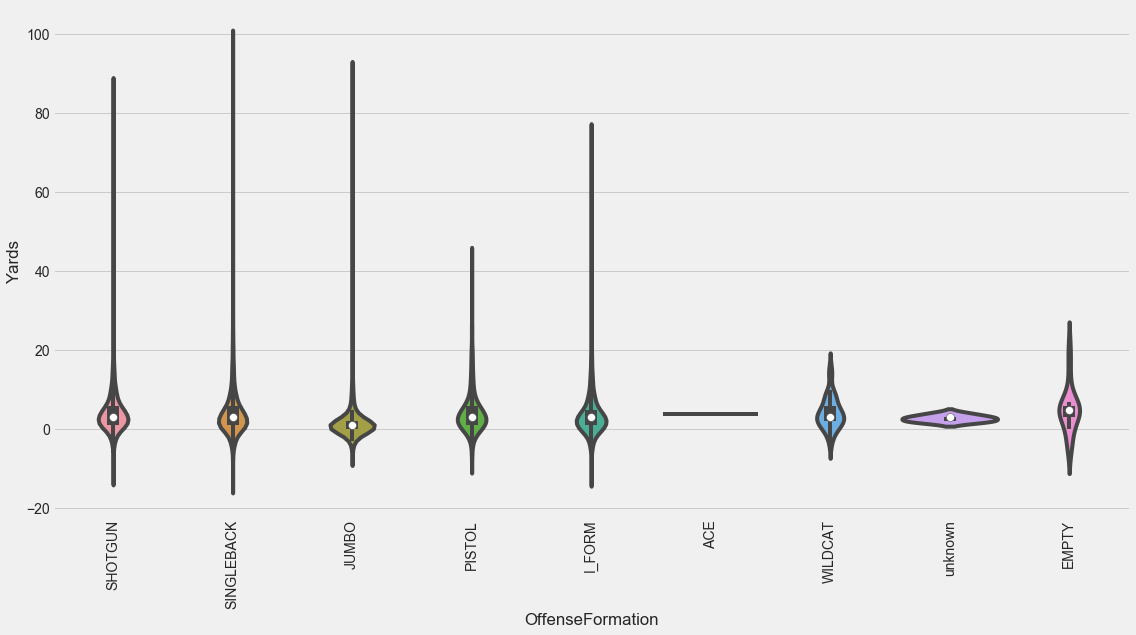

In [71]:
# Display catPlot with the relationship between OffenseFormation and Yards
g = sns.catplot(x='OffenseFormation', y='Yards', data=train_jog, kind="violin", height=8, aspect=2)
g.set_xticklabels(rotation=90)

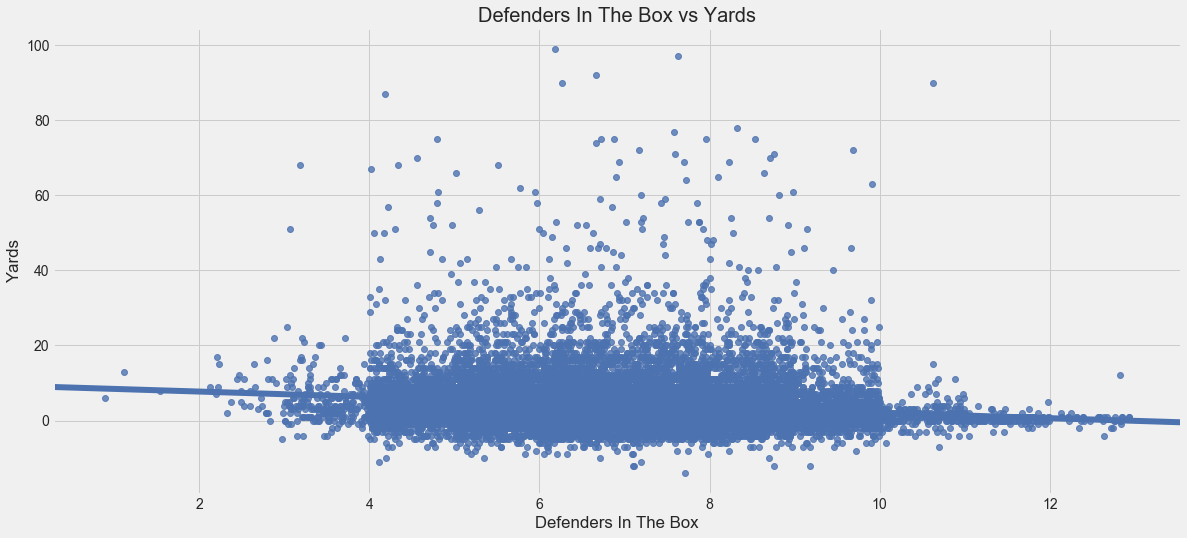

In [72]:
# Display scatterPlot plot with the relationship between DefendersInTheBox and Yards
plt.figure(figsize=(18, 8))
sns.regplot(x='DefendersInTheBox', y='Yards', data=train_jog, color='b', x_jitter=2)
plt.xlabel('Defenders In The Box')
plt.ylabel('Yards')
plt.title('Defenders In The Box vs Yards', fontsize=20)
plt.show()

In [73]:
# UTC time of the snap
train_jog['TimeSnap'].value_counts().head()

2018-10-07 17:17:41    3
2017-12-31 21:55:29    3
2017-12-03 18:34:31    2
2017-10-22 17:41:03    2
2017-09-24 19:40:05    2
Name: TimeSnap, dtype: int64

In [74]:
# UTC time of the handoff
train_jog['TimeHandoff'].value_counts().head()

2018-10-07 17:17:43    3
2018-10-21 17:29:53    2
2018-12-09 19:01:12    2
2017-12-24 18:05:20    2
2017-12-31 23:51:34    2
Name: TimeHandoff, dtype: int64

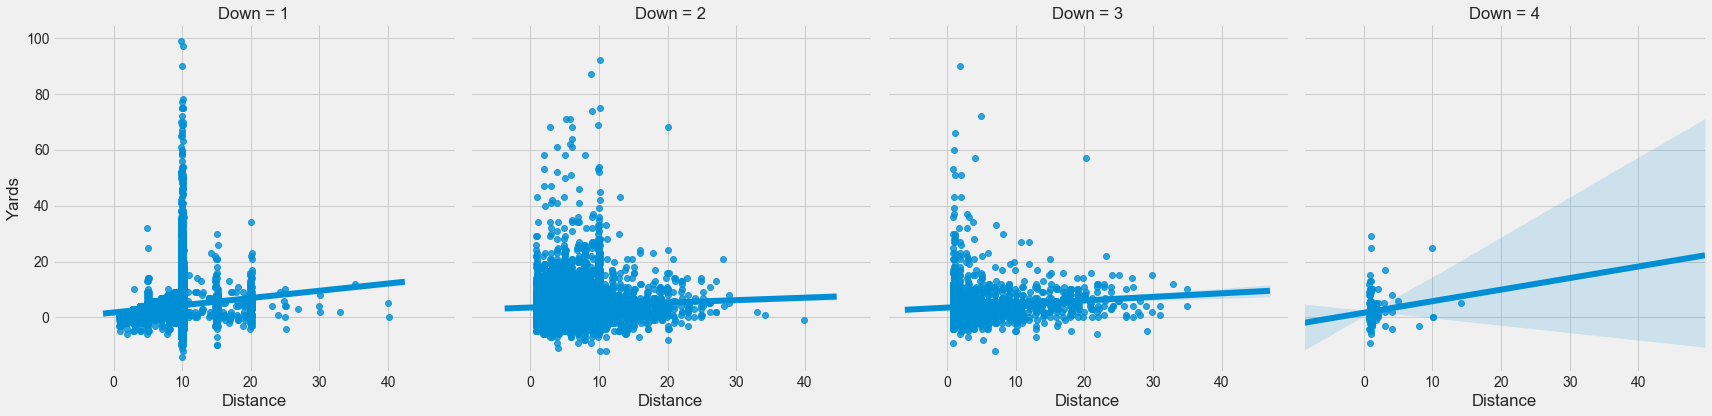

In [75]:
# Display the linear plot with the relationship between Distance, Down and Yards
g = sns.lmplot(x='Distance', y='Yards', data=train_jog, x_jitter=.2, col="Down" , height=6, aspect=1)

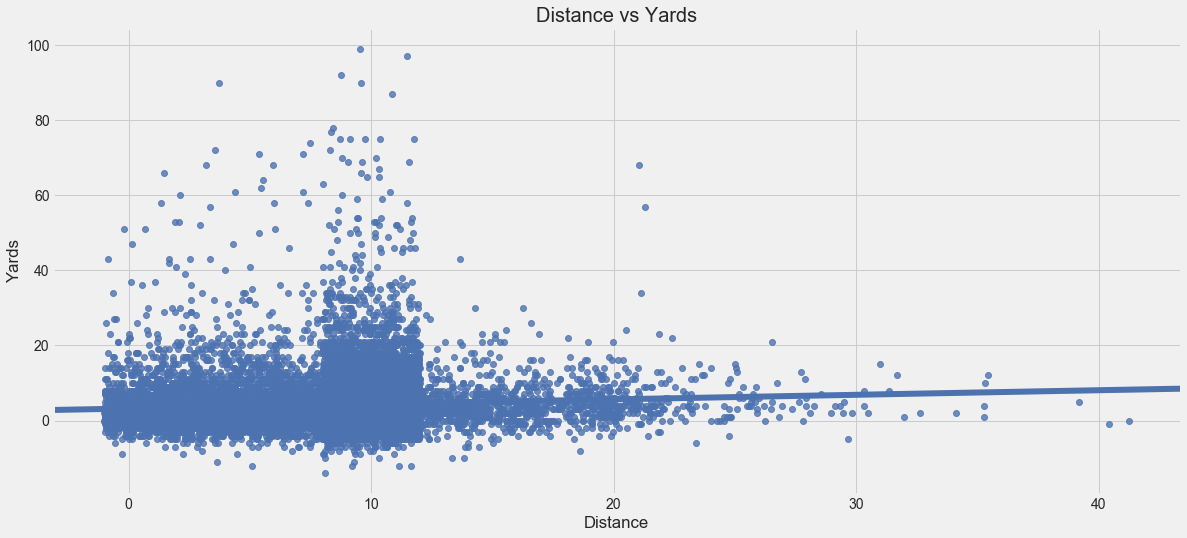

In [76]:
# Display the scatterPlot between Distance and Yards
plt.figure(figsize=(18, 8))
sns.regplot(x='Distance', y='Yards', data=train_jog, color='b', x_jitter=2)
plt.xlabel('Distance')
plt.ylabel('Yards')
plt.title('Distance vs Yards', fontsize=20)
plt.show()

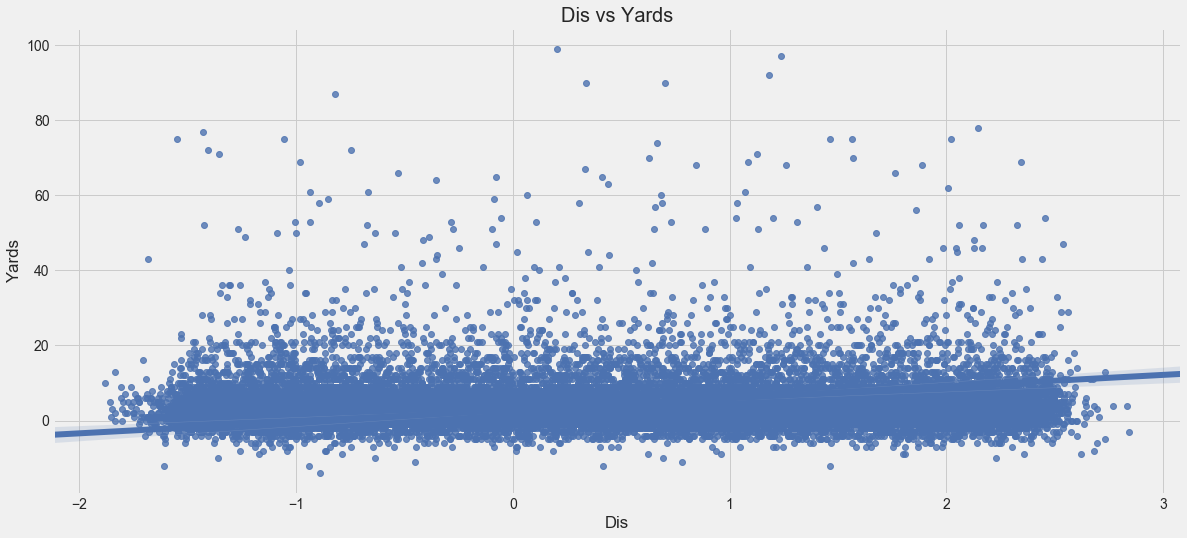

In [77]:
# Display the scatterPlot between Dis and Yards
plt.figure(figsize=(18, 8))
sns.regplot(x='Dis', y='Yards', data=train_jog, color='b', x_jitter=2)
plt.xlabel('Dis')
plt.ylabel('Yards')
plt.title('Dis vs Yards', fontsize=20)
plt.show()

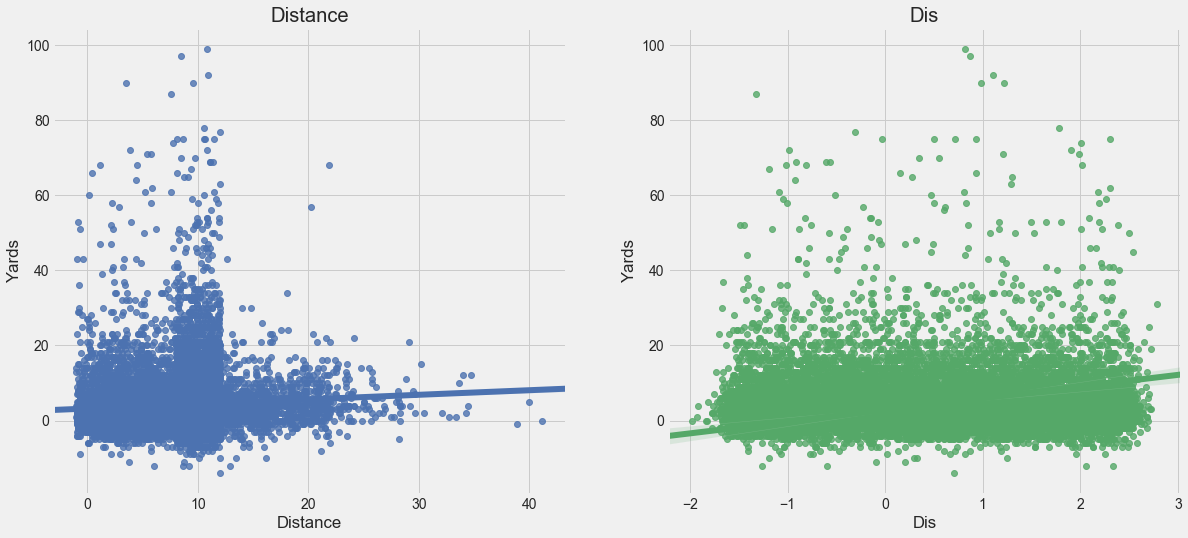

In [78]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 8))

ax1.set_title('Distance')
sns.regplot(x='Distance', y='Yards', data=train_jog, color='b', x_jitter=2, ax=ax1)

ax2.set_title('Dis')
sns.regplot(x='Dis', y='Yards', data=train_jog, color='g', x_jitter=2, ax=ax2)

plt.show()

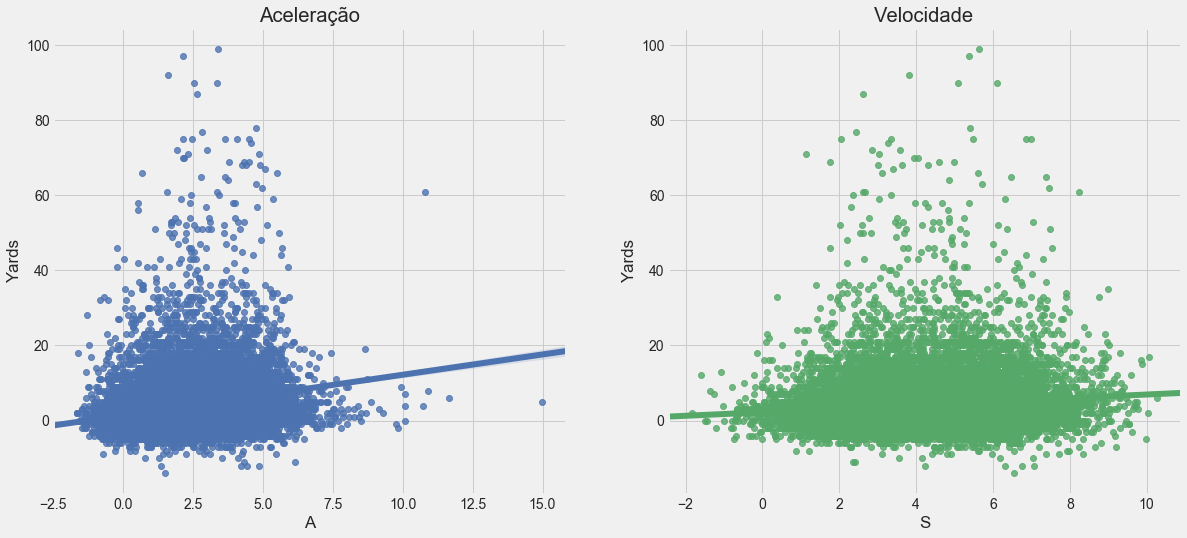

In [79]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 8))

ax1.set_title('Aceleração')
sns.regplot(x='A', y='Yards', data=train_jog, color='b', x_jitter=2, ax=ax1)

ax2.set_title('Velocidade')
sns.regplot(x='S', y='Yards', data=train_jog, color='g', x_jitter=2, ax=ax2)

plt.show()

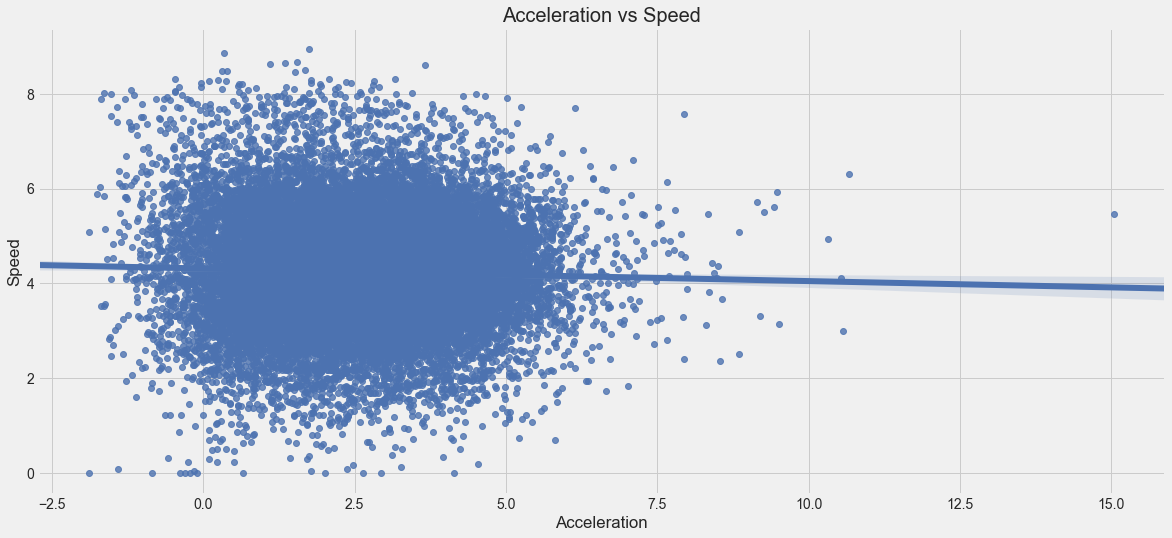

In [80]:
# Display the scatterPlot between A and S
plt.figure(figsize=(18, 8))
sns.regplot(x='A', y='S', data=train_jog, color='b', x_jitter=2)
plt.xlabel('Acceleration')
plt.ylabel('Speed')
plt.title('Acceleration vs Speed', fontsize=20)
plt.show()

### 6.6 Analyzing  POSITION Variables
- ***X:*** position along the long axis of the field
- ***Y:*** position along the short axis of the field
- ***Orientation:*** Player Orientation
- ***Dir:*** movement angle

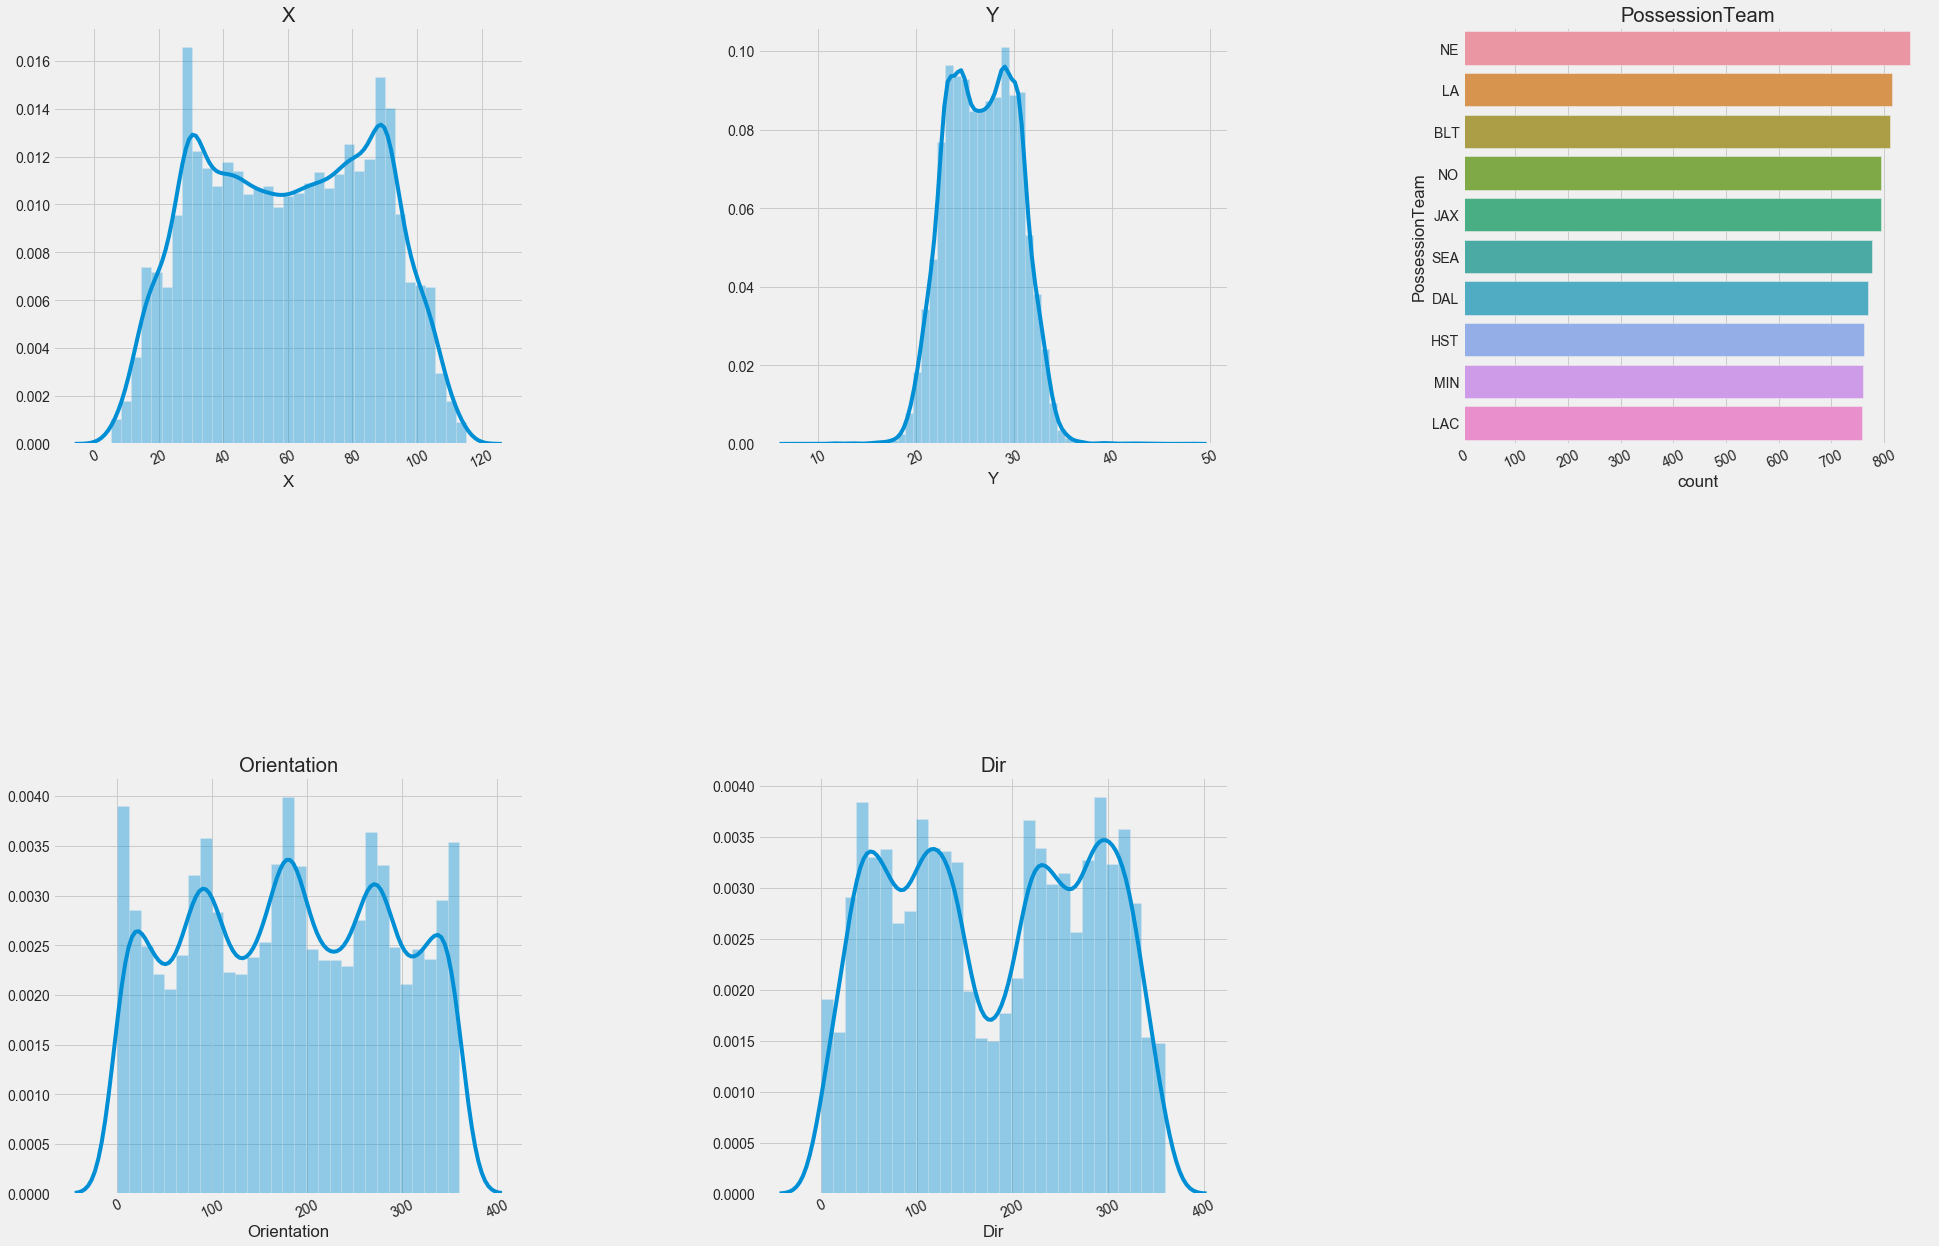

In [81]:
# Distribution plot for each Position feature
columns_to_plot = ['X', 'Y', 'PossessionTeam', 'Orientation', 'Dir']
plot_distribution(train_jog[columns_to_plot], cols=3, width=30, height=20, hspace=0.8, wspace=0.5)

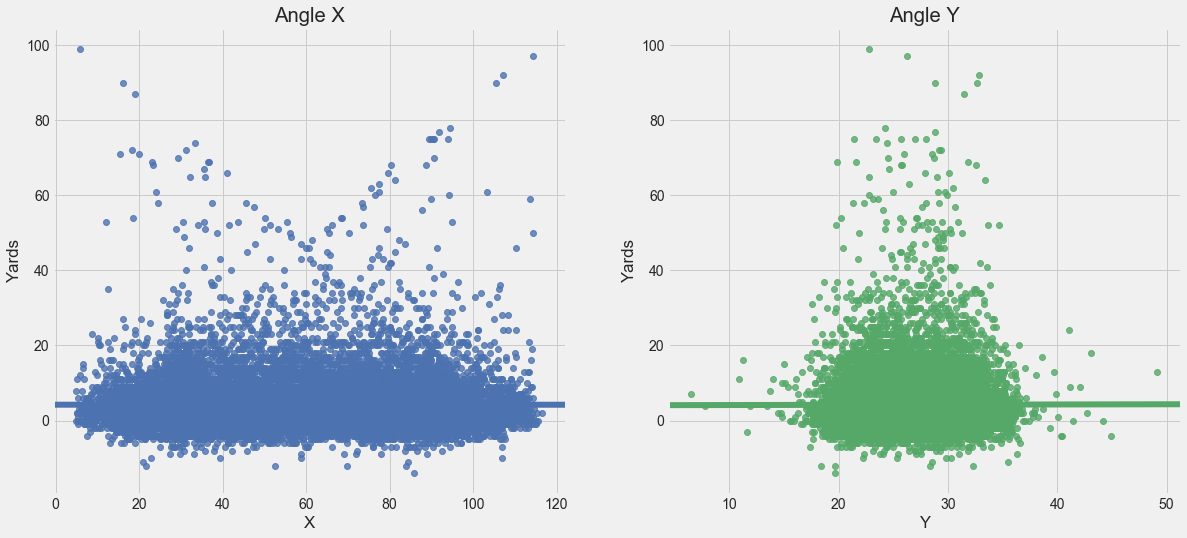

In [82]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 8))

ax1.set_title('Angle X')
sns.regplot(x='X', y='Yards', data=train_jog, color='b', x_jitter=2, ax=ax1)

ax2.set_title('Angle Y')
sns.regplot(x='Y', y='Yards', data=train_jog, color='g', x_jitter=2, ax=ax2)

plt.show()

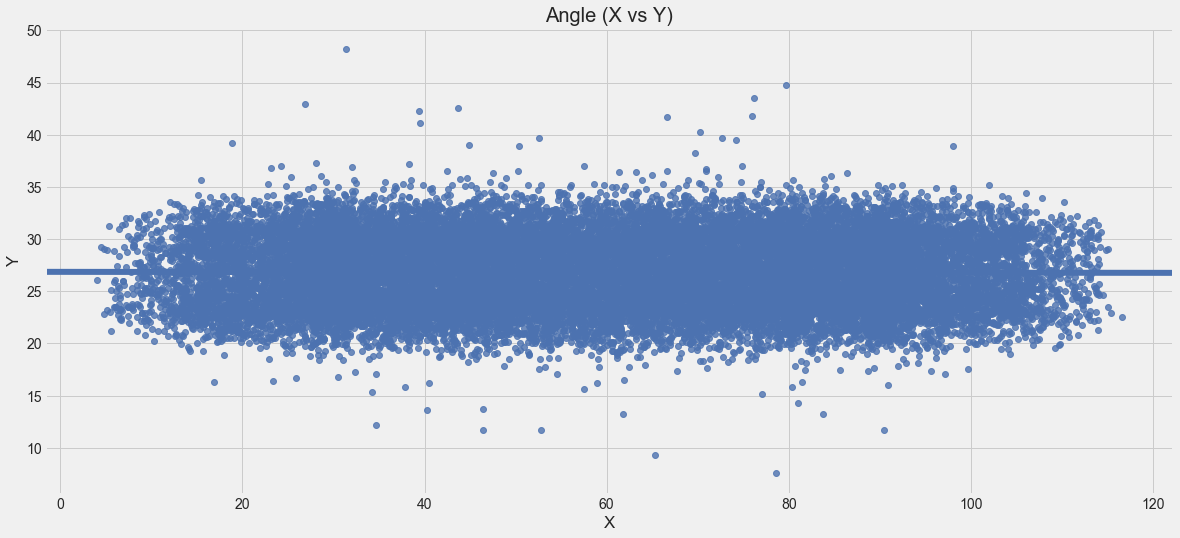

In [83]:
# Display the scatterPlot with the relationship between angle X and Y
plt.figure(figsize=(18, 8))
sns.regplot(x='X', y='Y', data=train_jog, color='b', x_jitter=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Angle (X vs Y)', fontsize=20)
plt.show()

In [84]:
train_jog['Orientation'].value_counts().head()

90.00     22
177.49     6
268.15     6
282.52     6
166.58     6
Name: Orientation, dtype: int64

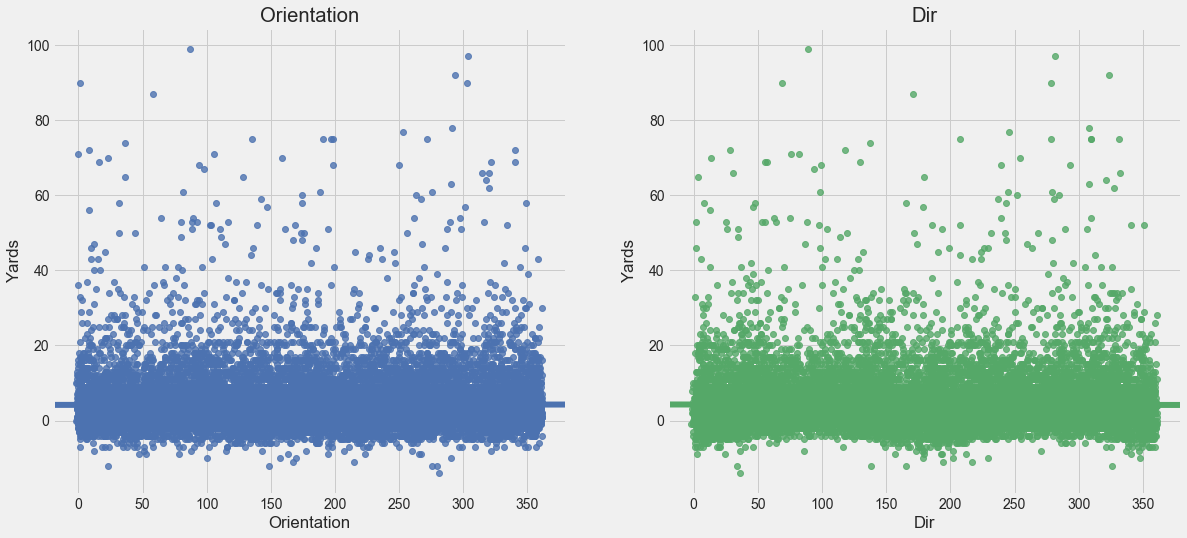

In [85]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 8))

ax1.set_title('Orientation')
sns.regplot(x='Orientation', y='Yards', data=train_jog, color='b', x_jitter=2, ax=ax1)

ax2.set_title('Dir')
sns.regplot(x='Dir', y='Yards', data=train_jog, color='g', x_jitter=2, ax=ax2)

plt.show()

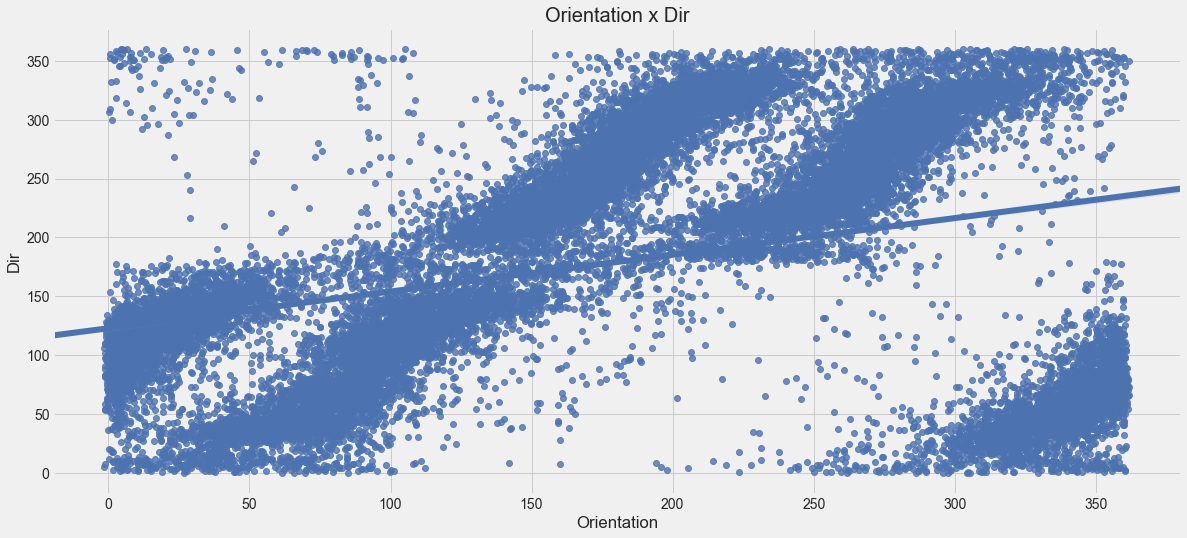

In [86]:
# Display the scatterPlot with the relationship between Orientation and Dir
plt.figure(figsize=(18, 8))
sns.regplot(x='Orientation', y='Dir', data=train_jog, color='b', x_jitter=2)
plt.xlabel('Orientation')
plt.ylabel('Dir')
plt.title('Orientation x Dir', fontsize=20)
plt.show()

In [87]:
train_jog["player_age"]  = (train_jog["TimeSnap"].dt.date - train_jog["PlayerBirthDate"].dt.date)/np.timedelta64(1, 'D') / 365

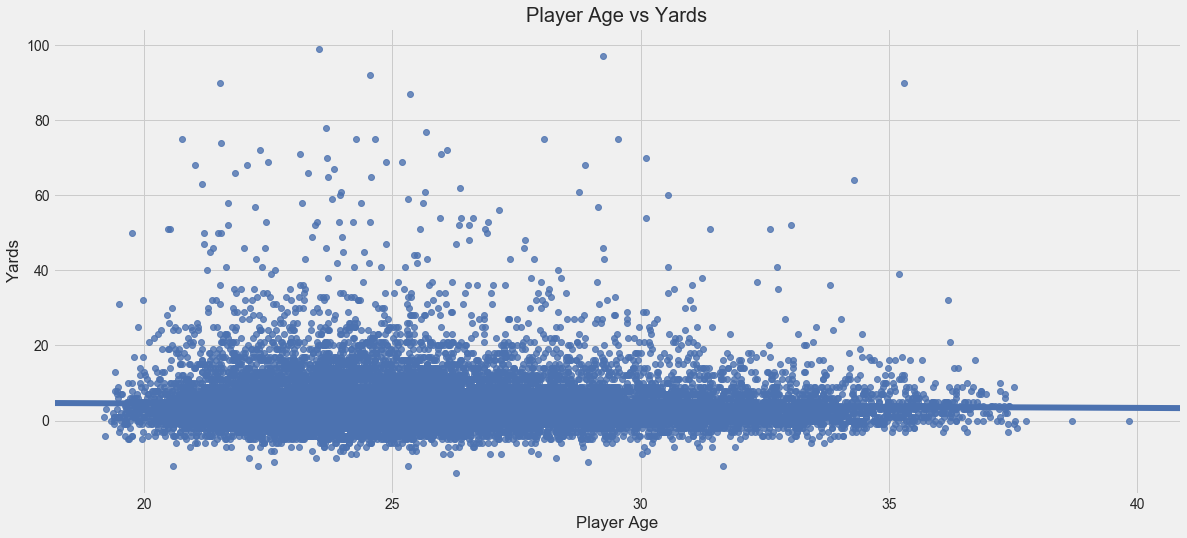

In [88]:
# Display scatterPlot between Speed to Yards
plt.figure(figsize=(18, 8))
sns.regplot(x='player_age', y='Yards', data=train_jog, color='b', x_jitter=2)
plt.xlabel('Player Age')
plt.ylabel('Yards')
plt.title('Player Age vs Yards', fontsize=20)
plt.show()

In [90]:
train_jog["player_age"].describe()

count    23171.000000
mean        25.732528
std          3.097229
min         21.134247
25%         23.326027
50%         24.835616
75%         27.509589
max         38.967123
Name: player_age, dtype: float64

In [110]:
q1 = """SELECT GameId, DisplayName, ROUND(player_age) as idade, qtde_jogadas, qtde_jardas, (qtde_jardas/qtde_jogadas) as rendimento
 FROM (
SELECT GameId, DisplayName, player_age, COUNT(1) qtde_jogadas, sum(Yards) qtde_jardas
          FROM train_jog
        WHERE Position = 'RB'
          --AND Team = 'home'
          GROUP BY GameId, DisplayName, player_age
          ORDER BY PlayId)"""
tmp = ps.sqldf(q1, locals())

In [113]:
tmp.head()

GameId     DisplayName  idade  qtde_jogadas  qtde_jardas  rendimento
0  2017090700     James White   26.0             9           35           3
1  2017090700  Mike Gillislee   27.0            15           45           3
2  2017090700     Kareem Hunt   22.0            16          138           8
3  2017090700    Rex Burkhead   27.0             3           15           5
4  2017090700      Dion Lewis   27.0             2            9           4

In [129]:
tmp = train_jog.groupby(['GameId','DisplayName']).agg({'PlayId': pd.Series.nunique, 'Yards': np.sum}).reset_index()

In [130]:
tmp['performance_num'] = tmp['Yards'] / tmp['PlayId']

In [131]:
tmp.head()

GameId        DisplayName  PlayId  Yards  performance_num
0  2017090700  Charcandrick West       1     21        21.000000
1  2017090700        Chris Hogan       3     17         5.666667
2  2017090700  De'Anthony Thomas       1      4         4.000000
3  2017090700         Dion Lewis       2      9         4.500000
4  2017090700        James White       9     35         3.888889

In [ ]:
tmp = train_jog.groupby(['GameId','DisplayName','player_age'])\
                         .agg({'dist_to_back':['min','max','mean','std']})\
                         .reset_index()

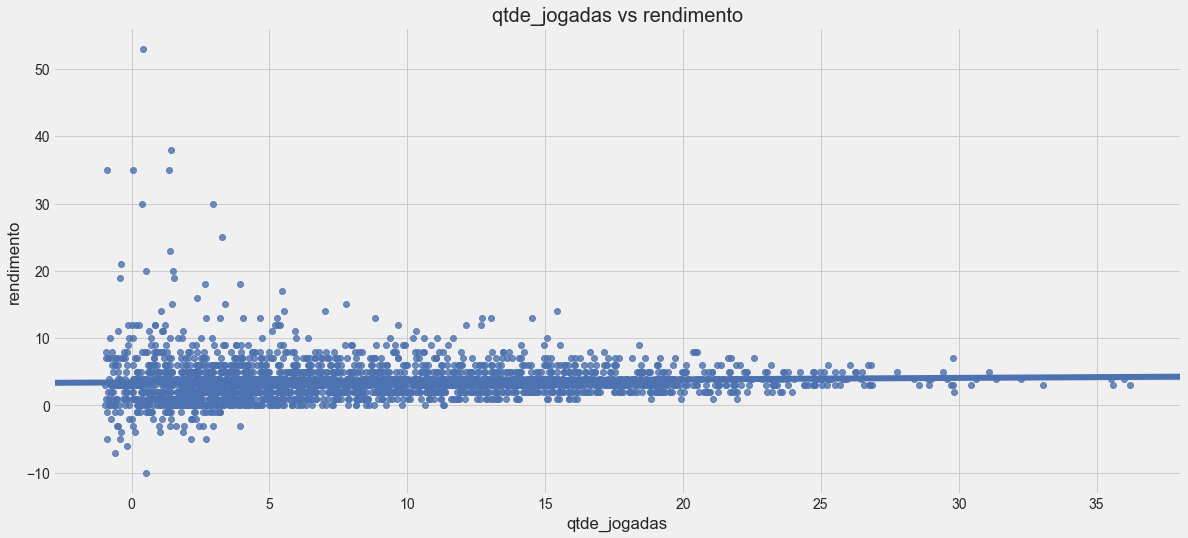

In [111]:
# Display scatterPlot between Speed to Yards
plt.figure(figsize=(18, 8))
sns.regplot(x='qtde_jogadas', y='rendimento', data=tmp, color='b', x_jitter=2)
plt.xlabel('qtde_jogadas')
plt.ylabel('rendimento')
plt.title('qtde_jogadas vs rendimento', fontsize=20)
plt.show()